# Import libraries

In [1]:
import os
import re
import argparse
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt

# Definition of functions

In [2]:
def dicoGrpSp():
    dicoSp = {'pan_troglodytes' : 'Eukaryote',
    'homo_sapiens' : 'Eukaryote',
    'pongo_abelii' : 'Eukaryote',
    'mus_musculus' : 'Eukaryote',
    'monodelphis_domestica' : 'Eukaryote',
    'ornithorhynchus_anatinus' : 'Eukaryote',
    'anolis_carolinensis' : 'Eukaryote',
    'gallus_gallus' : 'Eukaryote',
    'danio_rerio' : 'Eukaryote',
    'gasterosteus_aculeatus' : 'Eukaryote',
    'drosophila_melanogaster' : 'Eukaryote',
    'apis_mellifera' : 'Eukaryote',
    'caenorhabditis_elegans' : 'Eukaryote',
    'neurospora_crassa' : 'Eukaryote',
    'aspergillus_nidulans' : 'Eukaryote',
    'saccharomyces_cerevisiae' : 'Eukaryote',
    'schizosaccharomyces_pombe' : 'Eukaryote',
    'dictyostelium_discoideum' : 'Eukaryote',
    'arabidopsis_thaliana' : 'Eukaryote',
    'vitis_vinifera' : 'Eukaryote',
    'solanum_lycopersicum' : 'Eukaryote',
    'oryza_sativa' : 'Eukaryote',
    'physcomitrella_patens' : 'Eukaryote',
    'chlamydomonas_reinhardtii' : 'Eukaryote',
    'leishmania_major' : 'Eukaryote',
    'methanosarcina_acetivorans_c2a' : 'Archaea',
    'halobacterium_salinarum_r1' : 'Archaea',
    'hyperthermus_butylicus_dsm_5456' : 'Archaea',
    'archaeoglobus_fulgidus_dsm_4304' : 'Archaea',
    'methanobrevibacter_smithii_atcc_35061' : 'Archaea',
    'pyrococcus_horikoshii_ot3' : 'Archaea',
    'thermoplasma_acidophilum_dsm_1728' : 'Archaea',
    'sulfolobus_solfataricus_p2' : 'Archaea',
    'pyrobaculum_aerophilum_str_im2' : 'Archaea',
    'nanoarchaeum_equitans_kin4_m' : 'Archaea',
    'candidatus_korarchaeum_cryptofilum_opf8' : 'Archaea',
    'cenarchaeum_symbiosum_a' : 'Archaea',
    'aquifex_aeolicus_vf5' : 'Bacteria',
    'mycoplasma_pneumoniae_m129' : 'Bacteria',
    'staphylococcus_aureus_subsp_aureus_n315' : 'Bacteria',
    'bacillus_subtilis_subsp_subtilis_str_168' : 'Bacteria',
    'enterococcus_faecalis_v583' : 'Bacteria',
    'streptococcus_pneumoniae_tigr4' : 'Bacteria',
    'chloroflexus_aurantiacus_j_10_fl' : 'Bacteria',
    'mycobacterium_tuberculosis_h37rv' : 'Bacteria',
    'thermus_thermophilus_hb8' : 'Bacteria',
    'chlamydia_trachomatis_d_uw_3_cx' : 'Bacteria',
    'borrelia_burgdorferi_b31' : 'Bacteria',
    'campylobacter_jejuni_subsp_jejuni_nctc_11168_atcc_700819' : 'Bacteria',
    'myxococcus_xanthus_dk_1622' : 'Bacteria',
    'geobacter_sulfurreducens_pca' : 'Bacteria',
    'wolbachia_endosymbiont_of_drosophila_melanogaster' : 'Bacteria',
    'anaplasma_phagocytophilum_str_hz' : 'Bacteria',
    'brucella_abortus_bv_1_str_9_941' : 'Bacteria',
    'neisseria_meningitidis_z2491' : 'Bacteria',
    'legionella_pneumophila_str_paris' : 'Bacteria',
    'francisella_tularensis_subsp_tularensis_schu_s4' : 'Bacteria',
    'vibrio_cholerae_o1_biovar_el_tor_str_n16961' : 'Bacteria',
    'haemophilus_influenzae_rd_kw20' : 'Bacteria',
    'yersinia_pestis_biovar_microtus_str_91001' : 'Bacteria',
    'escherichia_coli_str_k_12_substr_mg1655' : 'Bacteria'}
    return dicoSp

In [3]:
def getGrp(sp):
    dico = dicoGrpSp()
    return dico[sp]

In [4]:
def getShortName():
    dicoSp = {'pan_troglodytes' : 'Ptro',
    'homo_sapiens' : 'Hsap',
    'pongo_abelii' : 'Pabe',
    'mus_musculus' : 'Mmus',
    'monodelphis_domestica' : 'Mdom',
    'ornithorhynchus_anatinus' : 'Oana',
    'anolis_carolinensis' : 'Acar',
    'gallus_gallus' : 'Ggal',
    'danio_rerio' : 'Drer',
    'gasterosteus_aculeatus' : 'Gacu',
    'drosophila_melanogaster' : 'Dmel',
    'apis_mellifera' : 'Amel',
    'caenorhabditis_elegans' : 'Cele',
    'neurospora_crassa' : 'Ncra',
    'aspergillus_nidulans' : 'Anid',
    'saccharomyces_cerevisiae' : 'Scer',
    'schizosaccharomyces_pombe' : 'Spom',
    'dictyostelium_discoideum' : 'Ddis',
    'arabidopsis_thaliana' : 'Atha',
    'vitis_vinifera' : 'Vvin',
    'solanum_lycopersicum' : 'Slyc',
    'oryza_sativa' : 'Osat',
    'physcomitrella_patens' : 'Ppat',
    'chlamydomonas_reinhardtii' : 'Crei',
    'leishmania_major' : 'Lmaj',
    'methanosarcina_acetivorans_c2a' : 'Mace',
    'halobacterium_salinarum_r1' : 'Hsal',
    'hyperthermus_butylicus_dsm_5456' : 'Hbut',
    'archaeoglobus_fulgidus_dsm_4304' : 'Aful',
    'methanobrevibacter_smithii_atcc_35061' : 'Msmi',
    'pyrococcus_horikoshii_ot3' : 'Phor',
    'thermoplasma_acidophilum_dsm_1728' : 'Taci',
    'sulfolobus_solfataricus_p2' : 'Ssol',
    'pyrobaculum_aerophilum_str_im2' : 'Paer',
    'nanoarchaeum_equitans_kin4_m' : 'Nequ',
    'candidatus_korarchaeum_cryptofilum_opf8' : 'Ckor',
    'cenarchaeum_symbiosum_a' : 'Csym',
    'aquifex_aeolicus_vf5' : 'Aaeo',
    'mycoplasma_pneumoniae_m129' : 'Mpne',
    'staphylococcus_aureus_subsp_aureus_n315' : 'Saur',
    'bacillus_subtilis_subsp_subtilis_str_168' : 'Bsub',
    'enterococcus_faecalis_v583' : 'Efae',
    'streptococcus_pneumoniae_tigr4' : 'Spne',
    'chloroflexus_aurantiacus_j_10_fl' : 'Caur',
    'mycobacterium_tuberculosis_h37rv' : 'Mtub',
    'thermus_thermophilus_hb8' : 'Tthe',
    'chlamydia_trachomatis_d_uw_3_cx' : 'Ctra',
    'borrelia_burgdorferi_b31' : 'Bbur',
    'campylobacter_jejuni_subsp_jejuni_nctc_11168_atcc_700819' : 'Cjej',
    'myxococcus_xanthus_dk_1622' : 'Mxan',
    'geobacter_sulfurreducens_pca' : 'Gsul',
    'wolbachia_endosymbiont_of_drosophila_melanogaster' : 'Wend',
    'anaplasma_phagocytophilum_str_hz' : 'Apha',
    'brucella_abortus_bv_1_str_9_941' : 'Babo',
    'neisseria_meningitidis_z2491' : 'Nmen',
    'legionella_pneumophila_str_paris' : 'Lpne',
    'francisella_tularensis_subsp_tularensis_schu_s4' : 'Ftul',
    'vibrio_cholerae_o1_biovar_el_tor_str_n16961' : 'Vcho',
    'haemophilus_influenzae_rd_kw20' : 'Hinf',
    'yersinia_pestis_biovar_microtus_str_91001' : 'Ypes',
    'escherichia_coli_str_k_12_substr_mg1655' : 'Ecol'}
    return dicoSp

In [5]:
def applyShortName(sp):
    dico = getShortName()
    return dico[sp]

In [6]:
def getdicoPatho():
    #0 = non pathogenic, 1 = pathogenic
    #i've been 'wide' for the term pathogenic : food poisoning,
    #nausocamial deaseses... in humans or animals
    d = {'aquifex_aeolicus_vf5' : 0,
    'mycoplasma_pneumoniae_m129' : 1,
    'staphylococcus_aureus_subsp_aureus_n315' : 1,
    'bacillus_subtilis_subsp_subtilis_str_168' : 0,
    'enterococcus_faecalis_v583' : 1,
    'streptococcus_pneumoniae_tigr4' : 1,
    'chloroflexus_aurantiacus_j_10_fl' : 0,
    'mycobacterium_tuberculosis_h37rv' : 1,
    'thermus_thermophilus_hb8' : 0,
    'chlamydia_trachomatis_d_uw_3_cx' : 1,
    'borrelia_burgdorferi_b31' : 1,
    'campylobacter_jejuni_subsp_jejuni_nctc_11168_atcc_700819' : 1,
    'myxococcus_xanthus_dk_1622' : 0,
    'geobacter_sulfurreducens_pca' : 0,
    'wolbachia_endosymbiont_of_drosophila_melanogaster' : 0,
    'anaplasma_phagocytophilum_str_hz' : 1,
    'brucella_abortus_bv_1_str_9_941' : 1,
    'neisseria_meningitidis_z2491' : 1,
    'legionella_pneumophila_str_paris' : 1,
    'francisella_tularensis_subsp_tularensis_schu_s4' : 1,
    'vibrio_cholerae_o1_biovar_el_tor_str_n16961' : 1,
    'haemophilus_influenzae_rd_kw20' : 1,
    'yersinia_pestis_biovar_microtus_str_91001' : 1,
    'escherichia_coli_str_k_12_substr_mg1655' : 1}
    return d

In [7]:
def getPatho(sp):
    d = getdicoPatho()
    return d[sp]

In [8]:
def getdicoTemp():
    d = {'methanosarcina_acetivorans_c2a' : 35,
    'halobacterium_salinarum_r1' : 37,
    'hyperthermus_butylicus_dsm_5456' : 107,
    'archaeoglobus_fulgidus_dsm_4304' : 75,
    'methanobrevibacter_smithii_atcc_35061' : 37,
    'pyrococcus_horikoshii_ot3' : 98,
    'thermoplasma_acidophilum_dsm_1728' : 59,
    'sulfolobus_solfataricus_p2' : 80,
    'pyrobaculum_aerophilum_str_im2' : 60,
    'nanoarchaeum_equitans_kin4_m' : 80,
    'candidatus_korarchaeum_cryptofilum_opf8' : 70,
    'cenarchaeum_symbiosum_a' : -5,
    'aquifex_aeolicus_vf5' : 85,
    'mycoplasma_pneumoniae_m129' : 37,
    'staphylococcus_aureus_subsp_aureus_n315' : 37,
    'bacillus_subtilis_subsp_subtilis_str_168' : 37,
    'enterococcus_faecalis_v583' : 37,
    'streptococcus_pneumoniae_tigr4' : 37,
    'chloroflexus_aurantiacus_j_10_fl' : 55,
    'mycobacterium_tuberculosis_h37rv' : 37,
    'thermus_thermophilus_hb8' : 65,
    'chlamydia_trachomatis_d_uw_3_cx' : 37,
    'borrelia_burgdorferi_b31' : 37,
    'campylobacter_jejuni_subsp_jejuni_nctc_11168_atcc_700819' : 37,
    'myxococcus_xanthus_dk_1622' : 36,
    'geobacter_sulfurreducens_pca' : 35,
    'wolbachia_endosymbiont_of_drosophila_melanogaster' : 34,
    'anaplasma_phagocytophilum_str_hz' : 37,
    'brucella_abortus_bv_1_str_9_941' : 35,
    'neisseria_meningitidis_z2491' : 37,
    'legionella_pneumophila_str_paris' : 37,
    'francisella_tularensis_subsp_tularensis_schu_s4' : 36,
    'vibrio_cholerae_o1_biovar_el_tor_str_n16961' : 37,
    'haemophilus_influenzae_rd_kw20' : 37,
    'yersinia_pestis_biovar_microtus_str_91001' : 37,
    'escherichia_coli_str_k_12_substr_mg1655' : 37}
    return d

In [9]:
def getTemp(sp):
    d = getdicoTemp()
    return d[sp]

# Import all data

In [10]:
path = '/home/anais/Documents/Projet/G4Conservation/'
dfAllDens = pd.read_csv(path+'/Results/AllDensities.csv', sep='\t')
dfGlobal = pd.read_csv(path+'/Results/Global.csv', sep='\t')
dfClassCoding = pd.read_csv(path+'/Results/Coding.csv', sep='\t')
dfLocCoding = pd.read_csv(path+'/Results/CodingLocation.csv', sep='\t')
dfNonCoding = pd.read_csv(path+'/Results/NonCoding.csv', sep='\t')
dfPseudogene = pd.read_csv(path+'Results/Pseudo.csv', sep='\t')

# GENE DATA

## Marsi co and al

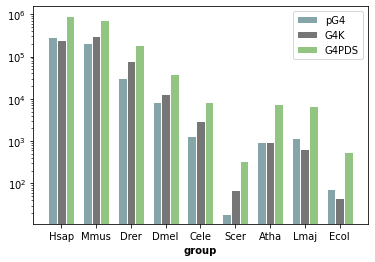

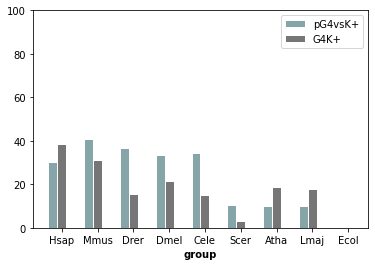

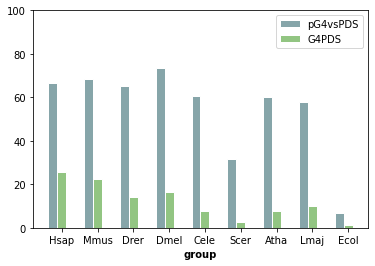

In [11]:
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [288474, 204537, 31255, 8298, 1351, 19, 970, 1153, 72]
bars2 = [242582, 311406, 77057, 13057, 3058, 69, 965, 654, 46]
bars3 = [895624, 736959, 184629, 38193, 8631, 337, 7647, 6588, 560]
['Hsap', 'Mmus', 'Drer', 'Dmel', 'Cele', 'Scer', 'Atha', 'Lmaj', 'Ecol']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#86a5a9', width=barWidth, edgecolor='white', label='pG4')
plt.bar(r2, bars2, color='#767676', width=barWidth, edgecolor='white', label='G4K')
plt.bar(r3, bars3, color='#92c582', width=barWidth, edgecolor='white', label='G4PDS')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Hsap', 'Mmus', 'Drer', 'Dmel', 'Cele', 'Scer', 'Atha', 'Lmaj', 'Ecol'])
plt.yscale('log') 
# Create legend & Show graphic
plt.legend()
plt.savefig("FiguresArticle/NumberpG4vsG4Marsico.svg")
plt.show()

# set height of bar
bars1 = [30.22, 40.77, 36.56, 33.53, 34.35, 10.53, 10.10, 10.00, 0]
bars2 = [38.70, 31.14, 15.53, 21.62, 15.27, 2.90, 18.96, 17.73, 0]
# bars1 = [30, 0, 36.56, 33.53, 0, 10.53, 10.10, 10.00, 0]
# bars2 = [29, 0, 25.16, 21.62, 0, 2.90, 11.60, 19.57, 0]
['Hsap', 'Mmus', 'Drer', 'Dmel', 'Cele', 'Scer', 'Atha', 'Lmaj', 'Ecol']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, bars1, color='#86a5a9', width=barWidth, edgecolor='white', label='pG4vsK+')
plt.bar(r2, bars2, color='#767676', width=barWidth, edgecolor='white', label='G4K+')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.ylim([0, +100])
plt.xticks([r + barWidth for r in range(len(bars1))], ['Hsap', 'Mmus', 'Drer', 'Dmel', 'Cele', 'Scer', 'Atha', 'Lmaj', 'Ecol'])
# Create legend & Show graphic
plt.legend()
plt.savefig("FiguresArticle/KBarPlot.svg")
plt.show()

# set height of bar
bars3 = [66.51, 68.55, 65.15, 73.57, 60.70, 31.58, 60.31, 58.02, 6.94]
bars4 = [25.82, 22.67, 14.39, 16.26, 7.72, 2.78, 7.73, 10.114, 1.07]
# bars3 = [65, 0, 65.15, 73.57, 0, 31.58, 60.31, 58.02, 6.94]
# bars4 = [63, 0, 25.10, 16.28, 0, 2.08, 8.28, 10.64, 1.07]
['Hsap', 'Mmus', 'Drer', 'Dmel', 'Cele', 'Scer', 'Atha', 'Lmaj', 'Ecol']

# Set position of bar on X axis
r3 = np.arange(len(bars3))
r4 = [x + barWidth for x in r3]

# Make the plot
plt.bar(r3, bars3, color='#86a5a9', width=barWidth, edgecolor='white', label='pG4vsPDS')
plt.bar(r4, bars4, color='#92c582', width=barWidth, edgecolor='white', label='G4PDS')
 
# Add xticks on the middle of the group bars
plt.ylim([0, +100])
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Hsap', 'Mmus', 'Drer', 'Dmel', 'Cele', 'Scer', 'Atha', 'Lmaj', 'Ecol'])
# Create legend & Show graphic
plt.legend()
plt.savefig("FiguresArticle/PDSBarplot.svg")
plt.show()

In [12]:
path = '/home/anais/Documents/Projet/G4Conservation/'
dfGenesDens = pd.read_csv(path+'Results/GenesDensities.csv', sep='\t')
dfGenesDens['ShortName'] = dfGenesDens.Sp.apply(applyShortName)
dfGenesDens.head

<bound method NDFrame.head of                                                  Sp  DensityGenes         GC  \
0                                   pan_troglodytes      0.162269  41.411866   
1                                      homo_sapiens      0.157128  41.431160   
2                                      pongo_abelii      0.153484  39.989608   
3                                      mus_musculus      0.179057  42.796644   
4                             monodelphis_domestica      0.140690  37.785004   
..                                              ...           ...        ...   
56  francisella_tularensis_subsp_tularensis_schu_s4      0.001726  33.286418   
57      vibrio_cholerae_o1_biovar_el_tor_str_n16961      0.007163  47.545797   
58                   haemophilus_influenzae_rd_kw20      0.009210  39.270580   
59        yersinia_pestis_biovar_microtus_str_91001      0.049307  49.022334   
60          escherichia_coli_str_k_12_substr_mg1655      0.018923  51.859621   

       Sp

## dotplot WT - Shuffle mean

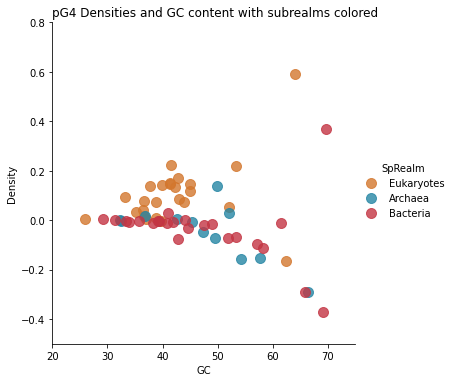

In [13]:
dfGenesDens['Density'] = dfGenesDens['DensityGenes'] - dfGenesDens['meanShuflle']

my_pl = {'Eukaryotes':"#D3772E", 'Archaea':"#2686a4", 'Bacteria':"#c33543"} #test1
sns.lmplot( x="GC", y="Density", data=dfGenesDens, fit_reg=False, hue='SpRealm', legend=True, palette=my_pl, scatter_kws={"s": 100})
plt.ylim([-0.5, +0.8])
plt.xlim([20, +75])
plt.title("pG4 Densities and GC content with subrealms colored", loc='left')
plt.savefig("FiguresArticle/dotPlotGeneMeanShuff.svg")
plt.show()

## Correlation GC - density

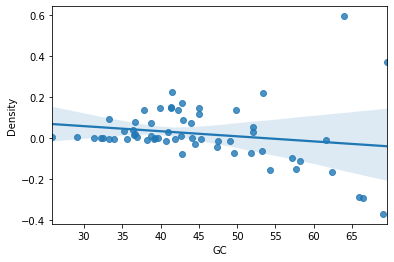

LinregressResult(slope=-0.0024750183650404708, intercept=0.1311869493155347, rvalue=-0.17979279774582937, pvalue=0.16559305119266665, stderr=0.001762969459993792)
Correlation between pG4 Densities and GC content for Archaea


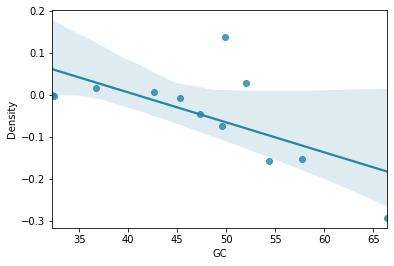

LinregressResult(slope=-0.00712603418083539, intercept=0.2914329650347577, rvalue=-0.65290184504141, pvalue=0.021345775211173507, stderr=0.0026142654905886224)
Correlation between pG4 Densities and GC content for Bacteria


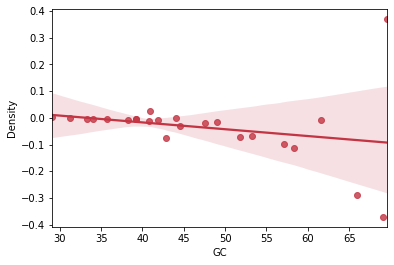

LinregressResult(slope=-0.0025517543497885838, intercept=0.0851229945774577, rvalue=-0.23871477165092664, pvalue=0.26128239230006256, stderr=0.0022131333832427517)
Correlation between pG4 Densities and GC content for Eukaryote


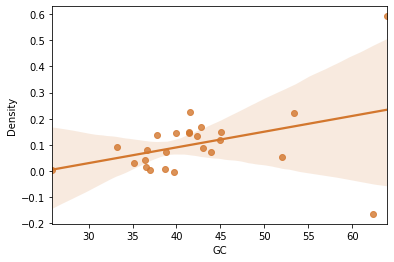

LinregressResult(slope=0.006021417006490613, intercept=-0.1509037236761374, rvalue=0.38518487475350716, pvalue=0.05724470032479084, stderr=0.0030080960794197967)


In [14]:
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfGenesDens)
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)

sns.regplot(x="GC", y="Density", data=dfTmp)
plt.show()
GC = np.array(dfTmp["GC"])
DensityGenes = np.array(dfTmp["Density"])
corr1 = scipy.stats.linregress(GC, DensityGenes)
print (corr1)

my_pl = {'Eukaryote':"#D3772E", 'Eukaryotes':"#D3772E", 'Archaea':"#2686a4", 'Bacteria':"#c33543"} #test1

groupsSp = dfTmp.groupby('Group')
for name1, group1 in groupsSp:
    print("Correlation between pG4 Densities and GC content for "+name1)
    sns.regplot(x="GC", y="Density", data=group1, scatter_kws={"color": my_pl[name1]}, line_kws={"color": my_pl[name1]})
    plt.savefig("FiguresArticle/"+name1+"CorrelationGene.svg")
    plt.show()
    GC = np.array(group1["GC"])
    DensityGenes = np.array(group1["Density"])
    corr1 = scipy.stats.linregress(GC, DensityGenes)
    print (corr1)

## Shuffle error bar

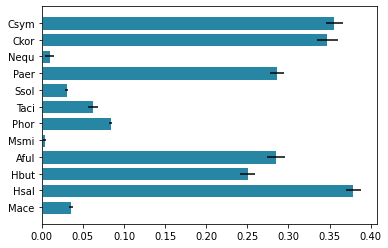

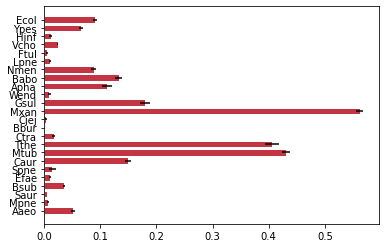

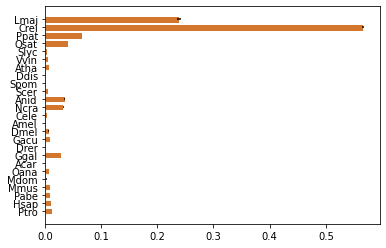

In [15]:
my_pl = {'Eukaryotes':"#D3772E", 'Archaea':"#2686a4", 'Bacteria':"#c33543"} #test1
groupsSp = dfGenesDens.groupby('SpRealm')
for name1, group1 in groupsSp:

    r = list(group1['ShortName'])

    greenBars = list(group1.meanShuflle)
    error = list(group1.stdShuffle)
    
    plt.barh(r, greenBars, xerr=error, color=my_pl[name1], edgecolor='white', label="Coding")
    
    plt.savefig('FiguresArticle/'+name1+'_gene_bar_plot_with_error_bars.svg')
    plt.show()
    

## double lollipop plot

Archaea


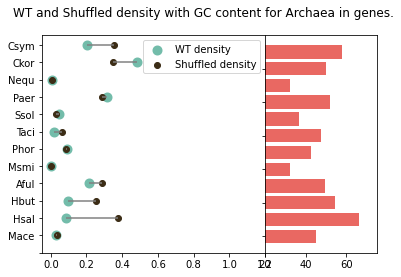

Bacteria


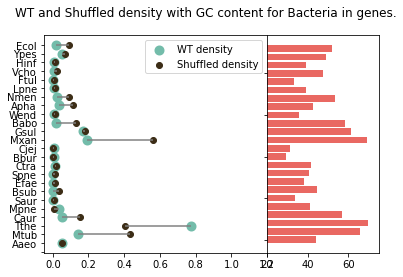

Eukaryotes


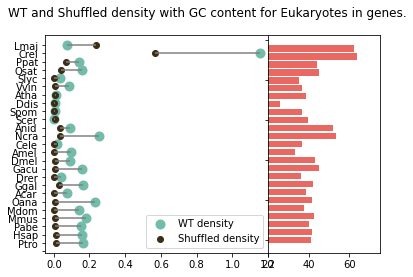

In [70]:
dicoOrder = {'Archaea' : ['Mace', 'Hsal', 'Hbut', 'Aful', 'Msmi', 'Phor', 'Taci', 'Ssol', 'Paer', 'Nequ', 'Ckor', 'Csym'],
            'Bacteria' : ['Aaeo', 'Mtub', 'Tthe', 'Caur', 'Mpne', 'Saur', 'Bsub', 'Efae', 'Spne', 'Ctra', 'Bbur', 'Cjej', 'Mxan', 'Gsul', 'Babo', 'Wend', 'Apha', 'Nmen', 'Lpne', 'Ftul', 'Vcho', 'Hinf', 'Ypes', 'Ecol'],
            'Eukaryotes' : ['Ptro', 'Hsap', 'Pabe', 'Mmus', 'Mdom', 'Oana', 'Acar', 'Ggal', 'Drer', 'Gacu', 'Dmel', 'Amel', 'Cele', 'Ncra', 'Anid', 'Scer', 'Spom', 'Ddis', 'Atha', 'Vvin', 'Slyc', 'Osat', 'Ppat', 'Crei', 'Lmaj']}

groupsSp = dfGenesDens.groupby('SpRealm')
for name1, group1 in groupsSp:
    print(name1)
    group1 = group1.drop_duplicates(subset=None, keep='first', inplace=False)
    group1['ShortName'] = pd.Categorical(
            group1['ShortName'], categories=dicoOrder[name1], ordered=True)
    group1 = group1.sort_values('ShortName')

    fig, axs = plt.subplots(1, 2, sharex='col',
                gridspec_kw={'hspace': 0, 'wspace': 0, 'width_ratios' : [2,1]})
    (ax1, ax2)= axs
    fig.suptitle('WT and Shuffled density with GC content for '+name1+' in genes.')    

    my_range=range(1,len(group1.index)+1)
    ax1.hlines(y=my_range, xmin=group1['DensityGenes'], xmax=group1['meanShuflle'], color='grey')
    ax1.scatter(group1['DensityGenes'], my_range, color='#73BCAA', label='WT density', linewidth=4)
    ax1.scatter(group1['meanShuflle'], my_range, color='#3C2D16', label='Shuffled density')
    ax1.set_xlim([-0.05, +1.20])
    y = np.arange(len(group1['ShortName'])+1)
    yLabels = ['']
    yLabels.extend( list(group1['ShortName']) )
    ax1.set_yticks(y)
    ax1.set_yticklabels(yLabels, fontdict=None, minor=False)
    ax1.legend()
    y_pos = np.arange(len(group1['ShortName']))
    ax2.barh(y_pos, group1['GC'], color='#E64E46', alpha=0.85)
    for ax in axs.flat:
        ax.label_outer()

    plt.savefig("FiguresArticle/"+name1+".svg")
    plt.show()

# TRANSCRIPTOME DATA
## All locations densyties

In [17]:
dfAllDens.head()
del dfAllDens['index']

## Global densities (figure 3)

In [18]:
dfGlobal.head()

Class  DensityShuf  DensityWt         GC  NbRepro  NbTrpG4Shuf  NbTrpG4Wt  \
0  Coding     0.099498   0.034113  42.654655        3           89         35   
1  Coding     0.005018   0.073978  38.770051        3         1603       6320   
2  Coding     0.012193   0.095388  33.162552        3          812       2049   
3  Coding     0.045527   0.051642  43.614563        3           66         73   
4  Coding     0.017790   0.014115  38.404630        3         1830       1518   

   NbpG4rShuf  NbpG4rWt  PercentShuf  ...                                Sp  \
0         105        36     6.582840  ...  anaplasma_phagocytophilum_str_hz   
1        2074     30573    17.113270  ...               anolis_carolinensis   
2        1338     10467     6.112157  ...                    apis_mellifera   
3          67        76     4.249839  ...              aquifex_aeolicus_vf5   
4        2270      1801     3.803546  ...              arabidopsis_thaliana   

         Tot   nbTr        nuclA     nuclC     nuclG        nuclT  ShortName  \
0    1055301   1352     300027.0    181725    268410     305139.0       Apha   
1  413272024   9367  119877542.0  79119613  81106162  125197277.0       Acar   
2  109730934  13285   36030894.0  17917963  18471615   35946600.0       Amel   
3    1471669   1553     479408.0    284022    357840     350399.0       Aaeo   
4  127597310  48113   36598939.0  23284654  25718621   41995096.0       Atha   

  meanShuffle  stdShuffle  
0    0.102138    0.009457  
1    0.005184    0.000151  
2    0.012820    0.000448  
3    0.045861    0.005429  
4    0.017769    0.000187  

[5 rows x 21 columns]

### Human results

This figure can be compared to fig 3 of the first article

Text(0, 0.5, 'Species')

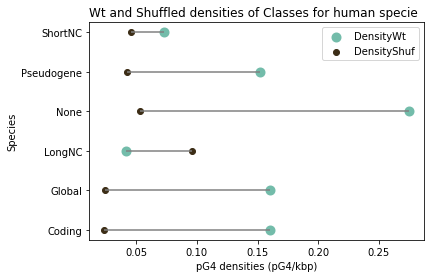

In [19]:
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfGlobal[dfGlobal.Sp == 'homo_sapiens'])
dfTmp = dfTmp.drop_duplicates(subset=None, keep='first', inplace=False)

my_range=range(1,len(dfTmp.index)+1)
plt.hlines(y=my_range, xmin=dfTmp['DensityWt'], xmax=dfTmp['DensityShuf'], color='grey')
plt.scatter(dfTmp['DensityWt'], my_range, color='#73BCAA', label='DensityWt', linewidth=4)
plt.scatter(dfTmp['DensityShuf'], my_range, color='#3C2D16', label='DensityShuf')
plt.legend()
plt.yticks(my_range, dfTmp['Class'])
plt.title("Wt and Shuffled densities of Classes for human specie", loc='left')
plt.xlabel('pG4 densities (pG4/kbp)')
plt.ylabel('Species')

### Error bar shuffle

In [20]:
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfGlobal[dfGlobal.Class == 'Global'])
dfTmp = dfTmp.drop_duplicates(subset=None, keep='first', inplace=False)
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)

dfTmp.head()

Class  DensityShuf  DensityWt         GC  NbRepro  NbTrpG4Shuf  \
61  Global     0.099930   0.035489  42.796971        3           90   
62  Global     0.005039   0.073957  38.775347        3         1611   
63  Global     0.012191   0.095371  33.166381        3          812   
64  Global     0.049202   0.052526  44.090212        3           70   
65  Global     0.017764   0.014088  38.404026        3         1836   

    NbTrpG4Wt  NbpG4rShuf  NbpG4rWt  PercentShuf  ...        Tot   nbTr  \
61         37         107        38     6.263048  ...    1070751   1437   
62       6333        2084     30587    14.260423  ...  413577136  11297   
63       2049        1338     10467     6.013033  ...  109750170  13504   
64         76          74        79     4.209260  ...    1504005   1663   
65       1522        2276      1805     3.685711  ...  128123092  49814   

          nuclA     nuclC     nuclG        nuclT  ShortName  meanShuffle  \
61     303721.0    185802    272447     308781.0       Apha     0.102509   
62  119963189.0  79187057  81178914  125276546.0       Acar     0.005077   
63   36034748.0  17922797  18477363   35951400.0       Amel     0.012819   
64     484775.0    294870    368249     356111.0       Aaeo     0.051715   
65   36745137.0  23380505  25823921   42173529.0       Atha     0.017668   

   stdShuffle      Group  
61   0.009346   Bacteria  
62   0.000095  Eukaryote  
63   0.000449  Eukaryote  
64   0.006148   Bacteria  
65   0.000224  Eukaryote  

[5 rows x 22 columns]

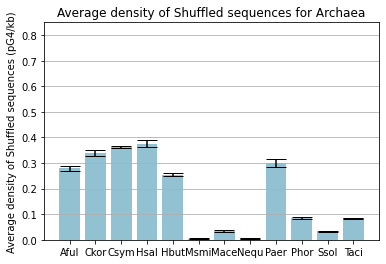

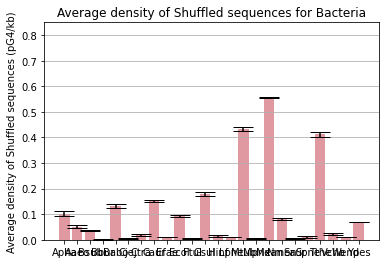

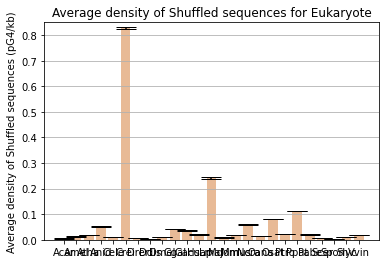

In [21]:
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfGlobal[dfGlobal.Class == 'Global'])
dfTmp = dfTmp.drop_duplicates(subset=None, keep='first', inplace=False)
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)

my_pl = {'Eukaryote':"#D3772E", 'Archaea':"#2686a4", 'Bacteria':"#c33543"} #test1
groupsSp = dfTmp.groupby('Group')
for name1, group1 in groupsSp:
    # Create lists for the plot
    sp = list(group1.ShortName)
    x_pos = np.arange(len(group1.Sp))
    CTEs = list(group1.meanShuffle)
    error = list(group1.stdShuffle)
    
    fig, ax = plt.subplots()
    ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10, color=my_pl[name1])
    ax.set_ylabel('Average density of Shuffled sequences (pG4/kb)')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(sp)
    ax.set_ylim([0, +0.85])
    ax.set_title('Average density of Shuffled sequences for '+name1)
    ax.yaxis.grid(True)

    # Save the figure and show
    #plt.tight_layout()
    plt.savefig('FiguresArticle/'+name1+'_transcripts_bar_plot_with_error_bars.svg')
    plt.show()

### For each specie groupe, get the correlation graphics GC/density

Correlation between pG4 Densities and GC content for Archaea


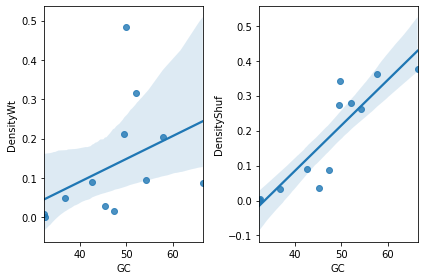

LinregressResult(slope=0.005823133044522587, intercept=-0.1425406949007549, rvalue=0.4033108288617329, pvalue=0.19358636355085582, stderr=0.00417799432985797)
LinregressResult(slope=0.013016538417498152, intercept=-0.43599340590166225, rvalue=0.8892347840509842, pvalue=0.00010873248883064522, stderr=0.0021175015052770736)
Correlation between pG4 Densities and GC content for Bacteria


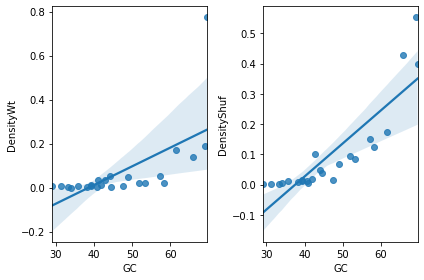

LinregressResult(slope=0.008494770382258605, intercept=-0.32837362808471005, rvalue=0.6317035099368117, pvalue=0.0009297798989441541, stderr=0.0022225238374234363)
LinregressResult(slope=0.010920468388150075, intercept=-0.4097850040576954, rvalue=0.8638674364116876, pvalue=5.389271518060763e-08, stderr=0.0013575984830186687)
Correlation between pG4 Densities and GC content for Eukaryote


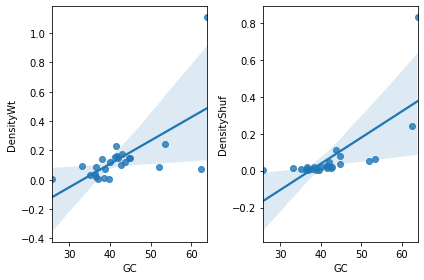

LinregressResult(slope=0.01592809636593553, intercept=-0.5288943704315335, rvalue=0.6290651004734401, pvalue=0.0007556680654635866, stderr=0.004104142509946861)
LinregressResult(slope=0.014236303306793752, intercept=-0.532320928185626, rvalue=0.7150315772807994, pvalue=5.901641258157678e-05, stderr=0.002902301472841266)


In [22]:
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfGlobal[dfGlobal.Class == 'Global'])
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)

groupsSp = dfTmp.groupby('Group')
for name1, group1 in groupsSp:
    print("Correlation between pG4 Densities and GC content for "+name1)
    plt.subplot(1, 2, 1)
    sns.regplot(x="GC", y="DensityWt", data=group1)
    plt.subplot(1, 2, 2)
    sns.regplot(x="GC", y="DensityShuf", data=group1)
    plt.tight_layout()
    plt.show()
    GC = np.array(group1["GC"])
    DensityWt = np.array(group1["DensityWt"])
    DensityShuf = np.array(group1["DensityShuf"])
    corr1 = scipy.stats.linregress(GC, DensityWt)
    corr2 = scipy.stats.linregress(GC, DensityShuf)
    print (corr1)
    print (corr2)

### Dotplot

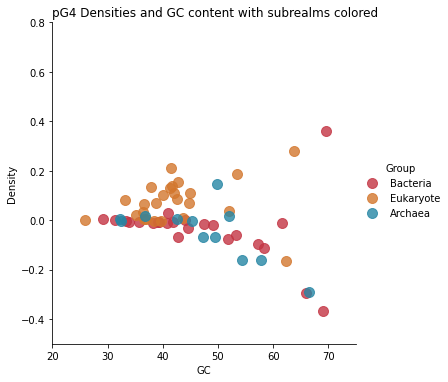

In [23]:
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfGlobal[dfGlobal.Class == 'Global'])
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)
dfTmp['Density'] = dfTmp['DensityWt'] - dfTmp['meanShuffle']

my_pl = {'Eukaryote':"#D3772E", 'Archaea':"#2686a4", 'Bacteria':"#c33543"} #test1
sns.lmplot( x="GC", y="Density", data=dfTmp, fit_reg=False, hue='Group', legend=True, palette=my_pl, scatter_kws={"s": 100})
plt.ylim([-0.5, +0.8])
plt.xlim([20, +75])
plt.title("pG4 Densities and GC content with subrealms colored", loc='left')
plt.savefig("FiguresArticle/dotPlotTranscriptMeanShuff.svg")
plt.show()

### double lolipopplot

Archaea


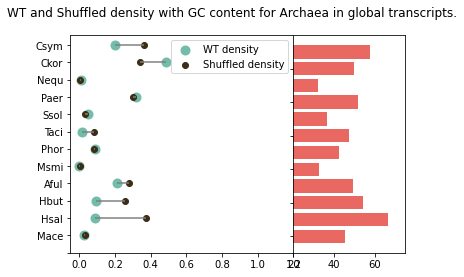

Bacteria


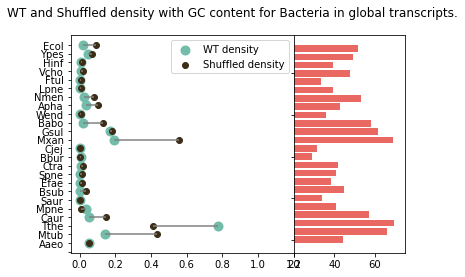

Eukaryote


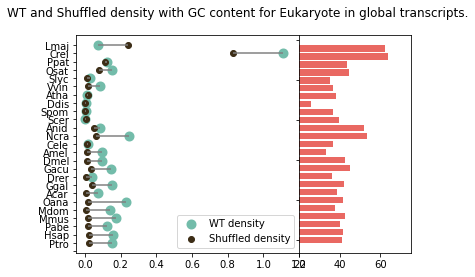

In [69]:
dicoOrder = {'Archaea' : ['Mace', 'Hsal', 'Hbut', 'Aful', 'Msmi', 'Phor', 'Taci', 'Ssol', 'Paer', 'Nequ', 'Ckor', 'Csym'],
            'Bacteria' : ['Aaeo', 'Mtub', 'Tthe', 'Caur', 'Mpne', 'Saur', 'Bsub', 'Efae', 'Spne', 'Ctra', 'Bbur', 'Cjej', 'Mxan', 'Gsul', 'Babo', 'Wend', 'Apha', 'Nmen', 'Lpne', 'Ftul', 'Vcho', 'Hinf', 'Ypes', 'Ecol'],
            'Eukaryote' : ['Ptro', 'Hsap', 'Pabe', 'Mmus', 'Mdom', 'Oana', 'Acar', 'Ggal', 'Drer', 'Gacu', 'Dmel', 'Amel', 'Cele', 'Ncra', 'Anid', 'Scer', 'Spom', 'Ddis', 'Atha', 'Vvin', 'Slyc', 'Osat', 'Ppat', 'Crei', 'Lmaj']}

dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfGlobal[dfGlobal.Class == 'Global'])
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)

groupsSp = dfTmp.groupby('Group')
for name1, group1 in groupsSp:
    print(name1)
    group1 = group1.drop_duplicates(subset=None, keep='first', inplace=False)
    group1['ShortName'] = pd.Categorical(
            group1['ShortName'], categories=dicoOrder[name1], ordered=True)
    group1 = group1.sort_values('ShortName')

    fig, axs = plt.subplots(1, 2, sharex='col',
                gridspec_kw={'hspace': 0, 'wspace': 0, 'width_ratios' : [2,1]})
    (ax1, ax2)= axs
    fig.suptitle('WT and Shuffled density with GC content for '+name1+' in global transcripts.')    

    my_range=range(1,len(group1.index)+1)
    ax1.hlines(y=my_range, xmin=group1['DensityWt'], xmax=group1['meanShuffle'], color='grey')
    ax1.scatter(group1['DensityWt'], my_range, color='#73BCAA', label='WT density', linewidth=4)
    ax1.scatter(group1['meanShuffle'], my_range, color='#3C2D16', label='Shuffled density')
    ax1.set_xlim([-0.05, +1.20])
    y = np.arange(len(group1['ShortName'])+1)
    yLabels = ['']
    yLabels.extend( list(group1['ShortName']) )
    ax1.set_yticks(y)
    ax1.set_yticklabels(yLabels, fontdict=None, minor=False)
    ax1.legend()
    y_pos = np.arange(len(group1['ShortName']))
    ax2.barh(y_pos, group1['GC'], color='#E64E46', alpha=0.85)
    for ax in axs.flat:
        ax.label_outer()

    plt.savefig("FiguresArticle/"+name1+"_global_transcript.svg")
    plt.show()

### Boxplot

In [25]:
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = 1-scipy.stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return f, p

def AllTest(a,b,alpha, name1, name2):
    if len(a) >= 3 and len(b) >= 3:
        shapA = scipy.stats.shapiro(a)
        shapB = scipy.stats.shapiro(b)

        if shapA[1] > alpha and shapB[1] > alpha:
            print("\tFisher test")
            f = f_test(a, b)
            if f[1] > alpha:
                print("\tt test")
                tTest =scipy.stats.ttest_ind(a,b)
                if tTest[1] <= alpha:
                    print("Means are significatly different")
                else:
                    print("Means are not differents")
                return(tTest)
            else:
                print("\twelch test")
                welch = scipy.stats.ttest_ind(a,b, equal_var=False)
                if welch[1] <= alpha:
                    print("Means are significatly different")
                else:
                    print("Means are not differents")
                return(welch)
        else:
            print("\tmannwhitneyu test")
            man = scipy.stats.mannwhitneyu(a,b)
            if man[1] <= alpha:
                print("Means are significatly different")
            else:
                print("Means are not differents")
            return(man)
    else:
        print('There are only 3 data for '+name1+' of '+name2+' transcripts.')
        return []
        
def makeBoxPlotSpvsSp(resTest, df, alpha, typeDens, listGrp, name2, cl):
    if typeDens:
        if 'Shuf' in typeDens:
            my_pal = {}
            for grp in listGrp:
                my_pal[grp] = "#E64E46"
        else:
            my_pal = {}
            for grp in listGrp:
                my_pal[grp] = "#73BCAA"
    else:
        typeDens = 'DiffDens'
        my_pal = {}
        paletteSp = {'Eukaryote': '#D3772E', 'Archaea' : '#2686a4', 'Bacteria' : '#c33543'}
        for grp in listGrp:
            my_pal[grp] = paletteSp[grp]
    if resTest > alpha:
        sns.boxplot(x="Group", y=typeDens, data=df, palette=my_pal)
        plt.title("Densities of "+'/'.join(listGrp)+" for "+name2+cl+" transcripts classe", loc='left')
        plt.savefig("FiguresArticle/"+"-".join(listGrp)+"_boxplot_"+name2+cl+"_transcriptSp.svg")
        plt.show()
    else:
        sns.boxplot(x="Group", y=typeDens, data=df, palette=my_pal)
        plt.title("Densities for "+'/'.join(listGrp)+" for "+name2+cl+" transcripts classe", loc='left')
        # statistical annotation
        x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
        y, h, col = df[typeDens].max() + 0.25, 0.25, 'k'
        plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
        plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)
        plt.savefig("FiguresArticle/"+"-".join(listGrp)+"_boxplot_"+name2+cl+"_transcriptSp.svg")
        plt.show()

def changeDfColtype(a, b, df):
    dfTmp2 = pd.DataFrame()
    dfTmp2['Density'] = a
    dfTmp2['Type'] = 'WT'

    dfTmp3 = pd.DataFrame()
    dfTmp3 = dfTmp3.append(df)
    dfTmp3['Type'] = 'Shuffled'
    dfTmp3['Density'] = dfTmp3['DensityShuf']
    dfTmp3 = dfTmp3[['Type','Density']]

    frames = [dfTmp2,dfTmp3]
    result = pd.concat(frames)
    return result

def makeBoxPlotWTvsShuf(resTest, df, alpha, a, b, name1, name2, cl):
    my_pal = {"WT": "#73BCAA", "Shuffled": "#E64E46"}
    res = changeDfColtype(a, b, df)
    if resTest > alpha:
        sns.boxplot(x="Type", y="Density", data=res, palette=my_pal)
        plt.title("Densities of "+name1+" for "+name2+" transcripts classe", loc='left')
        plt.savefig("FiguresArticle/"+name1+name2+"boxplot_"+cl+"_transcriptWTShuf.svg")
        plt.show()
    else:
        sns.boxplot(x="Type", y="Density", data=res, palette=my_pal)
        plt.title("Densities of "+name1+" for "+name2+" transcripts classe", loc='left')
        # statistical annotation
        x1, x2 = 0, 1
        y, h, col = res['Density'].max() + 0.15, 0.15, 'k'
        plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
        plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)
        plt.savefig("FiguresArticle/"+name1+name2+"boxplot_"+cl+"_transcriptWTShuf.svg")
        plt.show()
    
def makeBoxPlotClvsCl(resTest, df, alpha, listSubcl, name2, cl):
    paletteSp = {'Eukaryote': '#D3772E', 'Archeae' : '#2686a4', 'Bacteria' : '#c33543'}
    my_pal = {}
    for cl in listSubcl:
        my_pal[cl] = paletteSp[name2]
    if resTest > alpha:
        sns.boxplot(x="Class", y='DiffDens', data=df, palette=my_pal)
        plt.title("Densities of "+'/'.join(listSubcl)+" for "+name2+" realm", loc='left')
        plt.savefig("FiguresArticle/"+name1+name2+"boxplot_"+cl+"_transcriptCl.svg")
        plt.show()
    else:
        sns.boxplot(x="Class", y='DiffDens', data=df, palette=my_pal)
        plt.title("Densities of "+'/'.join(listSubcl)+" for "+name2+" realm", loc='left')
        # statistical annotation
        x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
        y, h, col = df['DiffDens'].max() + 0.25, 0.25, 'k'
        plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
        plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)
        plt.savefig("FiguresArticle/"+name1+name2+"boxplot_"+cl+"_transcriptCl.svg")
        plt.show()

	mannwhitneyu test
Means are not differents
MannwhitneyuResult(statistic=61.0, pvalue=0.2721850729283049)


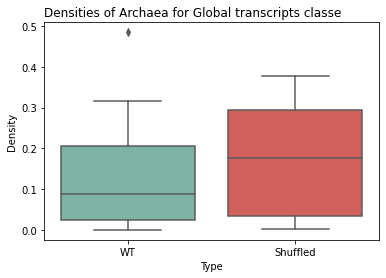

	mannwhitneyu test
Means are not differents
MannwhitneyuResult(statistic=211.0, pvalue=0.05735136519127942)


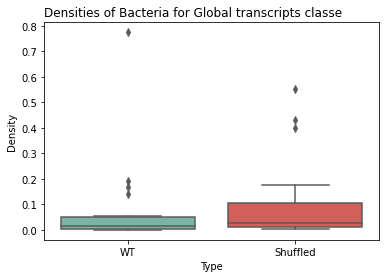

	mannwhitneyu test
Means are significatly different
MannwhitneyuResult(statistic=153.0, pvalue=0.0010175789036391894)


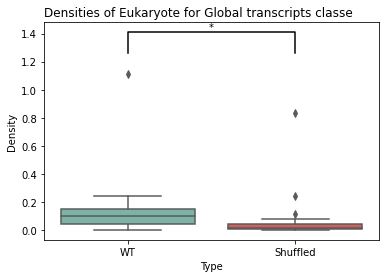

In [26]:
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfGlobal[dfGlobal.Class == 'Global'])
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)
dfTmp['ShortName'] = dfTmp.Sp.apply(applyShortName)

groupsSp = dfTmp.groupby('Group')
for name1, group1 in groupsSp:
    groupsClass = group1.groupby('Class')
    for name2, group2 in groupsClass:
        if name2 != 'None':
            group2 = group2.drop_duplicates(subset=None, keep='first', inplace=False)

            a = group2['DensityWt']
            b = group2['meanShuffle']

            res = AllTest(a,b,0.05, name1, name2)

            if res != []:
                print(res)
                makeBoxPlotWTvsShuf(res[1], group2, 0.05, a, b, name1, name2, 'Global')

	Fisher test
	t test
Means are significatly different
Ttest_indResult(statistic=3.533374821889868, pvalue=0.0011748044847342616)


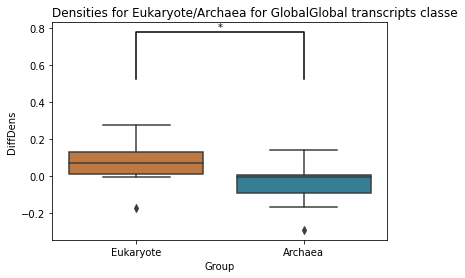

	mannwhitneyu test
Means are significatly different
MannwhitneyuResult(statistic=61.0, pvalue=9.211295961671414e-07)


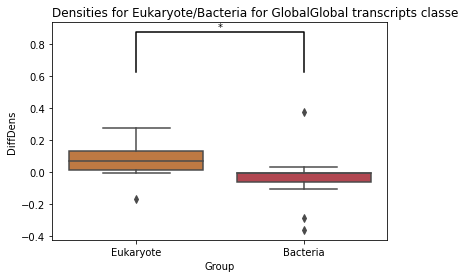

	mannwhitneyu test
Means are not differents
MannwhitneyuResult(statistic=131.0, pvalue=0.33743541163683266)


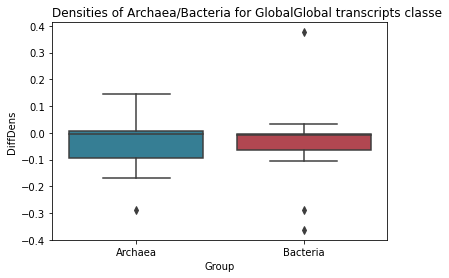

In [27]:
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfGlobal[dfGlobal.Class == 'Global'])
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)
dfTmp['ShortName'] = dfTmp.Sp.apply(applyShortName)
dfTmp['DiffDens'] = dfTmp['DensityWt'] - dfTmp['DensityShuf']
spList = [ ['Eukaryote', 'Archaea'], ['Eukaryote', 'Bacteria'], ['Archaea', 'Bacteria'] ]

for duoSp in spList:
    a = dfTmp[dfTmp.Group == duoSp[0] ]['DiffDens']
    b = dfTmp[dfTmp.Group == duoSp[1] ]['DiffDens']

    res = AllTest(a,b,0.05, name2, '/'.join(duoSp))

    dfTmp2 = pd.DataFrame()
    dfTmp2 = dfTmp2.append(dfTmp[dfTmp.Group == duoSp[0] ])
    dfTmp2 = dfTmp2.append(dfTmp[dfTmp.Group == duoSp[1] ])

    if res != []:
        print(res)
        makeBoxPlotSpvsSp(res[1], dfTmp2, 0.05, None, duoSp, name2, 'Global')

### Correlation

Correlation between pG4 Densities and GC content for Archaea


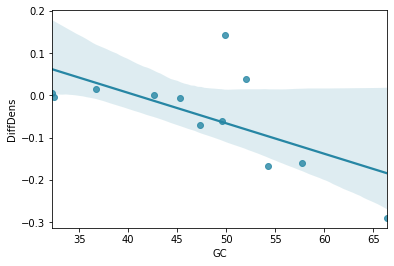

LinregressResult(slope=-0.007193405372975563, intercept=0.29345271100090725, rvalue=-0.6433067071340289, pvalue=0.024017694785118334, stderr=0.0027072180753670086)
Correlation between pG4 Densities and GC content for Bacteria


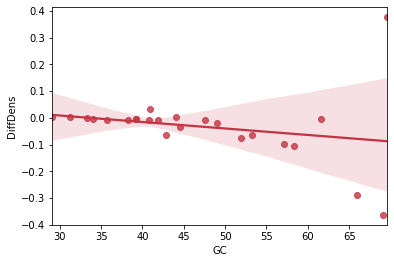

LinregressResult(slope=-0.0024256980058914666, intercept=0.08141137597298519, rvalue=-0.22715607571184473, pvalue=0.2857646247675373, stderr=0.002217158969314158)
Correlation between pG4 Densities and GC content for Eukaryote


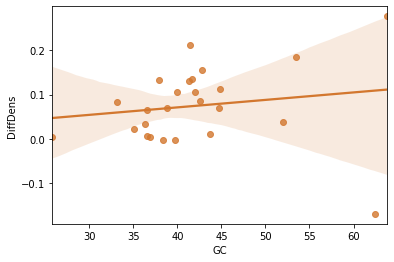

LinregressResult(slope=0.0016917930591417818, intercept=0.0034265577540922715, rvalue=0.16029188614104145, pvalue=0.4440351616021062, stderr=0.0021722989089743086)


In [28]:
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfGlobal[dfGlobal.Class == 'Global'])
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)
dfTmp['ShortName'] = dfTmp.Sp.apply(applyShortName)
dfTmp['DiffDens'] = dfTmp['DensityWt'] - dfTmp['DensityShuf']

my_pl = {'Eukaryote':"#D3772E", 'Eukaryotes':"#D3772E", 'Archaea':"#2686a4", 'Bacteria':"#c33543"} #test1

groupsSp = dfTmp.groupby('Group')
for name1, group1 in groupsSp:
    print("Correlation between pG4 Densities and GC content for "+name1)
    sns.regplot(x="GC", y="DiffDens", data=group1, scatter_kws={"color": my_pl[name1]}, line_kws={"color": my_pl[name1]})
    plt.savefig("FiguresArticle/"+name1+"CorrelationGlobal.svg")
    plt.show()
    GC = np.array(group1["GC"])
    DensityGenes = np.array(group1["DiffDens"])
    corr1 = scipy.stats.linregress(GC, DensityGenes)
    print (corr1)

## Correlation density vs other things
In the litterature, it seems to appear there is a **link between pG4 and pathogenicity**, So will try to check that.

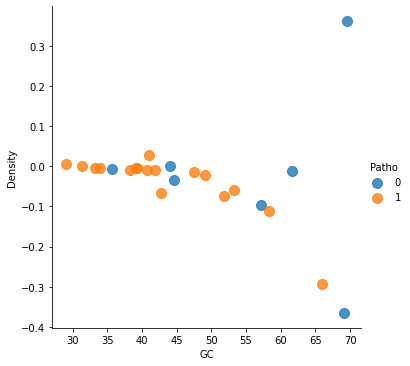

In [29]:
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfGlobal[dfGlobal.Class == 'Global'])
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)
dfTmp = dfTmp[dfTmp.Group == 'Bacteria']
dfTmp['Patho'] = dfTmp.Sp.apply(getPatho)
dfTmp['Density'] = dfTmp['DensityWt'] - dfTmp['meanShuffle']

sns.lmplot( x="GC", y="Density", data=dfTmp, fit_reg=False, hue='Patho', legend=True, scatter_kws={"s": 100})
plt.savefig("FiguresArticle/GlobalPathogenicity.svg")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.



Archaea   GC and density


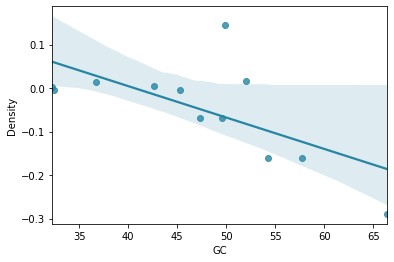

LinregressResult(slope=-0.007219374342549411, intercept=0.29335460660778623, rvalue=-0.6552252728213075, pvalue=0.020732820270448937, stderr=0.002632116983453626)

Archaea   temp and density


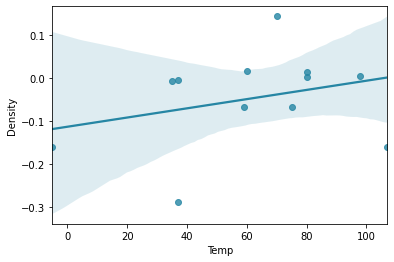

LinregressResult(slope=0.0010752375942505723, intercept=-0.11321727822537762, rvalue=0.29823477484370153, pvalue=0.3464244707550065, stderr=0.0010882250019295624)

Archaea   temp and GC


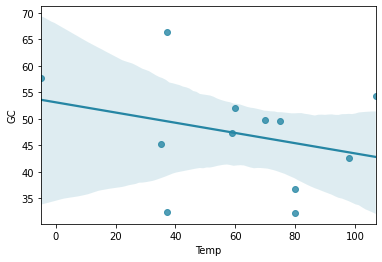

LinregressResult(slope=-0.8990490325666679, intercept=103.53567298547264, rvalue=-0.29418506126390354, pvalue=0.3533268325848796, stderr=0.9236477504805783)

Bacteria   GC and density


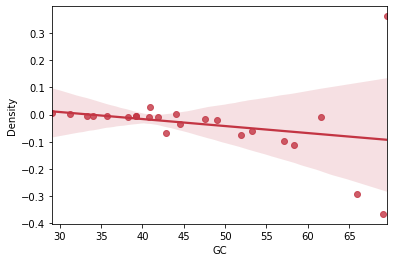

LinregressResult(slope=-0.002580589607501624, intercept=0.08671196758717267, rvalue=-0.24457787516479332, pvalue=0.24939616406030857, stderr=0.0021812041946984028)

Bacteria   temp and density


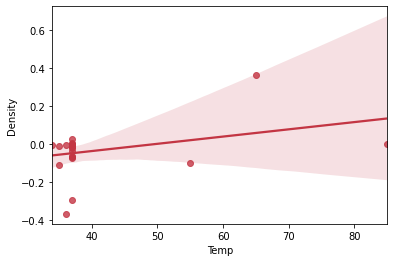

LinregressResult(slope=0.003800879839233722, intercept=-0.18763575203630162, rvalue=0.3534959272542269, pvalue=0.09016398818000554, stderr=0.002144383685028052)

Bacteria   temp and GC


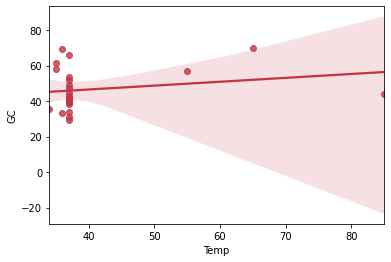

LinregressResult(slope=0.2105805228586462, intercept=30.728757885240178, rvalue=0.21459329532485602, pvalue=0.31395384905031953, stderr=0.20434002974042725)


In [30]:
# TEMPERATURE
dfTmp = pd.DataFrame()
dfTmp = dfGlobal[dfGlobal.Class == 'Global']
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)
dfTmp = dfTmp[dfTmp.Group != 'Eukaryote']
dfTmp['Temp'] = dfTmp.Sp.apply(getTemp)
dfTmp['Density'] = dfTmp['DensityWt'] - dfTmp['meanShuffle']

del dfTmp['PercentShuf']
del dfTmp['nuclC']
del dfTmp['nbTr']
del dfTmp['NbpG4rWt']
del dfTmp['NbpG4rShuf']
del dfTmp['NbTrpG4Wt']
del dfTmp['NbTrpG4Shuf']
del dfTmp['Tot']
del dfTmp['nuclG']
del dfTmp['PercentWt']
dfTmp = dfTmp.drop_duplicates(subset=None, keep='first', inplace=False)

my_pl = {'Eukaryote':"#D3772E", 'Eukaryotes':"#D3772E", 'Archaea':"#2686a4", 'Bacteria':"#c33543"} #test1

groupsSp = dfTmp.groupby('Group')
for name1, group1 in groupsSp:
    print("")
    print(name1+"   "+"GC and density")
    sns.regplot(x="GC", y="Density", data=group1, scatter_kws={"color": my_pl[name1]}, line_kws={"color": my_pl[name1]})
    plt.show()
    GC = np.array(group1["GC"])
    DensityGenes = np.array(group1["Density"])
    corr1 = scipy.stats.linregress(GC, DensityGenes)
    print (corr1)
    
    print("")
    print(name1+"   "+"temp and density")
    sns.regplot(x="Temp", y="Density", data=group1, scatter_kws={"color": my_pl[name1]}, line_kws={"color": my_pl[name1]})
    plt.savefig("FiguresArticle/"+name1+"   "+"temp and density.svg")
    plt.show()
    GC = np.array(group1["Temp"])
    DensityGenes = np.array(group1["Density"])
    corr1 = scipy.stats.linregress(GC, DensityGenes)
    print (corr1)
    
    print("")
    print(name1+"   "+"temp and GC")
    sns.regplot(x="Temp", y="GC", data=group1, scatter_kws={"color": my_pl[name1]}, line_kws={"color": my_pl[name1]})
    plt.savefig("FiguresArticle/"+name1+"   "+"temp and GC.svg")
    plt.show()
    GC = np.array(group1["GC"])
    DensityGenes = np.array(group1["Temp"])
    corr1 = scipy.stats.linregress(GC, DensityGenes)
    print (corr1)

## Coding transcripts

In [31]:
print(dfClassCoding.head())
print(list(set(dfClassCoding.Biotype)))

  Biotype   Class  DensityShuf  DensityWt         GC  NbRepro  NbTrpG4Shuf  \
0  Coding  Coding     0.103708   0.037425  42.603535        3           89   
1  Coding  Coding     0.009823   0.072580  39.209669        3         1603   
2  Coding  Coding     0.019552   0.080039  33.725327        3          812   
3  Coding  Coding     0.052132   0.053761  43.508342        3           66   
4  Coding  Coding     0.023148   0.013711  39.682908        3         1830   

   NbTrpG4Wt  NbpG4rShuf  NbpG4rWt  ...                                Sp  \
0         35         230        83  ...  anaplasma_phagocytophilum_str_hz   
1       6320        4546     33590  ...               anolis_carolinensis   
2       2049        2970     12158  ...                    apis_mellifera   
3         73         160       165  ...              aquifex_aeolicus_vf5   
4       1518        6542      3875  ...              arabidopsis_thaliana   

         Tot   nbTr        nuclA     nuclC     nuclG        nuclT  \

### Dotplot

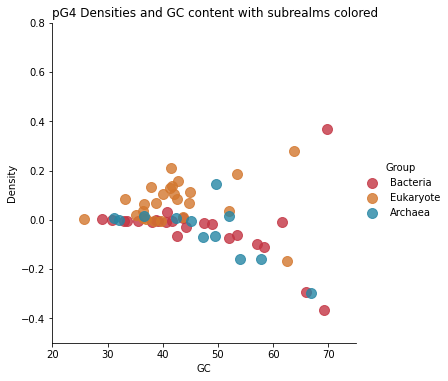

In [32]:
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfClassCoding[dfClassCoding.Biotype == 'protein_coding'])
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)
dfTmp['Density'] = dfTmp['DensityWt'] - dfTmp['meanShuffle']

my_pl = {'Eukaryote':"#D3772E", 'Archaea':"#2686a4", 'Bacteria':"#c33543"} #test1
sns.lmplot( x="GC", y="Density", data=dfTmp, fit_reg=False, hue='Group', legend=True, palette=my_pl, scatter_kws={"s": 100})
plt.title("pG4 Densities and GC content with subrealms colored", loc='left')
plt.ylim([-0.5, +0.8])
plt.xlim([20, +75])
plt.savefig("FiguresArticle/dotPlotCodingTranscriptMeanShuff.svg")
plt.show()

Archaea


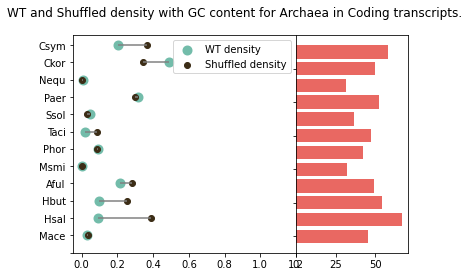

Bacteria


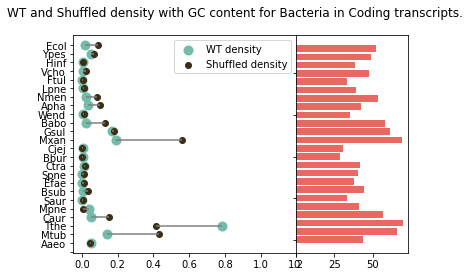

Eukaryote


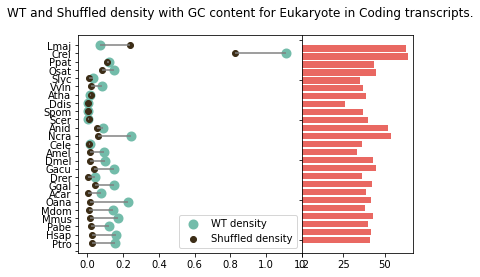

In [33]:
dicoOrder = {'Archaea' : ['Mace', 'Hsal', 'Hbut', 'Aful', 'Msmi', 'Phor', 'Taci', 'Ssol', 'Paer', 'Nequ', 'Ckor', 'Csym'],
            'Bacteria' : ['Aaeo', 'Mtub', 'Tthe', 'Caur', 'Mpne', 'Saur', 'Bsub', 'Efae', 'Spne', 'Ctra', 'Bbur', 'Cjej', 'Mxan', 'Gsul', 'Babo', 'Wend', 'Apha', 'Nmen', 'Lpne', 'Ftul', 'Vcho', 'Hinf', 'Ypes', 'Ecol'],
            'Eukaryote' : ['Ptro', 'Hsap', 'Pabe', 'Mmus', 'Mdom', 'Oana', 'Acar', 'Ggal', 'Drer', 'Gacu', 'Dmel', 'Amel', 'Cele', 'Ncra', 'Anid', 'Scer', 'Spom', 'Ddis', 'Atha', 'Vvin', 'Slyc', 'Osat', 'Ppat', 'Crei', 'Lmaj']}
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfClassCoding[dfClassCoding.Biotype == 'protein_coding'])
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)

groupsSp = dfTmp.groupby('Group')
for name1, group1 in groupsSp:
    print(name1)
    group1 = group1.drop_duplicates(subset=None, keep='first', inplace=False)
    group1['ShortName'] = pd.Categorical(
            group1['ShortName'], categories=dicoOrder[name1], ordered=True)
    group1 = group1.sort_values('ShortName')

    fig, axs = plt.subplots(1, 2, sharex='col',
                gridspec_kw={'hspace': 0, 'wspace': 0, 'width_ratios' : [2,1]})
    (ax1, ax2)= axs
    fig.suptitle('WT and Shuffled density with GC content for '+name1+' in Coding transcripts.')    

    my_range=range(1,len(group1.index)+1)
    ax1.hlines(y=my_range, xmin=group1['DensityWt'], xmax=group1['meanShuffle'], color='grey')
    ax1.scatter(group1['DensityWt'], my_range, color='#73BCAA', label='WT density', linewidth=4)
    ax1.scatter(group1['meanShuffle'], my_range, color='#3C2D16', label='Shuffled density')
    ax1.set_xlim([-0.05, +1.20])
    y = np.arange(len(group1['ShortName'])+1)
    yLabels = ['']
    yLabels.extend( list(group1['ShortName']) )
    ax1.set_yticks(y)
    ax1.set_yticklabels(yLabels, fontdict=None, minor=False)
    ax1.legend()
    y_pos = np.arange(len(group1['ShortName']))
    ax2.barh(y_pos, group1['GC'], color='#E64E46', alpha=0.85)
    for ax in axs.flat:
        ax.label_outer()

    plt.savefig("FiguresArticle/"+name1+"_"+"Coding_transcript.svg")
    plt.show()

### Boxplot

	mannwhitneyu test
Means are not differents
MannwhitneyuResult(statistic=62.0, pvalue=0.2916802333513516)


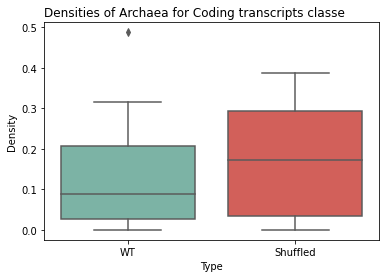

	mannwhitneyu test
Means are not differents
MannwhitneyuResult(statistic=223.0, pvalue=0.09175852954176483)


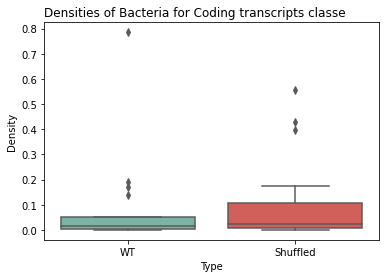

	mannwhitneyu test
Means are significatly different
MannwhitneyuResult(statistic=155.0, pvalue=0.001158585243892702)


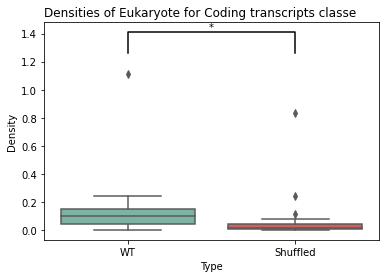

In [34]:
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfClassCoding[dfClassCoding.Biotype == 'protein_coding'])
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)
dfTmp['ShortName'] = dfTmp.Sp.apply(applyShortName)

groupsSp = dfTmp.groupby('Group')
for name1, group1 in groupsSp:
    groupsClass = group1.groupby('Class')
    for name2, group2 in groupsClass:
        if name2 != 'None':
            group2 = group2.drop_duplicates(subset=None, keep='first', inplace=False)

            a = group2['DensityWt']
            b = group2['meanShuffle']

            res = AllTest(a,b,0.05, name1, name2)

            if res != []:
                print(res)
                makeBoxPlotWTvsShuf(res[1], group2, 0.05, a, b, name1, name2, 'Coding')

	Fisher test
	t test
Means are significatly different
Ttest_indResult(statistic=3.4935607943636953, pvalue=0.0013120345278342406)


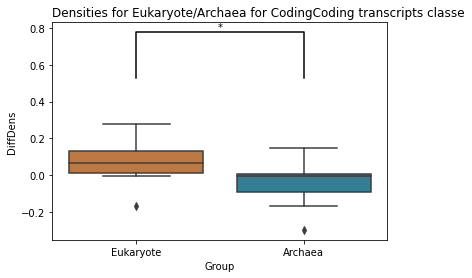

	mannwhitneyu test
Means are significatly different
MannwhitneyuResult(statistic=70.0, pvalue=2.21623004811754e-06)


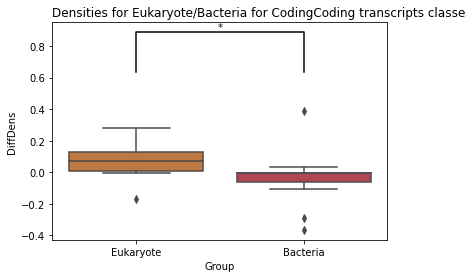

	mannwhitneyu test
Means are not differents
MannwhitneyuResult(statistic=128.0, pvalue=0.3014809295070769)


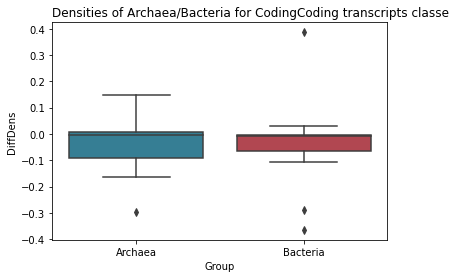

In [35]:
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfClassCoding[dfClassCoding.Biotype == 'protein_coding'])
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)
dfTmp['ShortName'] = dfTmp.Sp.apply(applyShortName)
dfTmp['DiffDens'] = dfTmp['DensityWt'] - dfTmp['DensityShuf']
spList = [ ['Eukaryote', 'Archaea'], ['Eukaryote', 'Bacteria'], ['Archaea', 'Bacteria'] ]

for duoSp in spList:
    a = dfTmp[dfTmp.Group == duoSp[0] ]['DiffDens']
    b = dfTmp[dfTmp.Group == duoSp[1] ]['DiffDens']

    res = AllTest(a,b,0.05, name2, '/'.join(duoSp))

    dfTmp2 = pd.DataFrame()
    dfTmp2 = dfTmp2.append(dfTmp[dfTmp.Group == duoSp[0] ])
    dfTmp2 = dfTmp2.append(dfTmp[dfTmp.Group == duoSp[1] ])

    if res != []:
        print(res)
        makeBoxPlotSpvsSp(res[1], dfTmp2, 0.05, None, duoSp, name2, 'Coding')

### Correlation

Correlation between pG4 Densities and GC content for Archaea


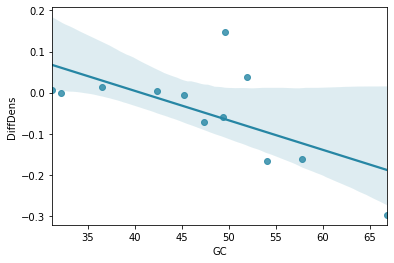

LinregressResult(slope=-0.007163389160424734, intercept=0.2909192530622013, rvalue=-0.6465312785474059, pvalue=0.023094126842000115, stderr=0.0026729417349900283)
Correlation between pG4 Densities and GC content for Bacteria


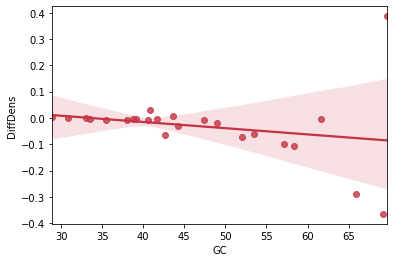

LinregressResult(slope=-0.0023622468994144415, intercept=0.07922250056354112, rvalue=-0.22057664384138712, pvalue=0.3003229208765006, stderr=0.00222701764611345)
Correlation between pG4 Densities and GC content for Eukaryote


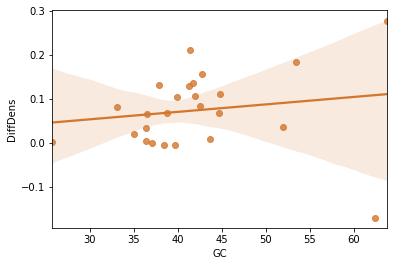

LinregressResult(slope=0.0016937215031423538, intercept=0.0033500877186222883, rvalue=0.16029072951677173, pvalue=0.44403849265778206, stderr=0.0021747911793673124)


In [36]:
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfClassCoding[dfClassCoding.Biotype == 'protein_coding'])
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)
dfTmp['ShortName'] = dfTmp.Sp.apply(applyShortName)
dfTmp['DiffDens'] = dfTmp['DensityWt'] - dfTmp['DensityShuf']

my_pl = {'Eukaryote':"#D3772E", 'Eukaryotes':"#D3772E", 'Archaea':"#2686a4", 'Bacteria':"#c33543"} #test1

groupsSp = dfTmp.groupby('Group')
for name1, group1 in groupsSp:
    print("Correlation between pG4 Densities and GC content for "+name1)
    sns.regplot(x="GC", y="DiffDens", data=group1, scatter_kws={"color": my_pl[name1]}, line_kws={"color": my_pl[name1]})
    plt.savefig("FiguresArticle/"+name1+"CorrelationCoding.svg")
    plt.show()
    GC = np.array(group1["GC"])
    DensityGenes = np.array(group1["DiffDens"])
    corr1 = scipy.stats.linregress(GC, DensityGenes)
    print (corr1)

## Coding location

In [37]:
dfLocCoding.head()

Biotype  DensityShuf  DensityWt         GC       LocID Location  NbLocation  \
0  Coding     0.107492   0.033294  42.736850  CDS-Coding      CDS      1353.0   
1  Coding     0.051354   0.039921  45.815835  CDS-Coding      CDS     99019.0   
2  Coding     0.064674   0.065693  39.732646  CDS-Coding      CDS     75318.0   
3  Coding     0.050443   0.053169  43.687637  CDS-Coding      CDS      1553.0   
4  Coding     0.049614   0.025266  43.858886  CDS-Coding      CDS    285738.0   

   NbRepro  NbTrpG4Shuf  NbTrpG4Wt  ...   nbTr       nuclA     nuclC  \
0        3           92         34  ...   1352    298396.0    181617   
1        3          643        551  ...   9367   4680052.0   3524815   
2        3          730        747  ...  13285   5922301.0   3256750   
3        3           71         75  ...   1553    477576.0    283899   
4        3         2563       1346  ...  48113  17949965.0  12550226   

      nuclG  nuclN       nuclT   Class  meanShuffle stdShuffle  ShortName  
0    267652    NaN    303580.0  Coding     0.115183   0.010465       Apha  
1   3728393    NaN   3897652.0  Coding     0.056445   0.003700       Acar  
2   3765278    NaN   4716701.0  Coding     0.069603   0.003535       Amel  
3    357003    NaN    348532.0  Coding     0.047370   0.005702       Aaeo  
4  14685746    NaN  16913160.0  Coding     0.050812   0.001784       Atha  

[5 rows x 30 columns]

### Dotplot

CDS Coding


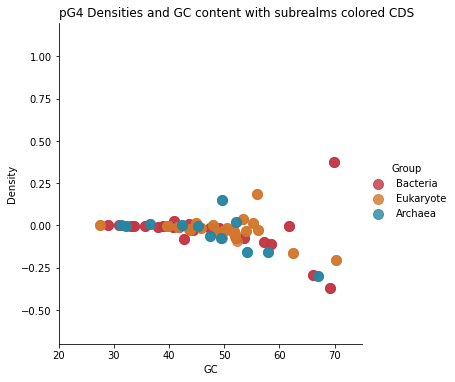

acceptor Coding


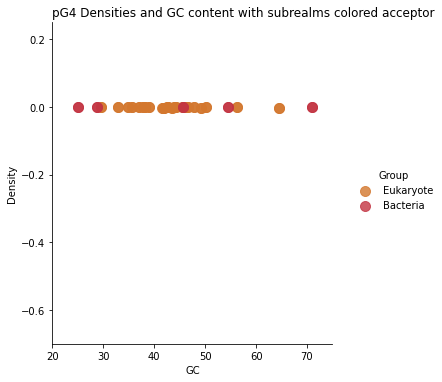

donor Coding


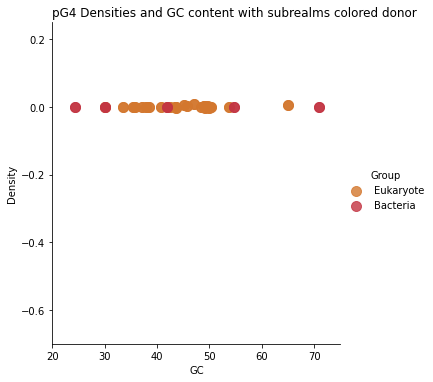

exon Coding


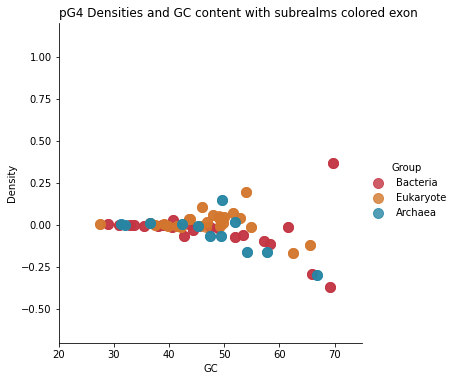

five_prime_utr Coding


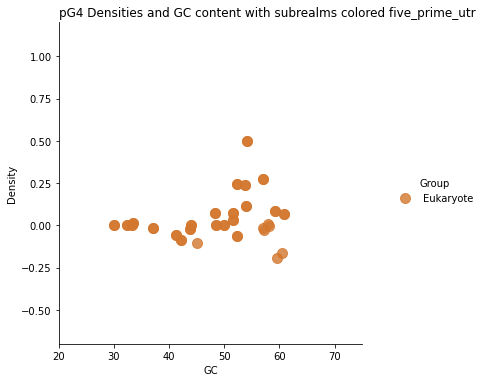

intron Coding


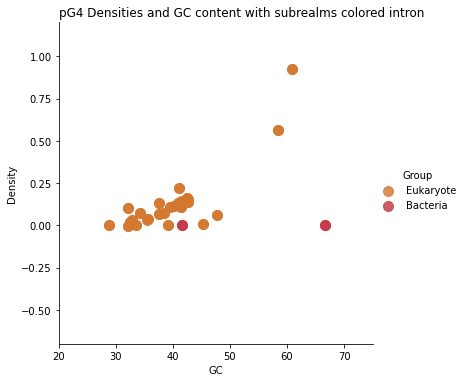

junction Coding


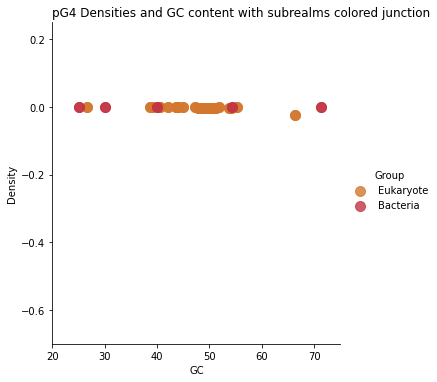

start_codon Coding


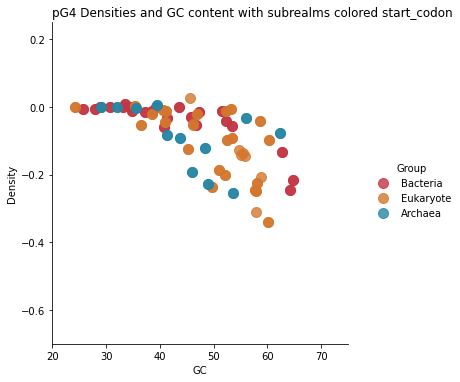

stop_codon Coding


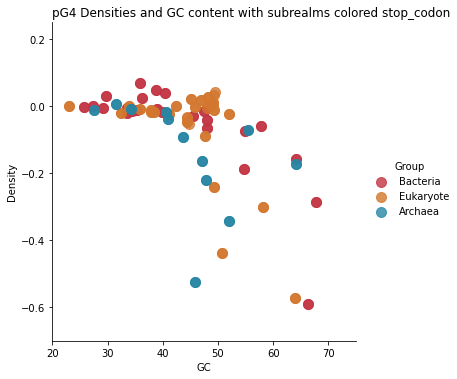

three_prime_utr Coding


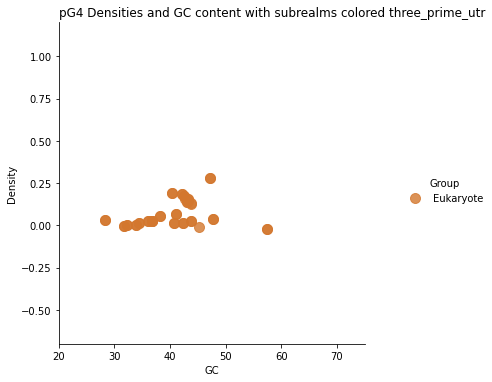

In [66]:
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfLocCoding)
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)
dfTmp['Density'] = dfTmp['DensityWt'] - dfTmp['meanShuffle']

groupsCl = dfTmp.groupby('Class')
for cl, group3 in groupsCl:
    groupsBt = group3.groupby('Location')
    for loc, group2 in groupsBt:
        if loc in ['acceptor', 'donor', 'junction', 'start_codon', 'stop_codon']:
            x = -0.7
            y = 0.25
        else:
            x = -0.7
            y = +1.2
        group2 = group2.drop_duplicates(subset=None, keep='first', inplace=False)
        
        print(loc, cl)
        my_pl = {'Eukaryote':"#D3772E", 'Archaea':"#2686a4", 'Bacteria':"#c33543"} #test1
        sns.lmplot( x="GC", y="Density", data=group2, fit_reg=False, hue='Group', legend=True, palette=my_pl, scatter_kws={"s": 100})
        plt.ylim([x, y])
        plt.xlim([20, +75])
        plt.title("pG4 Densities and GC content with subrealms colored "+loc, loc='left')
        plt.savefig("FiguresArticle/dotPlot"+loc+"_"+cl+"MeanShuff.svg")
        plt.show()

### double lolipopplot

Archaea


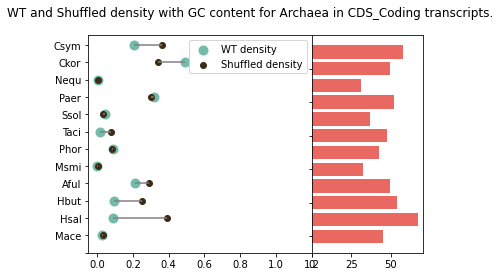

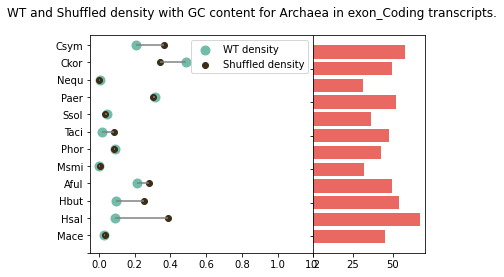

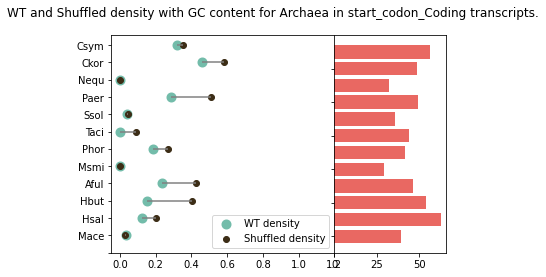

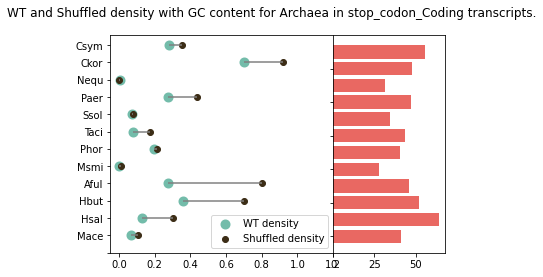

Bacteria


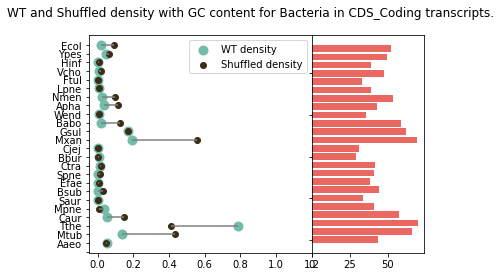

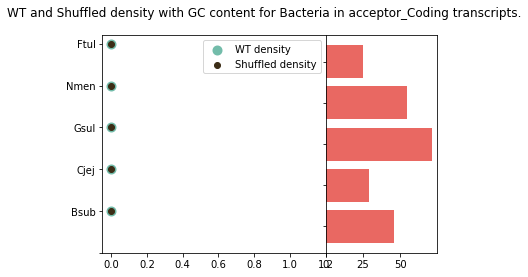

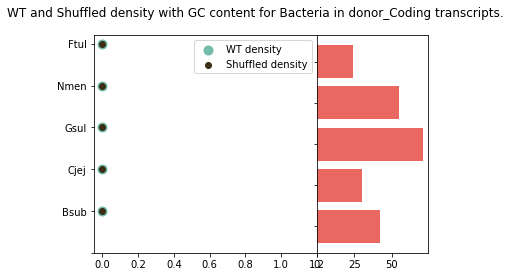

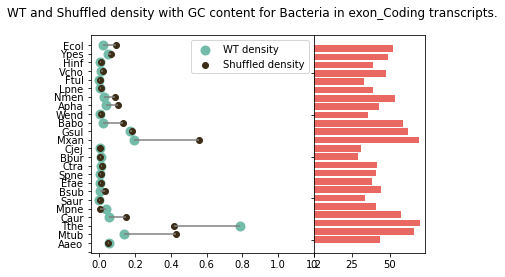

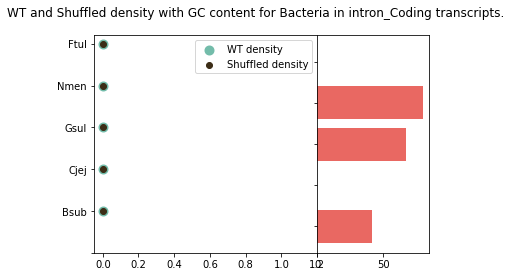

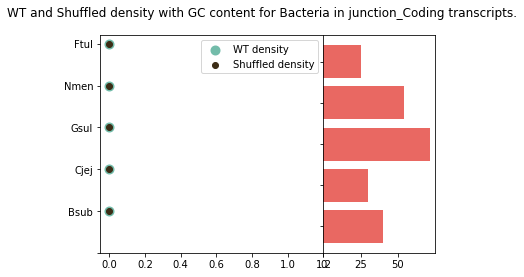

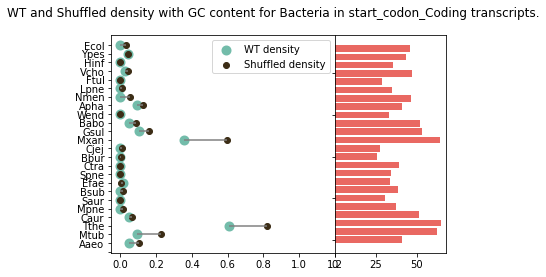

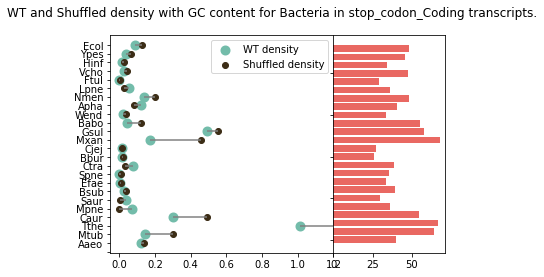

Eukaryote


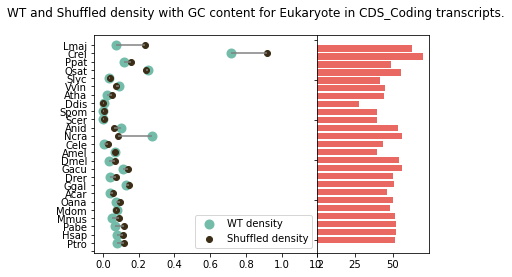

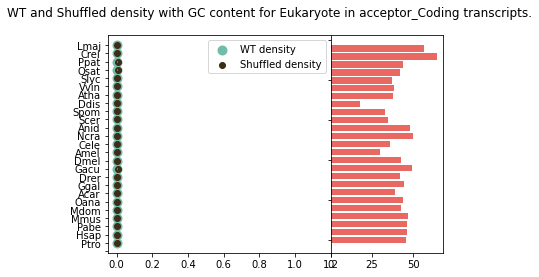

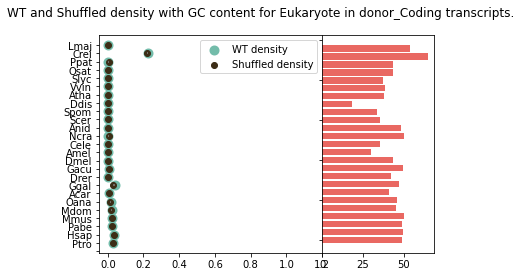

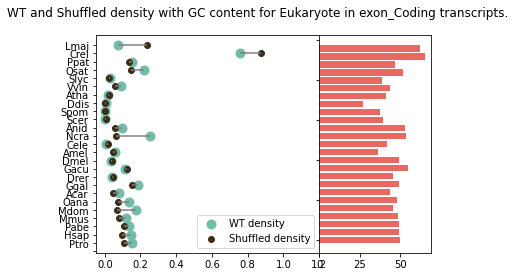

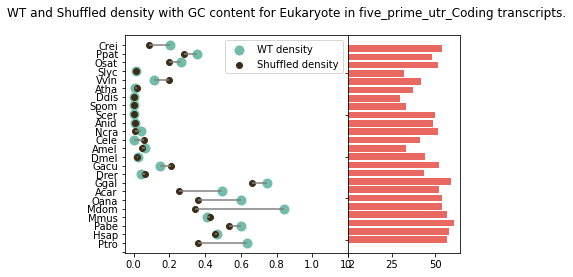

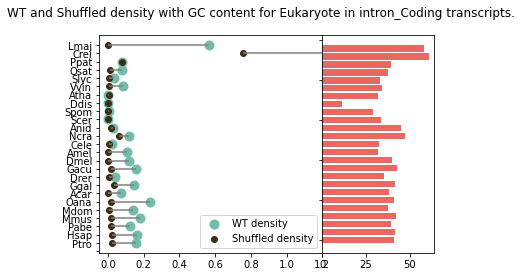

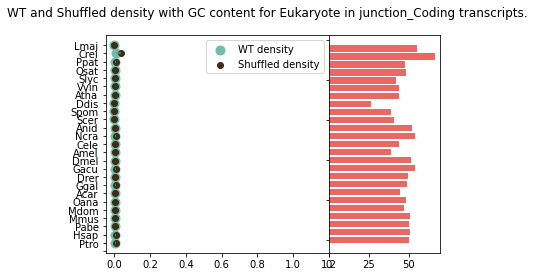

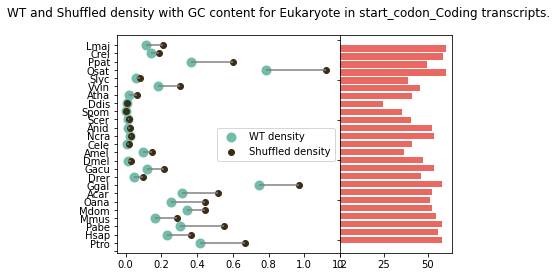

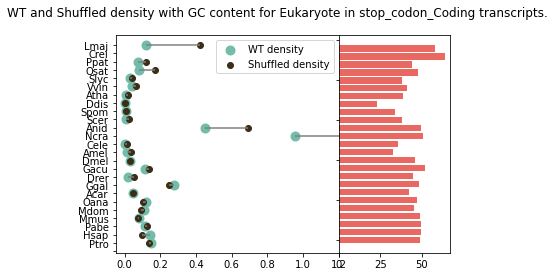

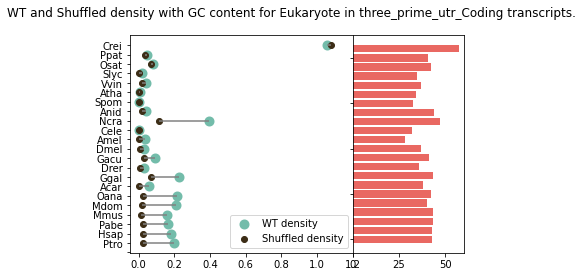

In [39]:
dicoOrder = {'Archaea' : ['Mace', 'Hsal', 'Hbut', 'Aful', 'Msmi', 'Phor', 'Taci', 'Ssol', 'Paer', 'Nequ', 'Ckor', 'Csym'],
            'Bacteria' : ['Aaeo', 'Mtub', 'Tthe', 'Caur', 'Mpne', 'Saur', 'Bsub', 'Efae', 'Spne', 'Ctra', 'Bbur', 'Cjej', 'Mxan', 'Gsul', 'Babo', 'Wend', 'Apha', 'Nmen', 'Lpne', 'Ftul', 'Vcho', 'Hinf', 'Ypes', 'Ecol'],
            'Eukaryote' : ['Ptro', 'Hsap', 'Pabe', 'Mmus', 'Mdom', 'Oana', 'Acar', 'Ggal', 'Drer', 'Gacu', 'Dmel', 'Amel', 'Cele', 'Ncra', 'Anid', 'Scer', 'Spom', 'Ddis', 'Atha', 'Vvin', 'Slyc', 'Osat', 'Ppat', 'Crei', 'Lmaj']}
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfLocCoding[dfLocCoding.Biotype == 'protein_coding'])
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)

groupsSp = dfTmp.groupby('Group')
for name1, group1 in groupsSp:
    print(name1)
    group1 = group1.drop_duplicates(subset=None, keep='first', inplace=False)
    groupsCl = group1.groupby('Class')
    for cl, group3 in groupsCl:
        groupsBt = group3.groupby('Location')
        for loc, group2 in groupsBt:
            group2 = group2.drop_duplicates(subset=None, keep='first', inplace=False)
            group2['ShortName'] = pd.Categorical(
                    group2['ShortName'], categories=dicoOrder[name1], ordered=True)
            group2 = group2.sort_values('ShortName')

            fig, axs = plt.subplots(1, 2, sharex='col',
                        gridspec_kw={'hspace': 0, 'wspace': 0, 'width_ratios' : [2,1]})
            (ax1, ax2)= axs
            fig.suptitle('WT and Shuffled density with GC content for '+name1+' in '+loc+'_'+cl+' transcripts.')    

            my_range=range(1,len(group2.index)+1)
            ax1.hlines(y=my_range, xmin=group2['DensityWt'], xmax=group2['meanShuffle'], color='grey')
            ax1.scatter(group2['DensityWt'], my_range, color='#73BCAA', label='WT density', linewidth=4)
            ax1.scatter(group2['meanShuffle'], my_range, color='#3C2D16', label='Shuffled density')
            ax1.set_xlim([-0.05, +1.20])
            y = np.arange(len(group2['ShortName'])+1)
            yLabels = ['']
            yLabels.extend( list(group2['ShortName']) )
            ax1.set_yticks(y)
            ax1.set_yticklabels(yLabels, fontdict=None, minor=False)
            ax1.legend()
            y_pos = np.arange(len(group2['ShortName']))
            ax2.barh(y_pos, group2['GC'], color='#E64E46', alpha=0.85)
            for ax in axs.flat:
                ax.label_outer()

            plt.savefig("FiguresArticle/"+name1+"_"+loc+"_"+cl+"_transcript.svg")
            plt.show()

### boxplot

	mannwhitneyu test
Means are not differents
Archaea Coding CDS
MannwhitneyuResult(statistic=61.0, pvalue=0.2721850729283049)


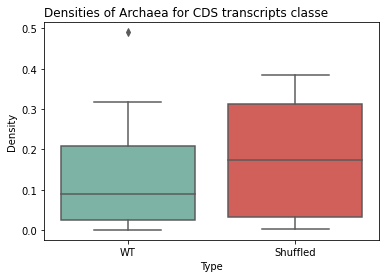

	mannwhitneyu test
Means are not differents
Archaea Coding exon
MannwhitneyuResult(statistic=62.0, pvalue=0.2916802333513516)


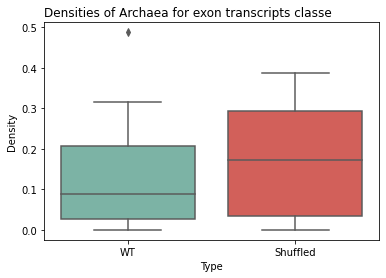

	Fisher test
	t test
Means are not differents
Archaea Coding start_codon
Ttest_indResult(statistic=-1.2032838691489196, pvalue=0.24165570405866957)


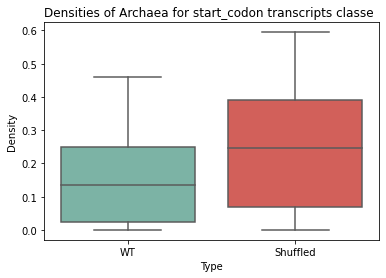

	mannwhitneyu test
Means are not differents
Archaea Coding stop_codon
MannwhitneyuResult(statistic=52.0, pvalue=0.1301181013085944)


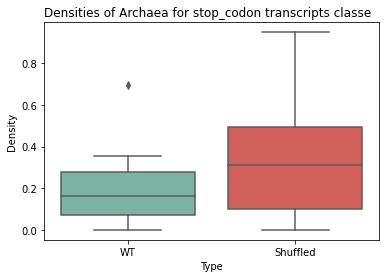

	mannwhitneyu test
Means are not differents
Bacteria Coding CDS
MannwhitneyuResult(statistic=221.0, pvalue=0.08514943698617733)


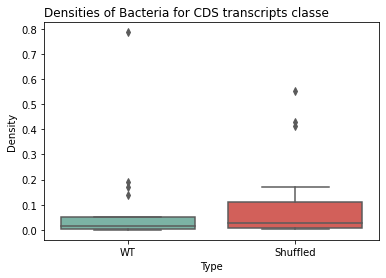

	Fisher test
	welch test
Means are not differents
Bacteria Coding acceptor
Ttest_indResult(statistic=nan, pvalue=nan)


/home/anais/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


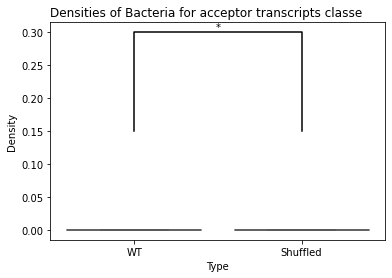

/home/anais/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


	Fisher test
	welch test
Means are not differents
Bacteria Coding donor
Ttest_indResult(statistic=nan, pvalue=nan)


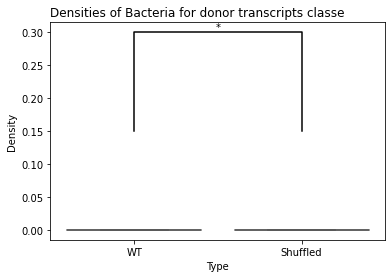

	mannwhitneyu test
Means are not differents
Bacteria Coding exon
MannwhitneyuResult(statistic=223.0, pvalue=0.09175852954176483)


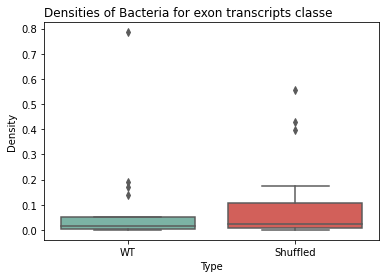

	Fisher test
	welch test
Means are not differents
Bacteria Coding intron
Ttest_indResult(statistic=nan, pvalue=nan)


/home/anais/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


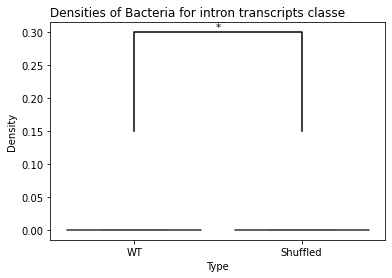

/home/anais/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


	Fisher test
	welch test
Means are not differents
Bacteria Coding junction
Ttest_indResult(statistic=nan, pvalue=nan)


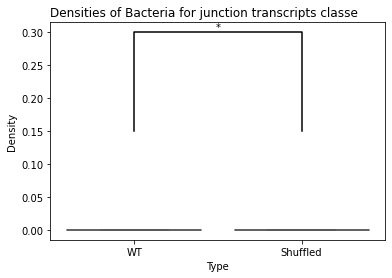

	mannwhitneyu test
Means are not differents
Bacteria Coding start_codon
MannwhitneyuResult(statistic=222.0, pvalue=0.08159595266033953)


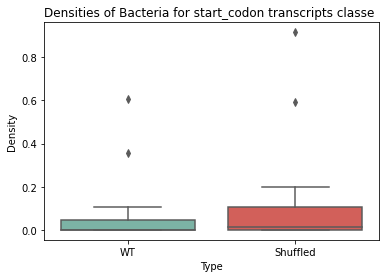

	mannwhitneyu test
Means are not differents
Bacteria Coding stop_codon
MannwhitneyuResult(statistic=281.0, pvalue=0.4466845657259269)


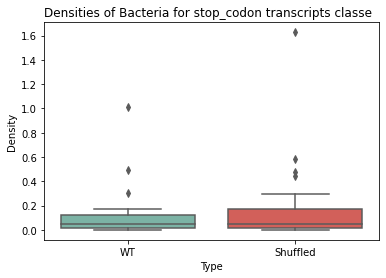

	mannwhitneyu test
Means are not differents
Eukaryote Coding CDS
MannwhitneyuResult(statistic=263.0, pvalue=0.17086827751367428)


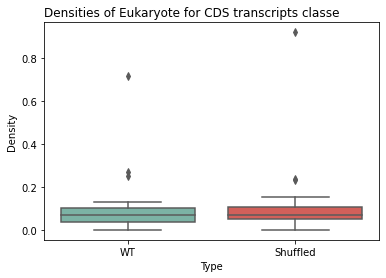

	mannwhitneyu test
Means are not differents
Eukaryote Coding acceptor
MannwhitneyuResult(statistic=235.0, pvalue=0.06749149686372549)


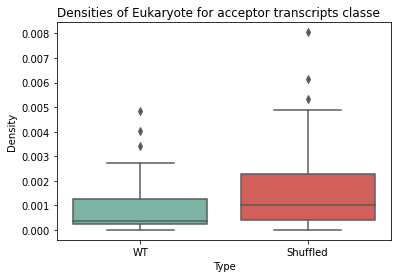

	mannwhitneyu test
Means are not differents
Eukaryote Coding donor
MannwhitneyuResult(statistic=297.0, pvalue=0.3854558319783995)


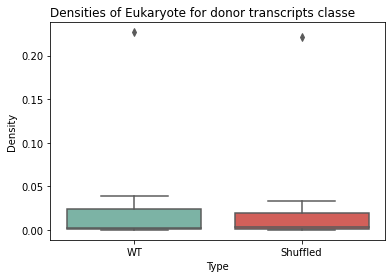

	mannwhitneyu test
Means are not differents
Eukaryote Coding exon
MannwhitneyuResult(statistic=257.0, pvalue=0.14295052948377396)


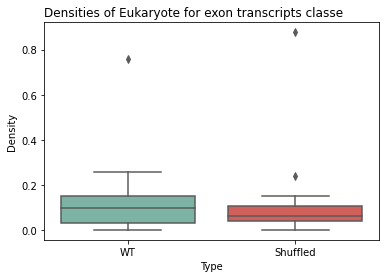

	mannwhitneyu test
Means are not differents
Eukaryote Coding five_prime_utr
MannwhitneyuResult(statistic=265.0, pvalue=0.32129946396400766)


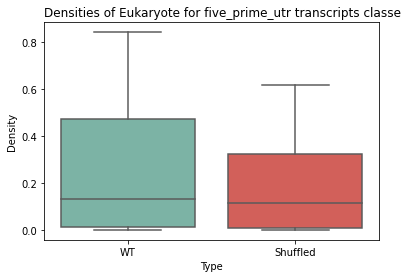

	mannwhitneyu test
Means are significatly different
Eukaryote Coding intron
MannwhitneyuResult(statistic=110.5, pvalue=4.60310293992263e-05)


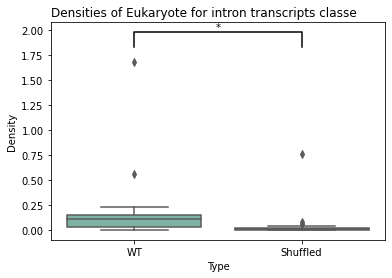

	mannwhitneyu test
Means are significatly different
Eukaryote Coding junction
MannwhitneyuResult(statistic=194.0, pvalue=0.01099222273662501)


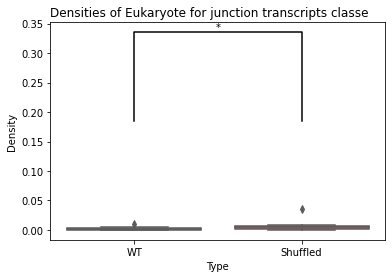

	mannwhitneyu test
Means are not differents
Eukaryote Coding start_codon
MannwhitneyuResult(statistic=245.0, pvalue=0.09680203544711796)


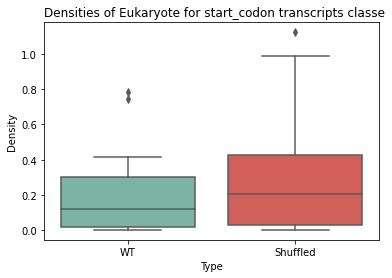

	mannwhitneyu test
Means are not differents
Eukaryote Coding stop_codon
MannwhitneyuResult(statistic=278.0, pvalue=0.25472417818532134)


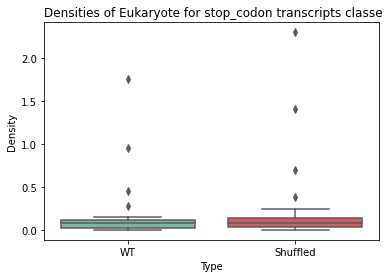

	mannwhitneyu test
Means are significatly different
Eukaryote Coding three_prime_utr
MannwhitneyuResult(statistic=105.0, pvalue=0.0006776306190702523)


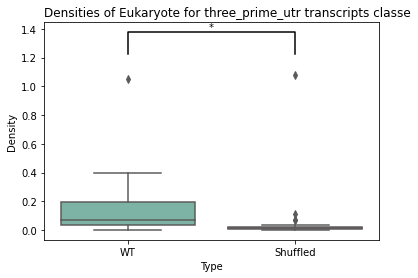

[['Archaea', 'Coding', 'CDS', 0.2721850729283049], ['Archaea', 'Coding', 'exon', 0.2916802333513516], ['Archaea', 'Coding', 'start_codon', 0.24165570405866957], ['Archaea', 'Coding', 'stop_codon', 0.1301181013085944], ['Bacteria', 'Coding', 'CDS', 0.08514943698617733], ['Bacteria', 'Coding', 'acceptor', nan], ['Bacteria', 'Coding', 'donor', nan], ['Bacteria', 'Coding', 'exon', 0.09175852954176483], ['Bacteria', 'Coding', 'intron', nan], ['Bacteria', 'Coding', 'junction', nan], ['Bacteria', 'Coding', 'start_codon', 0.08159595266033953], ['Bacteria', 'Coding', 'stop_codon', 0.4466845657259269], ['Eukaryote', 'Coding', 'CDS', 0.17086827751367428], ['Eukaryote', 'Coding', 'acceptor', 0.06749149686372549], ['Eukaryote', 'Coding', 'donor', 0.3854558319783995], ['Eukaryote', 'Coding', 'exon', 0.14295052948377396], ['Eukaryote', 'Coding', 'five_prime_utr', 0.32129946396400766], ['Eukaryote', 'Coding', 'intron', 4.60310293992263e-05], ['Eukaryote', 'Coding', 'junction', 0.01099222273662501], ['

In [40]:
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfLocCoding[dfLocCoding.Biotype == 'protein_coding'])
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)
dfTmp['ShortName'] = dfTmp.Sp.apply(applyShortName)

resultat = []
groupsSp = dfTmp.groupby('Group')
for realm, group3 in groupsSp:
    groupsCl = group3.groupby('Class')
    for cl, group1 in groupsCl:
        groupsBt = group1.groupby('Location')
        for bt, group2 in groupsBt:
            if name2 != 'None':
                group2 = group2.drop_duplicates(subset=None, keep='first', inplace=False)

                a = group2['DensityWt']
                b = group2['meanShuffle']

                res = AllTest(a,b,0.05, realm, bt)

                if res != []:
                    print(realm, cl, bt)
                    print(res)
                    resultat.append([realm, cl, bt, res[1]])
                    makeBoxPlotWTvsShuf(res[1], group2, 0.05, a, b, realm, bt, cl)
print(resultat)

In [41]:
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfLocCoding[dfLocCoding.Biotype == 'protein_coding'])
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)
dfTmp['ShortName'] = dfTmp.Sp.apply(applyShortName)

dfTmp = dfTmp[dfTmp.Location == 'three_prime_utr']
dfTmp = dfTmp[dfTmp.Group == 'Eukaryote']

a = dfTmp['DensityWt']
b = dfTmp['meanShuffle']

shapA = scipy.stats.shapiro(a)
shapB = scipy.stats.shapiro(b)

if shapA[1] > 0.05 and shapB[1] > 0.05:
    print("\tFisher test")
    f = f_test(a, b)
    if f[1] > 0.05:
        print("\tt test")
        tTest =scipy.stats.ttest_ind(a,b)
        if tTest[1] <= 0.05:
            print("Means are significatly different")
        else:
            print("Means are not differents")
        print(tTest)
    else:
        print("\twelch test")
        welch = scipy.stats.ttes
        t_ind(a,b, equal_var=False)
        if welch[1] <= 0.05:
            print("Means are significatly different")
        else:
            print("Means are not differents")
        print(welch)
else:
    print("\tmannwhitneyu test")
    man = scipy.stats.mannwhitneyu(a,b,alternative='less')
    if man[1] <= 0.05:
        print("Means are significatly different")
    else:
        print("Means are not differents")
    print(man)


	mannwhitneyu test
Means are not differents
MannwhitneyuResult(statistic=379.0, pvalue=0.9993755845059558)


	mannwhitneyu test
Means are significatly different
MannwhitneyuResult(statistic=3380.0, pvalue=1.4039587262105254e-06)


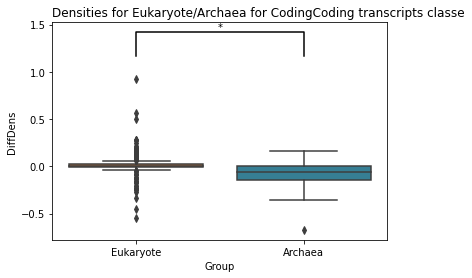

	mannwhitneyu test
Means are significatly different
MannwhitneyuResult(statistic=10014.0, pvalue=2.282944325881327e-06)


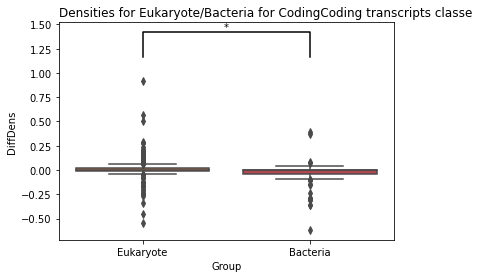

	mannwhitneyu test
Means are significatly different
MannwhitneyuResult(statistic=2210.0, pvalue=0.018503475094696308)


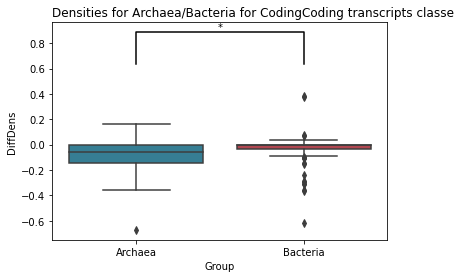

In [42]:
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfLocCoding[dfLocCoding.Biotype == 'protein_coding'])
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)
dfTmp['ShortName'] = dfTmp.Sp.apply(applyShortName)
dfTmp['DiffDens'] = dfTmp['DensityWt'] - dfTmp['DensityShuf']
spList = [ ['Eukaryote', 'Archaea'], ['Eukaryote', 'Bacteria'], ['Archaea', 'Bacteria'] ]

for duoSp in spList:
    a = dfTmp[dfTmp.Group == duoSp[0] ]['DiffDens']
    b = dfTmp[dfTmp.Group == duoSp[1] ]['DiffDens']

    res = AllTest(a,b,0.05, name2, '/'.join(duoSp))

    dfTmp2 = pd.DataFrame()
    dfTmp2 = dfTmp2.append(dfTmp[dfTmp.Group == duoSp[0] ])
    dfTmp2 = dfTmp2.append(dfTmp[dfTmp.Group == duoSp[1] ])

    if res != []:
        print(res)
        makeBoxPlotSpvsSp(res[1], dfTmp2, 0.05, None, duoSp, name2, 'Coding')

### heatmap pvalue

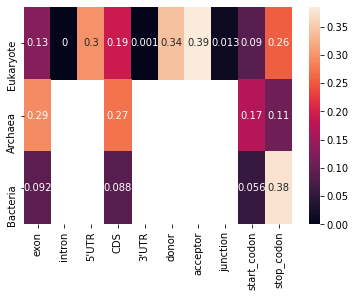

In [67]:
d = {"exon" : [0.13021713446589334, 0.2916802333513516, 0.09175852954176483],
    "intron": [4.2469253030691996e-05, np.nan, np.nan],
    "5'UTR": [0.2994635961660739, np.nan, np.nan],
    "CDS": [0.1912965886847412, 0.2721850729283049, 0.08840797181160326],
    "3'UTR": [0.0006244154940442126, np.nan, np.nan],
    "donor": [0.34176325091532833, np.nan, np.nan],
    "acceptor": [0.3854558319783995, np.nan, np.nan],
    "junction": [0.01344924287156701, np.nan, np.nan],
    "start_codon": [0.09031844080503154, 0.1708440167749318, 0.05636788831356144],
    "stop_codon": [0.25472417818532134, 0.10724690389175873, 0.37462088442188013]}
df = pd.DataFrame(data=d)
df.index = ['Eukaryote', 'Archaea', 'Bacteria']
mask = df.isnull()
sns.heatmap(df.round(3), mask=mask, annot=True)
plt.savefig("FiguresArticle/pvalueHeatmap_transcript.svg")
plt.show()

### heatmap densities

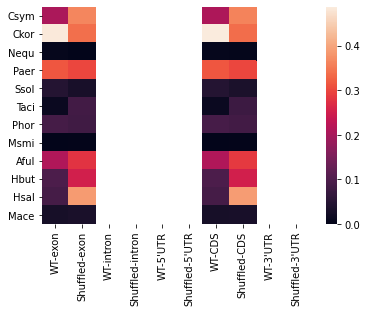

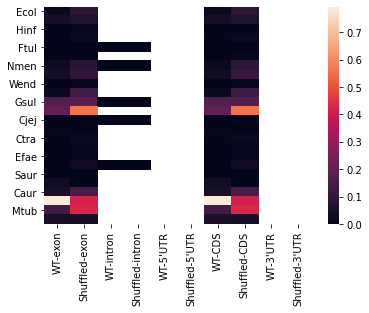

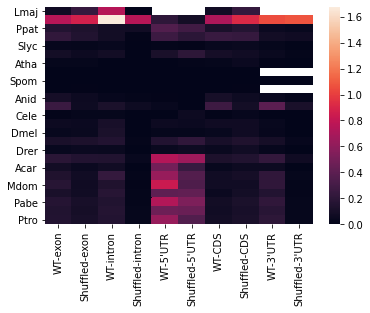

In [44]:
d = {"Group": ['Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Archaea', 'Archaea', 'Archaea', 'Archaea', 'Archaea', 'Archaea', 'Archaea', 'Archaea', 'Archaea', 'Archaea', 'Archaea', 'Archaea', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria'],
     "WT-exon": [0.07246783452494886, 0.7579001583746428, 0.15371315468305638, 0.21710083092638194, 0.031668111850413044, 0.0884903930085821, 0.020101508796078468, 0.00510508531861911, 0.002648011300955658, 0.002289559175145095, 0.09658845533378048, 0.2560567722848759, 0.007522595168824994, 0.058394107376938675, 0.03362049045720514, 0.11154556480826873, 0.0387570850757166, 0.18916847973194453, 0.08019032038346906, 0.1380025074449463, 0.17510856065973632, 0.11843763982890675, 0.16533999168866698, 0.1493214276392275, 0.15504501499505385, 0.2065355112663516, 0.4853856262908355, 0.0065742329513703976, 0.3148832982759886, 0.04696531078998417, 0.015398761939540059, 0.08937850394404555, 0.0005975461171154536, 0.21194306698152487, 0.09821296706542608, 0.08912285802296081, 0.02955710785107158, 0.01798173966999709, 0.04782426587823479, 0.0051010095535532676, 0.00694750206905296, 0.0, 0.005986227895065836, 0.02494480237335292, 0.03785534337635593, 0.005900140128328048, 0.019809122287692, 0.16993539858217904, 0.1957586502722085, 0.0026150148925098127, 0.006952966657048396, 0.008517796871839099, 0.0022112030603050354, 0.0017295729649758015, 0.005137665088051468, 0.0, 0.03605882581368127, 0.05223623067141284, 0.7903434759087083, 0.13681636512439113, 0.05158760865640073],
     "Shuffled-exon": [0.23812459878651185, 0.8740085623813885, 0.13569183028592974, 0.14604798277756575, 0.022937532496081537, 0.05458708451350154, 0.024925510351160314, 0.0022836995344574763, 0.001533417507194156, 0.006518452341510323, 0.05578871457564845, 0.06022662446509384, 0.020813527544427207, 0.0488845855482391, 0.04015152329120753, 0.12567511239935603, 0.04684410629755616, 0.15096035879068942, 0.04722612872830183, 0.07682251233589961, 0.06635675665297536, 0.07767848139628664, 0.1050561864926571, 0.0981786595230934, 0.10932187179629341, 0.3653235812929342, 0.3407430209885739, 0.00043879664408326614, 0.3003591975969667, 0.032002010430802946, 0.08455547029038094, 0.08298369274796631, 0.00287110862216784, 0.27993937683204984, 0.2533334803714582, 0.3882236422514306, 0.033952686995972384, 0.09179347381724885, 0.0666559566459217, 0.007467460517171084, 0.02178869851748397, 0.003205262868650677, 0.008861306554451656, 0.0847228561288039, 0.10213821004775707, 0.010434455875586357, 0.13083908470869937, 0.17973308139673266, 0.5586581617592039, 0.0023558860033989046, 0.0020879167518533664, 0.01598466549720926, 0.011399794055904602, 0.008622073600093535, 0.03353719714199947, 0.0032501377520830895, 0.005830053124285986, 0.14924368699055618, 0.4156475623037063, 0.43154561975136774, 0.045861492754978125],
     "WT-intron": [0.7506098705197973, 1.67949380141781, 0.07960596098496357, 0.07960134678598678, 0.03702774939094442, 0.08222191860752658, 0.0021505619406403326, 0.00043313969101547, 0.004528708616094578, 0.0, 0.026569685759860386, 0.12043129648609932, 0.022301273912519244, 0.10622486449712876, 0.12001560867718772, 0.15684445982353798, 0.040804131078173066, 0.1471819622267162, 0.07351991767071189, 0.2331296493331048, 0.14067471120751388, 0.17691868197484067, 0.14873162707455145, 0.16236263575983828, 0.1543166793141193, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0.0, np.nan, 0.0, np.nan, np.nan, np.nan, 0.0, np.nan, 0.0, np.nan, np.nan, np.nan, np.nan, 0.0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
     "Shuffled-intron": [0.0, 0.7549261411423939, 0.0782268467531827, 0.012726755881156668, 0.0025727089715849765, 0.006083868836826491, 0.0029651146999261882, 0.0003050895053051037, 0.0, 0.0, 0.018084558249777217, 0.06055714725098811, 0.0025036633146317796, 0.0020857782124406887, 0.0023232980525272466, 0.016519421246290363, 0.002810796712975052, 0.03589357820487284, 0.0023303606990537134, 0.013791149277936987, 0.006611627135973515, 0.013815990361506833, 0.015327371156098706, 0.020379178415565948, 0.02026032777367035, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0.0, np.nan, 0.0, np.nan, np.nan, np.nan, 0.0, np.nan, 0.0, np.nan, np.nan, np.nan, np.nan, 0.0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
     "WT-5'UTR": [np.nan, 0.20389507999138576, 0.35694634885572285, 0.2656154664738596, 0.01920229973420677, 0.1122423664351969, 0.0054774722138405145, 0.0, 0.004372441666162621, 0.0, 0.0111255000912291, 0.03856666074424612, 0.0021088539812632533, 0.05927384387011812, 0.02529804452311276, 0.15125812929518356, 0.041148312233393235, 0.7471085518542003, 0.4958756152005226, 0.6320561440216207, 0.8383772597083533, 0.4125721585807722, 0.7378639821535298, 0.46799656532974293, 0.6346091213179741, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
     "Shuffled-5'UTR": [np.nan, 0.08719021552408823, 0.28294703012575395, 0.19534340121503865, 0.010437806293196, 0.19835584910233128, 0.01849750824448911, 0.0, 0.0009504763013443336, 0.0, 0.0051508806152947145, 0.0045841767851554265, 0.05676722595189313, 0.04923660286123878, 0.021147318381362384, 0.20980397445948232, 0.06444796605512548, 0.6620338915971602, 0.25102634126548407, 0.36240382426842743, 0.34579861217854974, 0.4262121082692662, 0.5322398417794602, 0.45530621302565794, 0.3581791576845485, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
     "WT-CDS": [0.07277420693479565, 0.7155200174673546, 0.11734481302396968, 0.2525499977090858, 0.0373804731578604, 0.09293086563585064, 0.025647214264506103, 0.0050668472503773475, 0.001397888768592794, 0.002294740615141938, 0.10099948168902352, 0.2719840173851805, 0.008278704710926704, 0.06563944965857063, 0.036019270458330435, 0.11037533313400136, 0.04204626554887735, 0.1314197446781994, 0.03948472000970734, 0.0730494889174847, 0.07628634990166587, 0.051737068398718264, 0.08466195265733269, 0.0759455285567109, 0.08054083102724358, 0.20881679252038648, 0.4884261939599365, 0.00659743755525354, 0.3156257623810685, 0.045944124023786385, 0.01544899184293231, 0.08970203095951272, 0.0005994750996027879, 0.21271267495994664, 0.09856276224734954, 0.08943708903983208, 0.029651844980154444, 0.01854660660614884, 0.047972875207850214, 0.005117740006013345, 0.006968950711224975, 0.0, 0.00600419535249999, 0.02444590731858081, 0.03705118193270365, 0.005921013677541596, 0.01950282791004696, 0.16928420560999174, 0.195435560519379, 0.002623370558961565, 0.0069773263060028574, 0.008542162512506259, 0.002773778913177946, 0.0017354530851496589, 0.005426490989447375, 0.0, 0.03755320036718685, 0.05190531617092349, 0.7929932950119822, 0.13697804515892192, 0.053113145299180216],
     "Shuffled-CDS": [0.23479302283279865, 0.9213676178664553, 0.15785811595511823, 0.24145896048689738, 0.04071554213460234, 0.07557002342007202, 0.050812144574875776, 0.00261825520116829, 0.005011021546877913, 0.007623965937627689, 0.06421568760123184, 0.08671523577997209, 0.027954293842909206, 0.06960344241007796, 0.06811316264710901, 0.1400788958063351, 0.07427562999959453, 0.14587426111231971, 0.0564450832933329, 0.09555591902863213, 0.07401795628928681, 0.09054865227515765, 0.12026968045868028, 0.11113605455021122, 0.1156448030614452, 0.3618912613839607, 0.33936618670235424, 0.004182780862054314, 0.29951410900297637, 0.03473277683515723, 0.07783671959559088, 0.0847506838455572, 0.0028203743329859817, 0.2871468989492453, 0.252827882769828, 0.39020294959826585, 0.031235291147167922, 0.0931773154688241, 0.06479818919749196, 0.006019575877897718, 0.021652706245466936, 0.0034164428808234745, 0.009773420940744265, 0.09578417939125307, 0.11518292603689444, 0.00948352538874056, 0.12652557563590305, 0.17044974009559472, 0.5591489251499278, 0.002100733095574149, 0.0021827616084167728, 0.019877259994363523, 0.012272745406767418, 0.007643790557284323, 0.03248347347157702, 0.00266814158020658, 0.008352615977246175, 0.14785080998283232, 0.4131915468092572, 0.43052379560771115, 0.04736993921450549],
     "WT-3'UTR": [np.nan, 1.0517742806305703, 0.05026840944206247, 0.07941675557538411, 0.020774036888168517, 0.04364997276621264, 0.006671278594018292, np.nan, 0.005387149982173431, np.nan, 0.04466996342026329, 0.3958894569738116, 0.002253291842719536, 0.035074342356080826, 0.030704847444953564, 0.0940742371417276, 0.03095561705801385, 0.2285400555742705, 0.05827512758090433, 0.21400035699598724, 0.2115791018174923, 0.1564832710924647, 0.21014377868741066, 0.1804146386032234, 0.1968285021896012, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
     "Shuffled-3'UTR": [np.nan, 1.0769718594790787, 0.03708782157015876, 0.0678693963466995, 0.004022444545311784, 0.017132542985356193, 0.004783245211938946, np.nan, 0.0007852037148828997, np.nan, 0.017786559110915028, 0.11714451248248976, 0.0030647218068757314, 0.00264627133698049, 0.005354482580901659, 0.028767775240009442, 0.006382976534226367, 0.06923381208015064, 0.0038793336243023654, 0.025660822614988237, 0.017123027631541794, 0.014401722514108909, 0.02596846687854054, 0.0250508323745191, 0.023450389661730447, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]}
df = pd.DataFrame(data=d)
df.index = ['Lmaj', 'Crei', 'Ppat', 'Osat', 'Slyc', 'Vvin', 'Atha', 'Ddis', 'Spom', 'Scer', 'Anid', 'Ncra', 'Cele', 'Amel', 'Dmel', 'Gacu', 'Drer', 'Ggal', 'Acar', 'Oana', 'Mdom', 'Mmus', 'Pabe', 'Hsap', 'Ptro', 'Csym', 'Ckor', 'Nequ', 'Paer', 'Ssol', 'Taci', 'Phor', 'Msmi', 'Aful', 'Hbut', 'Hsal', 'Mace', 'Ecol', 'Ypes', 'Hinf', 'Vcho', 'Ftul', 'Lpne', 'Nmen', 'Apha', 'Wend', 'Babo', 'Gsul', 'Mxan', 'Cjej', 'Bbur', 'Ctra', 'Spne', 'Efae', 'Bsub', 'Saur', 'Mpne', 'Caur', 'Tthe', 'Mtub', 'Aaeo']

groupsSp = df.groupby('Group')
for realm, group in groupsSp:
    del group['Group']
    mask = group.isnull()
    sns.heatmap(group.round(3), mask=mask)#annot=True
    plt.show()

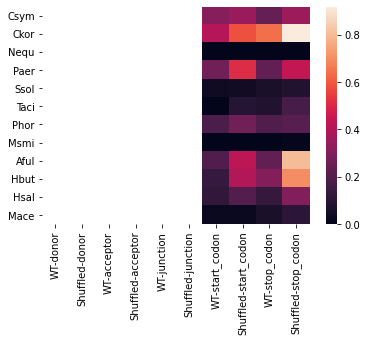

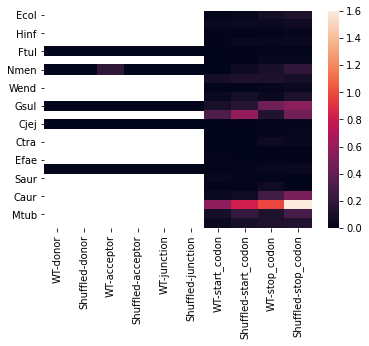

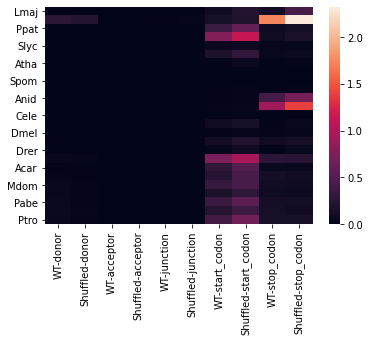

In [45]:
d = {"Group": ['Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Archaea', 'Archaea', 'Archaea', 'Archaea', 'Archaea', 'Archaea', 'Archaea', 'Archaea', 'Archaea', 'Archaea', 'Archaea', 'Archaea', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria'],
     "WT-donor": [0.0, 0.2804799380725068, 0.0036711305485945954, 0.0017540805805872823, 0.0008400489791269188, 0.0007780659503519822, 0.0002095842082180297, 0.00011987532965715657, 0.0, 0.0, 0.003515944399018807, 0.004033839430780436, 0.000880891581051923, 0.0010782501540357364, 0.0022235899064901032, 0.01112565445026178, 0.0009530072387450102, 0.05196302560985279, 0.009848566212007305, 0.02748025170705583, 0.03902114505611727, 0.0413204209669004, 0.04911567071937434, 0.05718752142203571, 0.049126778571538035, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0.0, np.nan, 0.0, np.nan, np.nan, np.nan, 0.0, np.nan, 0.0, np.nan, np.nan, np.nan, np.nan, 0.0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
     "Shuffled-donor": [0.0, 0.22079663744576256, 0.004713212877687507, 0.0020921762650134568, 0.0007546202693851981, 0.0008734716561689514, 0.0003788040504088833, 7.192519779429394e-05, 3.777861730260672e-05, 0.0, 0.003736713000817661, 0.00513194016471511, 0.0007670685115901578, 0.00109211337030191, 0.0016796045186523456, 0.008368446532310118, 0.0013699157962876387, 0.031086965139942392, 0.006759746536354849, 0.014248895434462444, 0.018932481490190233, 0.023918207539566392, 0.025732633660696225, 0.032535564304853076, 0.026923287437302545, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0.0, np.nan, 0.0, np.nan, np.nan, np.nan, 0.0, np.nan, 0.0, np.nan, np.nan, np.nan, np.nan, 0.0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
     "WT-acceptor": [0.0, 0.003626017695509578, 0.00539696094236325, 0.007732683475489738, 0.0009183586297234957, 0.0019544275657650983, 0.0006520397589005367, 5.993766482857828e-05, 0.0, 0.0, 0.0003679476696647588, 0.0014006386912432068, 7.423243660549914e-05, 0.0007393715341959334, 3.308913551324558e-05, 0.0038280857778096532, 0.0007783320575195096, 0.0017344134048682509, 0.000429599398560842, 0.0043847904672646935, 0.002179311452281682, 0.0005641736976283495, 0.0013708789356585837, 0.000694446514206349, 0.0015719518255877852, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0.0, np.nan, 0.2, np.nan, np.nan, np.nan, 0.0, np.nan, 0.0, np.nan, np.nan, np.nan, np.nan, 0.0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
     "Shuffled-acceptor": [0.0, 0.004660858700744895, 0.0062824216692470986, 0.007973702181219287, 0.0005972890622775294, 0.0015348277139681362, 0.0007758496893108172, 3.596259889714697e-05, 5.6667925953910076e-05, 0.0, 0.0005968928863450531, 0.0014790744579528264, 6.730407585565253e-05, 0.0006130622304374615, 3.705983177483505e-05, 0.0052252922613497815, 0.0027126028143254198, 0.0022950418902132836, 0.0004134894211148104, 0.003862632213147678, 0.0016551296977065613, 0.0006464667031470712, 0.001425376991707306, 0.00103108914845359, 0.0017201706815659092, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0.0, np.nan, 0.0, np.nan, np.nan, np.nan, 0.0, np.nan, 0.0, np.nan, np.nan, np.nan, np.nan, 0.0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
     "WT-junction": [0.0, 0.010694715113160272, 0.002940894798167627, 0.0029658690732830765, 0.0010678588717715066, 0.0019081141163393848, 0.000566653599996895, 5.993766482857828e-05, 0.0, 0.0, 0.00241210139002453, 0.0050422992884755465, 0.0005493200308806937, 0.0010782501540357364, 0.0004367765887748417, 0.004222548949293552, 0.001402538955134166, 0.0034655231651558, 0.0014498979701428418, 0.0038157718570089694, 0.0027356093756272693, 0.0018940116991808878, 0.002685574308380341, 0.002773315371111621, 0.002898696681167448, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0.0, np.nan, 0.0, np.nan, np.nan, np.nan, 0.0, np.nan, 0.0, np.nan, np.nan, np.nan, np.nan, 0.0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
     "Shuffled-junction": [0.0, 0.0352083602115856, 0.005979553398988045, 0.005282326633905977, 0.0016637241222200074, 0.0024870322341608007, 0.0016421310832786733, 0.0002037880604171661, 0.00024556101246694364, 0.0, 0.003536385936222404, 0.006717463163202421, 0.0012906546311142783, 0.0021934688847812696, 0.002171309072379175, 0.008553127017141218, 0.005000333937846461, 0.007422959008378043, 0.0026463322951347868, 0.005586423885392957, 0.004220982181261362, 0.0052945368473295085, 0.005909948985324854, 0.006276395673568412, 0.00642507941859676, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0.0, np.nan, 0.0, np.nan, np.nan, np.nan, 0.0, np.nan, 0.0, np.nan, np.nan, np.nan, np.nan, 0.0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
     "WT-start_codon": [0.10068662685815773, 0.1368770415626497, 0.3559984698625232, 0.7691437163019668, 0.05998297068832165, 0.17496440379371092, 0.015532233401264537, 0.0071310908429662485, 0.0, 0.010602167789907442, 0.01420921289841301, 0.02380284230992804, 0.00619291501939097, 0.09542858887837054, 0.010084626148790188, 0.11134057261171797, 0.04096785184386058, 0.7205843643063964, 0.3035619246614496, 0.23564782838337464, 0.33499983293971586, 0.1649600657238076, 0.3605635396027792, 0.21968125327338944, 0.4058537819511025, 0.31130737567882305, 0.4064686583630927, 0.0, 0.2678212739365264, 0.03883736465178419, 0.0, 0.18054004039583404, 0.0, 0.19323484797248336, 0.1306506401881369, 0.12027388080858413, 0.02561212990472288, 0.0, 0.034744741962383016, 0.0, 0.00656387636282483, 0.0, 0.0, 0.0, 0.08972150445018663, 0.0, 0.03782663297574556, 0.10164254350300862, 0.32991469801702233, 0.0, 0.0, 0.0, 0.0, 0.01424552156415827, 0.0, 0.03545093590470789, 0.0, 0.04828614368749208, 0.5715651532314214, 0.08740596574851554, 0.04492430255020291],
     "Shuffled-start_codon": [0.2104829961463392, 0.18401463699191462, 0.6017764895039864, 1.1245430668522856, 0.07960203012964118, 0.3046635680971309, 0.06178054900094073, 0.008005400375081063, 0.0007481691883278542, 0.020934836707223126, 0.026563707759014538, 0.03209097286972529, 0.019242983709059327, 0.14665197335416502, 0.030961688704795053, 0.21366770880146752, 0.09776743407960246, 0.9680001231754385, 0.5147070018986881, 0.4420698367384686, 0.44147196067368455, 0.28788878870688, 0.5483771945592281, 0.36692960526634233, 0.6655528110685729, 0.35207381773200225, 0.5827087679713758, 0.0, 0.5099232033124815, 0.04275808908329764, 0.09163560946296888, 0.2684727118564835, 0.001326435866825839, 0.4282912380418685, 0.40339249249622916, 0.19920872877462598, 0.025624326157058463, 0.029878932811187614, 0.04016326719699276, 0.0, 0.04288399223712223, 0.0, 0.010511043066244407, 0.052267425907588184, 0.12462744213390209, 0.0, 0.08651491342024092, 0.1592883860325721, 0.5994583296134847, 0.007339557277904997, 0.00533456621085762, 0.0, 0.0, 0.00579996235112158, 0.013072051081553456, 0.004536875725900115, 0.013842746400885935, 0.062297747882523256, 0.8235004676192835, 0.22922561366618638, 0.10393201740781069],
     "WT-stop_codon": [0.1146708805884574, 1.7430882601444433, 0.07592963030216167, 0.0830284963379643, 0.03408455369637383, 0.04494322902850277, 0.006665040396809845, 0.001783694888287189, 0.006248672157166602, 0.003537543953983628, 0.42184308424033706, 0.9234749127662136, 0.0057120428631696465, 0.014631808820785948, 0.02668690091392677, 0.10458596711409053, 0.017974539065413842, 0.2681937259832518, 0.045688842369340295, 0.12637165904926387, 0.10661183084135707, 0.08300716102268896, 0.13387474366029195, 0.1314777278441477, 0.14032398457433395, 0.2421279588613068, 0.6387364631420027, 0.005837836575602902, 0.2321117707449895, 0.062140748796022986, 0.0786732542404884, 0.1918497703445396, 0.0, 0.23188181756698004, 0.3048514937723195, 0.12886487229491156, 0.0614691117713349, 0.08417886324863069, 0.0463263226165107, 0.013608219364496157, 0.02624809701296656, 0.0, 0.029381950667704836, 0.1096397724365612, 0.12040732076510252, 0.019460932178651358, 0.04523010817534207, 0.4472271914132379, 0.1427515520265962, 0.01432008248367511, 0.01736834792274559, 0.052026429426148484, 0.0, 0.007122760782079135, 0.03334166875052096, 0.0, 0.06760411032990807, 0.283681094164016, 0.9872489010360916, 0.12733397386180792, 0.11979814013387442],
     "Shuffled-stop_codon": [0.4214587707574604, 2.3267091158592925, 0.12079830513755196, 0.17237219726047764, 0.04387284993904033, 0.0654267512150577, 0.0221160750342425, 0.0032828479729666597, 0.00632222364233471, 0.02312879928009296, 0.6927299118289543, 1.3950865960069172, 0.012555198386123808, 0.036745753686103125, 0.032873152225624515, 0.13943181034628355, 0.05369643722681254, 0.24781980177933133, 0.048239940486835685, 0.102474327905635, 0.08964277568710535, 0.07778822354086566, 0.12432778900827583, 0.10037575762253978, 0.13700863343585912, 0.355532788572878, 0.9178725928138001, 0.0003895947046287747, 0.4377389932895892, 0.07937743594078914, 0.17199471915146775, 0.21313118872711168, 0.010611486934606711, 0.8010044531430797, 0.6998450165421684, 0.30436655551560066, 0.10725384303911092, 0.1260277838350928, 0.06391929513397132, 0.029128084892477018, 0.04157511080446668, 0.005899338653087838, 0.029294504385955704, 0.20155734885229207, 0.08256501995321316, 0.039755904307816343, 0.12165463222717002, 0.5522578196996801, 0.4577944084594721, 0.014626941394039573, 0.01951872216179996, 0.03195909236177693, 0.011178424858315418, 0.012346118688937166, 0.03801214853978045, 0.0, 0.0, 0.49085164398511294, 1.6017210541972786, 0.3009298687467856, 0.1391583752805095]}
df = pd.DataFrame(data=d)
df.index = ['Lmaj', 'Crei', 'Ppat', 'Osat', 'Slyc', 'Vvin', 'Atha', 'Ddis', 'Spom', 'Scer', 'Anid', 'Ncra', 'Cele', 'Amel', 'Dmel', 'Gacu', 'Drer', 'Ggal', 'Acar', 'Oana', 'Mdom', 'Mmus', 'Pabe', 'Hsap', 'Ptro', 'Csym', 'Ckor', 'Nequ', 'Paer', 'Ssol', 'Taci', 'Phor', 'Msmi', 'Aful', 'Hbut', 'Hsal', 'Mace', 'Ecol', 'Ypes', 'Hinf', 'Vcho', 'Ftul', 'Lpne', 'Nmen', 'Apha', 'Wend', 'Babo', 'Gsul', 'Mxan', 'Cjej', 'Bbur', 'Ctra', 'Spne', 'Efae', 'Bsub', 'Saur', 'Mpne', 'Caur', 'Tthe', 'Mtub', 'Aaeo']
mask = df.isnull()

groupsSp = df.groupby('Group')
for realm, group in groupsSp:
    del group['Group']
    mask = group.isnull()
    sns.heatmap(group.round(3), mask=mask)#annot=True
    plt.show()

### Test histogram nb tr

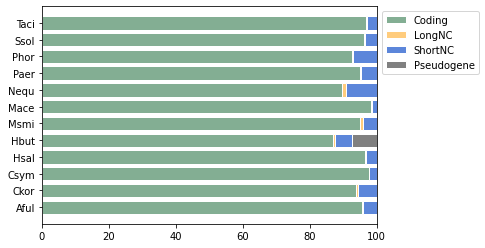

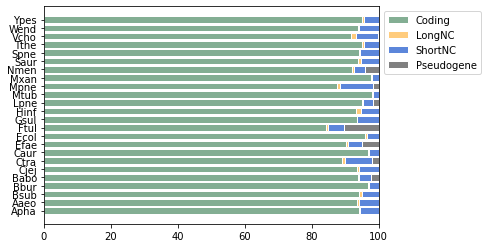

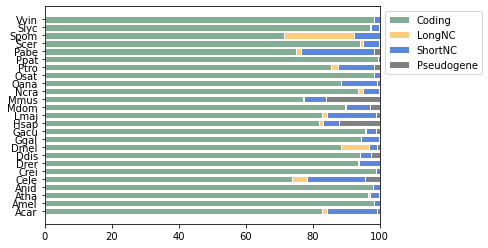

In [46]:
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfGlobal)
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)

my_pl = {'Eukaryote':"#D3772E", 'Archaea':"#2686a4", 'Bacteria':"#c33543"} #test1

groupsSp = dfTmp.groupby('Group')
for name1, group1 in groupsSp:
    # Data
    r = list(set(group1['ShortName']))

    if name1 == 'Archaea':
        r = ['Aful', 'Ckor', 'Csym', 'Hsal', 'Hbut', 'Msmi', 'Mace', 'Nequ', 'Paer', 'Phor', 'Ssol', 'Taci']
    elif name1 == 'Bacteria':
        r = ['Apha', 'Aaeo', 'Bsub', 'Bbur', 'Babo', 'Cjej', 'Ctra', 'Caur', 'Efae', 'Ecol', 'Ftul', 'Gsul', 'Hinf', 'Lpne', 'Mtub', 'Mpne', 'Mxan', 'Nmen', 'Saur', 'Spne', 'Tthe', 'Vcho', 'Wend', 'Ypes']
    else:
        r = ['Acar', 'Amel', 'Atha', 'Anid', 'Cele', 'Crei', 'Drer', 'Ddis', 'Dmel', 'Ggal', 'Gacu', 'Hsap', 'Lmaj', 'Mdom', 'Mmus', 'Ncra', 'Oana', 'Osat', 'Ptro', 'Ppat', 'Pabe', 'Scer', 'Spom', 'Slyc', 'Vvin']

    #Create row for species with no pseudogenes annotated
    dfTmp2 = pd.DataFrame()
    dfTmp2 = dfTmp2.append(group1[group1.Class == "Pseudogene"])
    for sp in r:
        if sp not in list(dfTmp2["ShortName"]):
            d = {'Class': ['Pseudogene'], 'NbTrpG4Shuf': [0], 'NbTrpG4Wt': [0], 'NbpG4rShuf':[0],
                 'NbpG4rWt': [0], 'Tot': [0], 'nbTr': [0], 'nuclA': [0], 'nuclC': [0], 'nuclG': [0],
                 'nuclT': [0], 'PercentWt': [0], 'PercentShuf': [0], 'GC': [0], 'DensityWt': [0],
                 'DensityShuf': [0], 'Sp': [list(set(group1[group1.ShortName == sp].Sp))[0]], 'NbRepro': [0], 'ShortName': [sp],
                 'meanShuffle': [0], 'stdShuffle': [0], 'Group': [name1]}
            dfTmp2 = dfTmp2.append(pd.DataFrame(data=d))
    dfTmp2 = dfTmp2.sort_values(by=['ShortName'])

    # From raw value to percentage
    totals = [i+j+k+l for i,j,k,l in zip(group1[group1.Class == "Coding"].nbTr, group1[group1.Class == "LongNC"].nbTr, group1[group1.Class == "ShortNC"].nbTr, dfTmp2.nbTr)]
    greenBars = [i / j * 100 for i,j in zip(group1[group1.Class == "Coding"].nbTr, totals)]
    orangeBars = [i / j * 100 for i,j in zip(group1[group1.Class == "LongNC"].nbTr, totals)]
    blueBars = [i / j * 100 for i,j in zip(group1[group1.Class == "ShortNC"].nbTr, totals)]
    grayBars = [i / j * 100 for i,j in zip(dfTmp2.nbTr, totals)]    
    
    # plot
    barWidth = 0.85
    # names = ('A','B','C','D','E')
    # Create green Bars
    plt.barh(r, greenBars, color='#83ae93', edgecolor='white', label="Coding")
    # Create orange Bars
    plt.barh(r, orangeBars, left=greenBars, color='#ffcc7d', edgecolor='white', label="LongNC")
    # Create blue Bars
    plt.barh(r, blueBars, left=[i+j for i,j in zip(greenBars, orangeBars)], color='#5c86da', edgecolor='white', label="ShortNC")
    plt.barh(r, grayBars, left=[i+j+k for i,j,k in zip(greenBars, orangeBars, blueBars)], color='gray', edgecolor='white', label="Pseudogene")

    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

    plt.savefig("FiguresArticle/StackedBarPlot_"+name1+".svg")
    plt.show()

## Non coding transcipts
can be compared to figure 6 of the first article
### check the presence of subclasses of transcripts

In [47]:
dfNonCoding['Group'] = dfNonCoding.Sp.apply(getGrp)
dfNonCoding.head()

Biotype   Class  DensityShuf  DensityWt         GC  NbRepro  NbTrpG4Shuf  \
0  LongNC  LongNC     0.212585   0.106293  49.957483        3            1   
1  LongNC  LongNC     0.019666   0.039333  50.169132        3            1   
2  LongNC  LongNC     0.000000   0.000000  45.397490        3            0   
3  LongNC  LongNC     0.282258   0.120968  64.915323        3            4   
4  LongNC  LongNC     0.006139   0.006139  36.345146        3            1   

   NbTrpG4Wt  NbpG4rShuf  NbpG4rWt  ...     Tot  nbTr     nuclA  nuclC  nuclG  \
0          1           2         1  ...    9408     7    2375.0   2345   2355   
1          2           1         2  ...   50848   169   11706.0  12868  12642   
2          0           0         0  ...     956     4     232.0    188    246   
3          3           7         3  ...   24800    13    4190.0   8252   7847   
4          3           3         3  ...  488709   371  139381.0  84959  92663   

      nuclT  ShortName  meanShuffle  stdShuffle      Group  
0    2333.0       Apha     0.209613    0.003998   Bacteria  
1   13632.0       Acar     0.009081    0.007293  Eukaryote  
2     290.0       Amel     0.000000    0.000000  Eukaryote  
3    4511.0       Aaeo     0.376118    0.128590   Bacteria  
4  171706.0       Atha     0.010979    0.003880  Eukaryote  

[5 rows x 23 columns]

ShortNC
{'homo_sapiens', 'nanoarchaeum_equitans_kin4_m', 'aspergillus_nidulans', 'vitis_vinifera', 'haemophilus_influenzae_rd_kw20', 'anaplasma_phagocytophilum_str_hz', 'monodelphis_domestica', 'halobacterium_salinarum_r1', 'drosophila_melanogaster', 'schizosaccharomyces_pombe', 'mycoplasma_pneumoniae_m129', 'chloroflexus_aurantiacus_j_10_fl', 'physcomitrella_patens', 'pan_troglodytes', 'streptococcus_pneumoniae_tigr4', 'gallus_gallus', 'archaeoglobus_fulgidus_dsm_4304', 'enterococcus_faecalis_v583', 'legionella_pneumophila_str_paris', 'leishmania_major', 'mus_musculus', 'brucella_abortus_bv_1_str_9_941', 'oryza_sativa', 'solanum_lycopersicum', 'geobacter_sulfurreducens_pca', 'methanosarcina_acetivorans_c2a', 'bacillus_subtilis_subsp_subtilis_str_168', 'neurospora_crassa', 'borrelia_burgdorferi_b31', 'sulfolobus_solfataricus_p2', 'dictyostelium_discoideum', 'hyperthermus_butylicus_dsm_5456', 'cenarchaeum_symbiosum_a', 'yersinia_pestis_biovar_microtus_str_91001', 'mycobacterium_tubercul

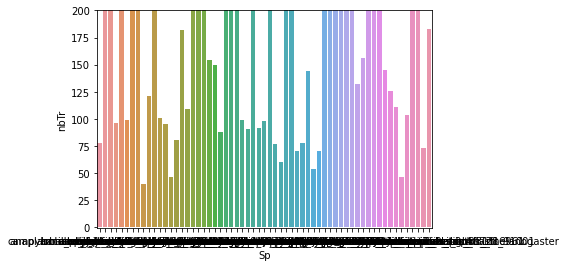

---------------
snRNA
{'homo_sapiens', 'nanoarchaeum_equitans_kin4_m', 'aspergillus_nidulans', 'vitis_vinifera', 'monodelphis_domestica', 'halobacterium_salinarum_r1', 'drosophila_melanogaster', 'schizosaccharomyces_pombe', 'physcomitrella_patens', 'pan_troglodytes', 'gallus_gallus', 'archaeoglobus_fulgidus_dsm_4304', 'leishmania_major', 'mus_musculus', 'oryza_sativa', 'solanum_lycopersicum', 'methanosarcina_acetivorans_c2a', 'neurospora_crassa', 'sulfolobus_solfataricus_p2', 'arabidopsis_thaliana', 'apis_mellifera', 'pongo_abelii', 'saccharomyces_cerevisiae', 'anolis_carolinensis', 'gasterosteus_aculeatus', 'chlamydomonas_reinhardtii', 'danio_rerio', 'caenorhabditis_elegans', 'ornithorhynchus_anatinus', 'pyrococcus_horikoshii_ot3'}


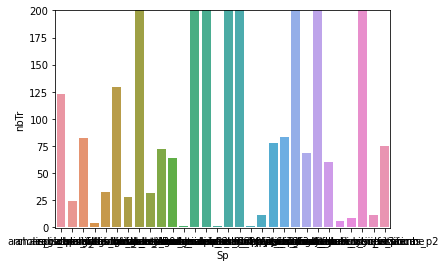

---------------
miRNA
{'anolis_carolinensis', 'gasterosteus_aculeatus', 'homo_sapiens', 'mus_musculus', 'danio_rerio', 'monodelphis_domestica', 'arabidopsis_thaliana', 'pongo_abelii', 'pan_troglodytes', 'gallus_gallus', 'caenorhabditis_elegans', 'ornithorhynchus_anatinus'}


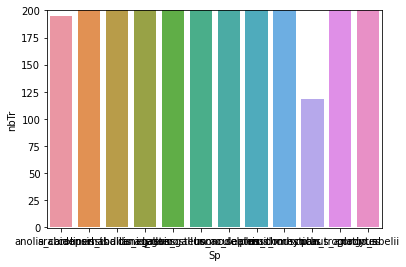

---------------
ncRNA
{'aspergillus_nidulans', 'haemophilus_influenzae_rd_kw20', 'anaplasma_phagocytophilum_str_hz', 'halobacterium_salinarum_r1', 'drosophila_melanogaster', 'schizosaccharomyces_pombe', 'mycoplasma_pneumoniae_m129', 'chloroflexus_aurantiacus_j_10_fl', 'streptococcus_pneumoniae_tigr4', 'archaeoglobus_fulgidus_dsm_4304', 'enterococcus_faecalis_v583', 'legionella_pneumophila_str_paris', 'leishmania_major', 'brucella_abortus_bv_1_str_9_941', 'geobacter_sulfurreducens_pca', 'methanosarcina_acetivorans_c2a', 'bacillus_subtilis_subsp_subtilis_str_168', 'neurospora_crassa', 'borrelia_burgdorferi_b31', 'sulfolobus_solfataricus_p2', 'dictyostelium_discoideum', 'hyperthermus_butylicus_dsm_5456', 'yersinia_pestis_biovar_microtus_str_91001', 'mycobacterium_tuberculosis_h37rv', 'arabidopsis_thaliana', 'methanobrevibacter_smithii_atcc_35061', 'apis_mellifera', 'aquifex_aeolicus_vf5', 'vibrio_cholerae_o1_biovar_el_tor_str_n16961', 'escherichia_coli_str_k_12_substr_mg1655', 'saccharomy

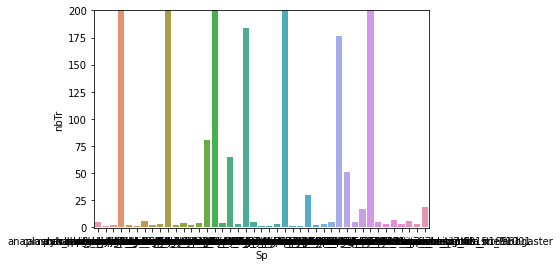

---------------
LongNC
{'homo_sapiens', 'nanoarchaeum_equitans_kin4_m', 'aspergillus_nidulans', 'vitis_vinifera', 'haemophilus_influenzae_rd_kw20', 'anaplasma_phagocytophilum_str_hz', 'monodelphis_domestica', 'halobacterium_salinarum_r1', 'drosophila_melanogaster', 'schizosaccharomyces_pombe', 'mycoplasma_pneumoniae_m129', 'chloroflexus_aurantiacus_j_10_fl', 'physcomitrella_patens', 'pan_troglodytes', 'streptococcus_pneumoniae_tigr4', 'gallus_gallus', 'archaeoglobus_fulgidus_dsm_4304', 'enterococcus_faecalis_v583', 'legionella_pneumophila_str_paris', 'leishmania_major', 'mus_musculus', 'brucella_abortus_bv_1_str_9_941', 'oryza_sativa', 'solanum_lycopersicum', 'geobacter_sulfurreducens_pca', 'methanosarcina_acetivorans_c2a', 'bacillus_subtilis_subsp_subtilis_str_168', 'neurospora_crassa', 'borrelia_burgdorferi_b31', 'sulfolobus_solfataricus_p2', 'dictyostelium_discoideum', 'hyperthermus_butylicus_dsm_5456', 'cenarchaeum_symbiosum_a', 'yersinia_pestis_biovar_microtus_str_91001', 'mycobac

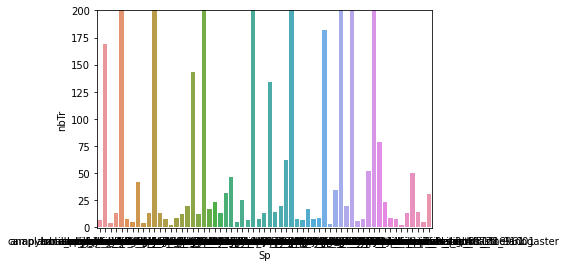

---------------
rRNA
{'homo_sapiens', 'nanoarchaeum_equitans_kin4_m', 'aspergillus_nidulans', 'vitis_vinifera', 'haemophilus_influenzae_rd_kw20', 'anaplasma_phagocytophilum_str_hz', 'monodelphis_domestica', 'halobacterium_salinarum_r1', 'drosophila_melanogaster', 'schizosaccharomyces_pombe', 'mycoplasma_pneumoniae_m129', 'chloroflexus_aurantiacus_j_10_fl', 'physcomitrella_patens', 'pan_troglodytes', 'streptococcus_pneumoniae_tigr4', 'gallus_gallus', 'archaeoglobus_fulgidus_dsm_4304', 'enterococcus_faecalis_v583', 'legionella_pneumophila_str_paris', 'leishmania_major', 'mus_musculus', 'brucella_abortus_bv_1_str_9_941', 'oryza_sativa', 'solanum_lycopersicum', 'geobacter_sulfurreducens_pca', 'methanosarcina_acetivorans_c2a', 'bacillus_subtilis_subsp_subtilis_str_168', 'neurospora_crassa', 'borrelia_burgdorferi_b31', 'sulfolobus_solfataricus_p2', 'hyperthermus_butylicus_dsm_5456', 'cenarchaeum_symbiosum_a', 'yersinia_pestis_biovar_microtus_str_91001', 'mycobacterium_tuberculosis_h37rv', 'a

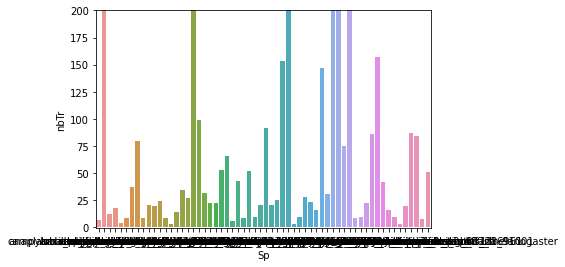

---------------
misc_RNA
{'anolis_carolinensis', 'gasterosteus_aculeatus', 'homo_sapiens', 'mus_musculus', 'danio_rerio', 'monodelphis_domestica', 'pongo_abelii', 'pan_troglodytes', 'gallus_gallus', 'ornithorhynchus_anatinus'}


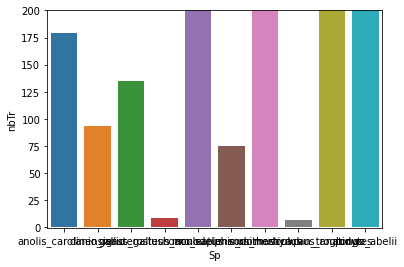

---------------
tRNA
{'nanoarchaeum_equitans_kin4_m', 'aspergillus_nidulans', 'vitis_vinifera', 'haemophilus_influenzae_rd_kw20', 'anaplasma_phagocytophilum_str_hz', 'halobacterium_salinarum_r1', 'drosophila_melanogaster', 'schizosaccharomyces_pombe', 'mycoplasma_pneumoniae_m129', 'chloroflexus_aurantiacus_j_10_fl', 'physcomitrella_patens', 'streptococcus_pneumoniae_tigr4', 'archaeoglobus_fulgidus_dsm_4304', 'enterococcus_faecalis_v583', 'legionella_pneumophila_str_paris', 'leishmania_major', 'brucella_abortus_bv_1_str_9_941', 'oryza_sativa', 'solanum_lycopersicum', 'geobacter_sulfurreducens_pca', 'methanosarcina_acetivorans_c2a', 'bacillus_subtilis_subsp_subtilis_str_168', 'neurospora_crassa', 'borrelia_burgdorferi_b31', 'sulfolobus_solfataricus_p2', 'dictyostelium_discoideum', 'hyperthermus_butylicus_dsm_5456', 'cenarchaeum_symbiosum_a', 'yersinia_pestis_biovar_microtus_str_91001', 'mycobacterium_tuberculosis_h37rv', 'arabidopsis_thaliana', 'methanobrevibacter_smithii_atcc_35061', 'a

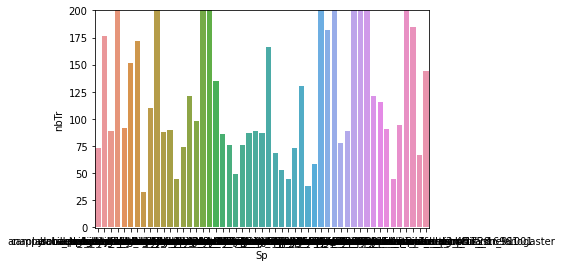

---------------
snoRNA
{'homo_sapiens', 'vitis_vinifera', 'monodelphis_domestica', 'drosophila_melanogaster', 'schizosaccharomyces_pombe', 'physcomitrella_patens', 'pan_troglodytes', 'gallus_gallus', 'mus_musculus', 'oryza_sativa', 'solanum_lycopersicum', 'neurospora_crassa', 'arabidopsis_thaliana', 'apis_mellifera', 'pongo_abelii', 'saccharomyces_cerevisiae', 'anolis_carolinensis', 'gasterosteus_aculeatus', 'chlamydomonas_reinhardtii', 'danio_rerio', 'caenorhabditis_elegans', 'ornithorhynchus_anatinus'}


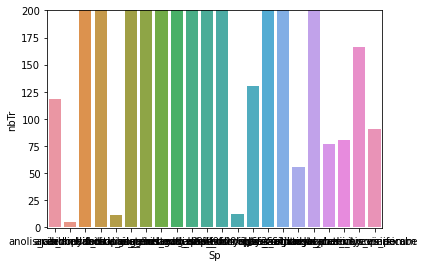

---------------


In [48]:
for bt in set(dfNonCoding['Biotype']):
    print(bt)
    if len(set(dfNonCoding[dfNonCoding.Biotype == bt].Sp)) >= 10:
        print(set(dfNonCoding[dfNonCoding.Biotype == bt].Sp))
        sns.barplot(x="Sp", y="nbTr", data=dfNonCoding[dfNonCoding.Biotype == bt])
        plt.ylim([-0.5, +200])
        plt.show()
        print('---------------')

### Double lolipop plot

Archaea


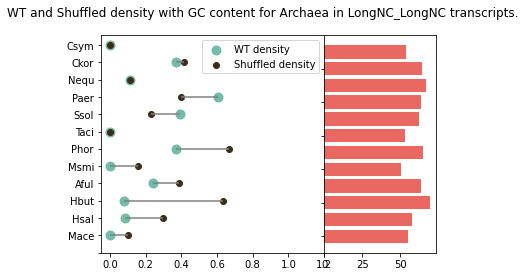

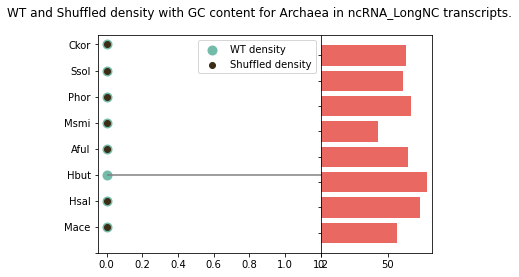

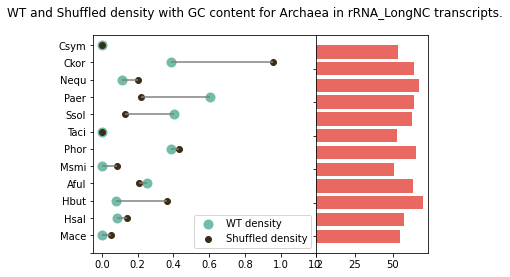

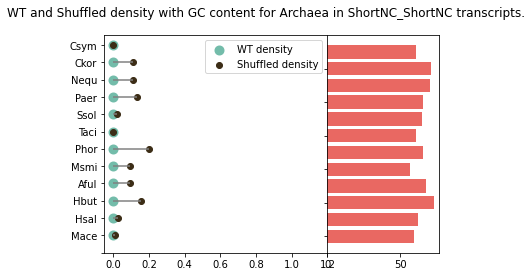

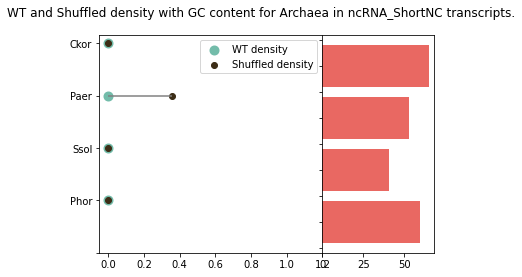

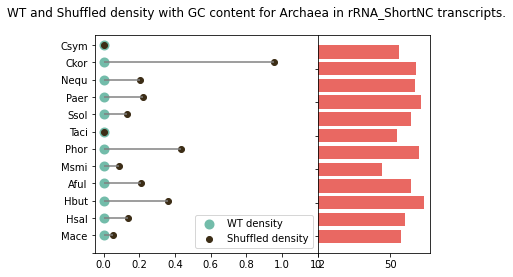

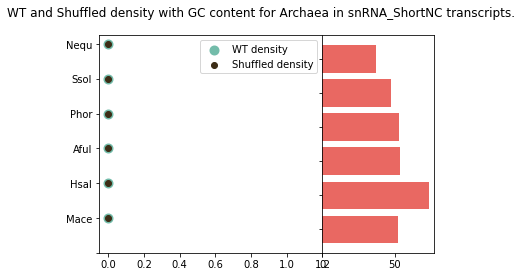

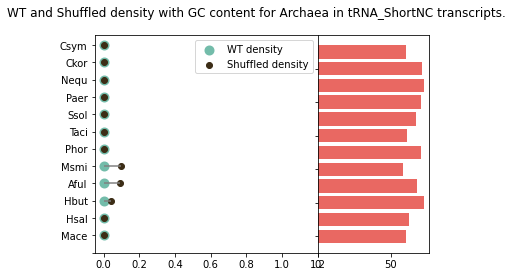

Bacteria


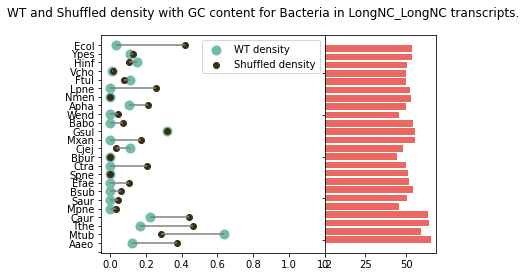

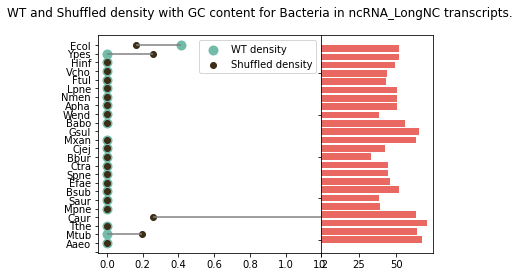

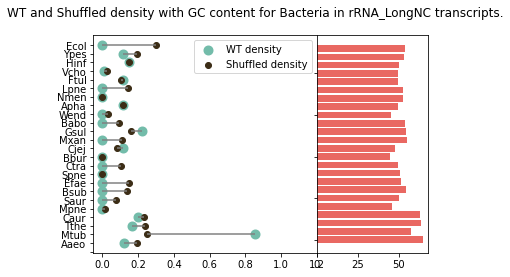

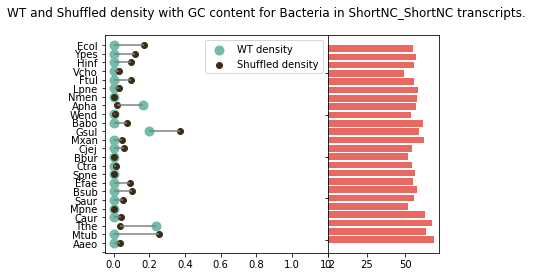

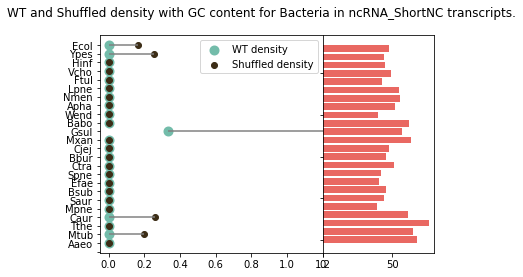

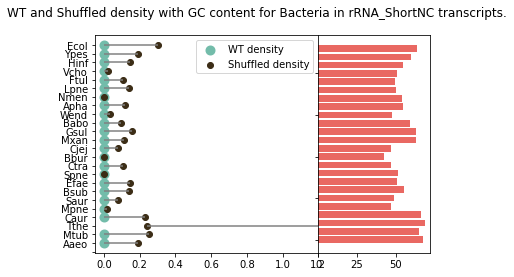

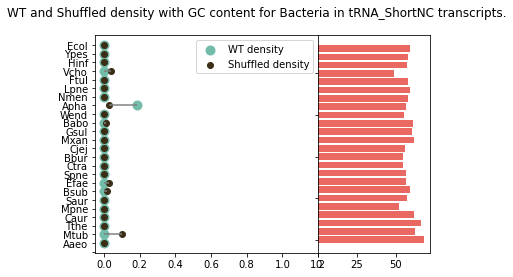

Eukaryote


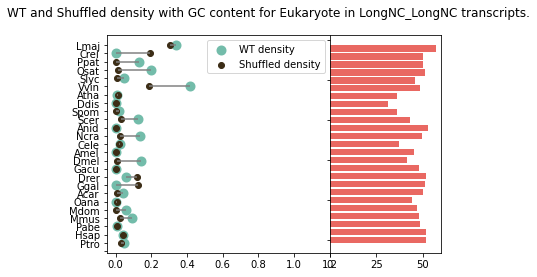

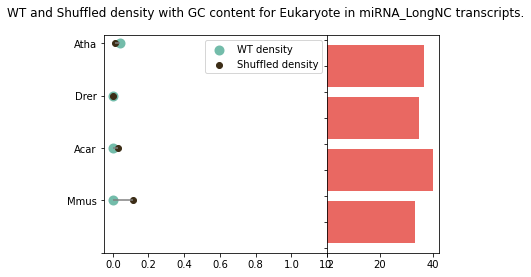

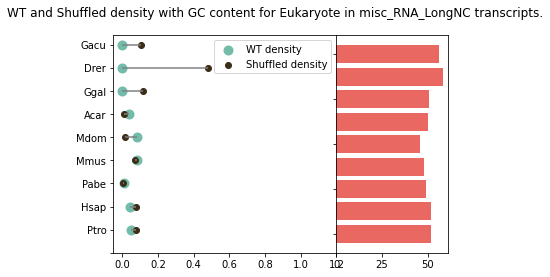

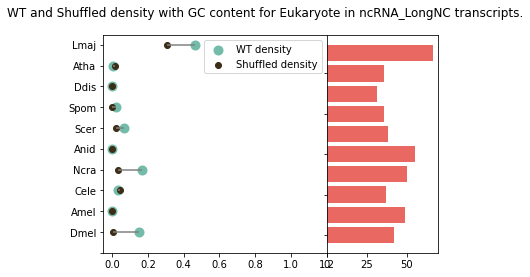

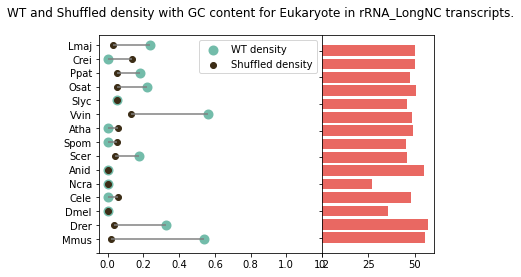

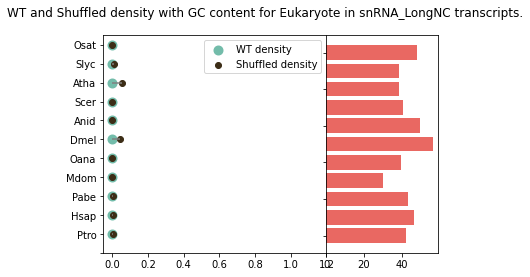

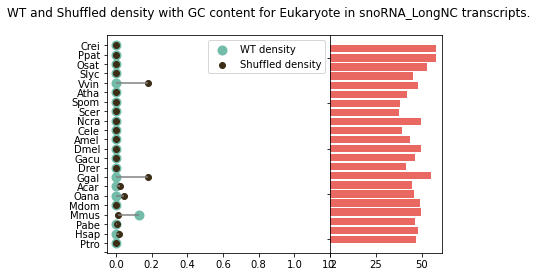

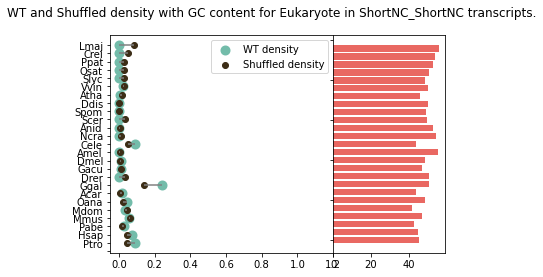

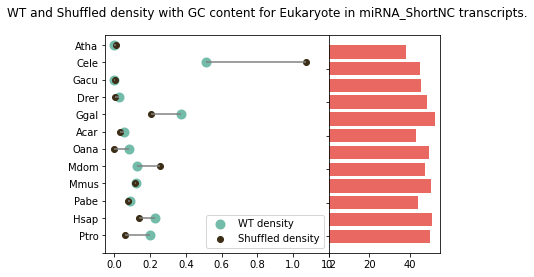

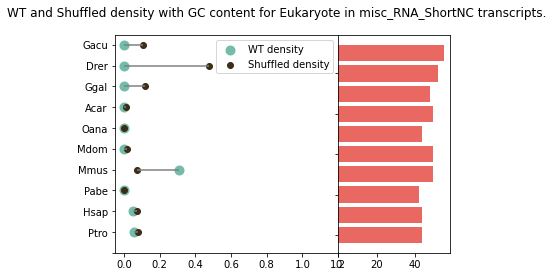

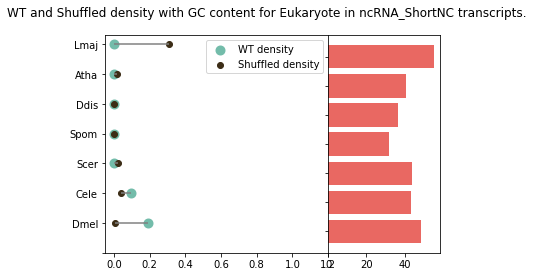

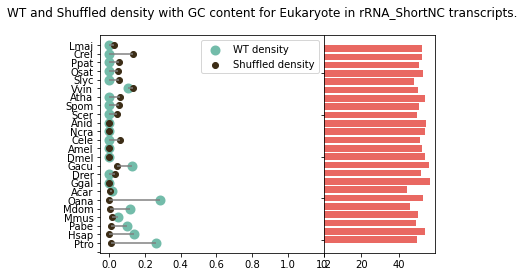

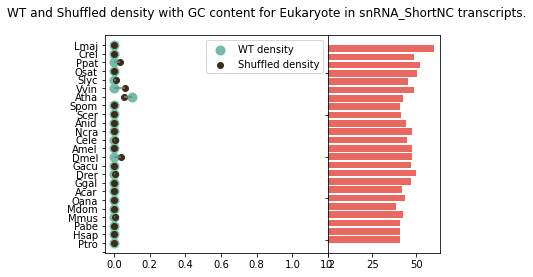

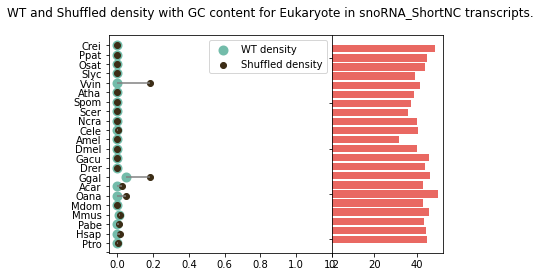

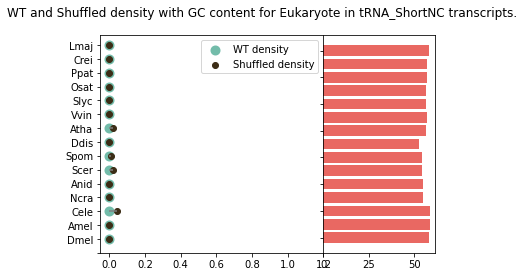

In [49]:
dicoOrder = {'Archaea' : ['Mace', 'Hsal', 'Hbut', 'Aful', 'Msmi', 'Phor', 'Taci', 'Ssol', 'Paer', 'Nequ', 'Ckor', 'Csym'],
            'Bacteria' : ['Aaeo', 'Mtub', 'Tthe', 'Caur', 'Mpne', 'Saur', 'Bsub', 'Efae', 'Spne', 'Ctra', 'Bbur', 'Cjej', 'Mxan', 'Gsul', 'Babo', 'Wend', 'Apha', 'Nmen', 'Lpne', 'Ftul', 'Vcho', 'Hinf', 'Ypes', 'Ecol'],
            'Eukaryote' : ['Ptro', 'Hsap', 'Pabe', 'Mmus', 'Mdom', 'Oana', 'Acar', 'Ggal', 'Drer', 'Gacu', 'Dmel', 'Amel', 'Cele', 'Ncra', 'Anid', 'Scer', 'Spom', 'Ddis', 'Atha', 'Vvin', 'Slyc', 'Osat', 'Ppat', 'Crei', 'Lmaj']}
dfNonCoding.Biotype
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfNonCoding)
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)

groupsSp = dfTmp.groupby('Group')
for name1, group1 in groupsSp:
    print(name1)
    group1 = group1.drop_duplicates(subset=None, keep='first', inplace=False)
    groupsCl = group1.groupby('Class')
    for cl, group3 in groupsCl:
        groupsBt = group3.groupby('Biotype')
        for bt, group2 in groupsBt:
            group2 = group2.drop_duplicates(subset=None, keep='first', inplace=False)
            group2['ShortName'] = pd.Categorical(
                    group2['ShortName'], categories=dicoOrder[name1], ordered=True)
            group2 = group2.sort_values('ShortName')

            fig, axs = plt.subplots(1, 2, sharex='col',
                        gridspec_kw={'hspace': 0, 'wspace': 0, 'width_ratios' : [2,1]})
            (ax1, ax2)= axs
            fig.suptitle('WT and Shuffled density with GC content for '+name1+' in '+bt+'_'+cl+' transcripts.')    

            my_range=range(1,len(group2.index)+1)
            ax1.hlines(y=my_range, xmin=group2['DensityWt'], xmax=group2['meanShuffle'], color='grey')
            ax1.scatter(group2['DensityWt'], my_range, color='#73BCAA', label='WT density', linewidth=4)
            ax1.scatter(group2['meanShuffle'], my_range, color='#3C2D16', label='Shuffled density')
            ax1.set_xlim([-0.05, +1.20])
            y = np.arange(len(group2['ShortName'])+1)
            yLabels = ['']
            yLabels.extend( list(group2['ShortName']) )
            ax1.set_yticks(y)
            ax1.set_yticklabels(yLabels, fontdict=None, minor=False)
            ax1.legend()
            y_pos = np.arange(len(group2['ShortName']))
            ax2.barh(y_pos, group2['GC'], color='#E64E46', alpha=0.85)
            for ax in axs.flat:
                ax.label_outer()

            plt.savefig("FiguresArticle/"+name1+"_"+bt+"_"+cl+"_transcript.svg")
            plt.show()

### dotplot

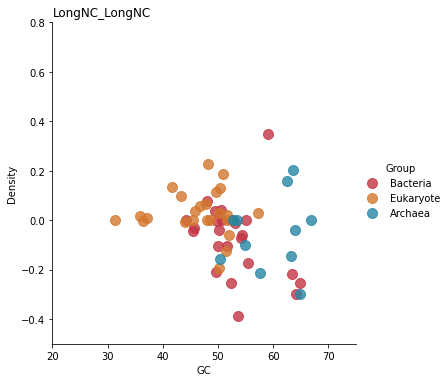

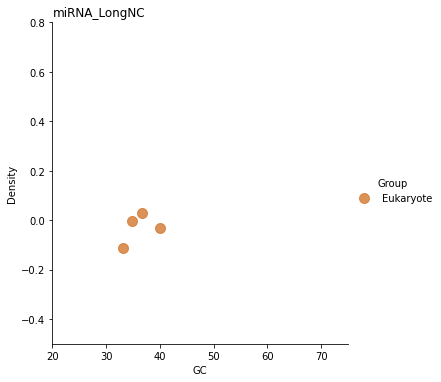

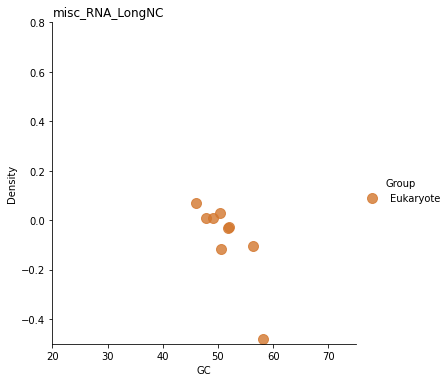

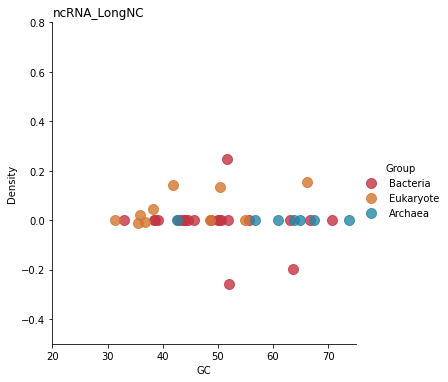

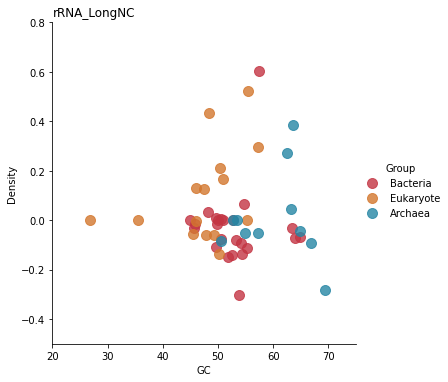

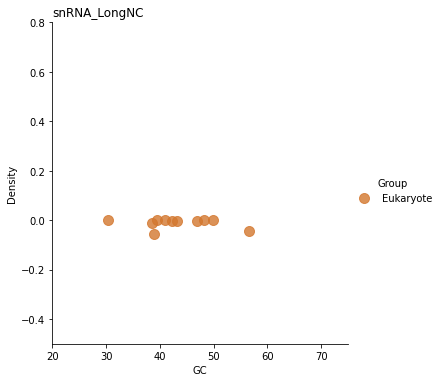

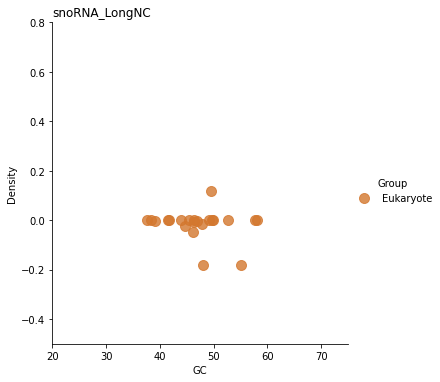

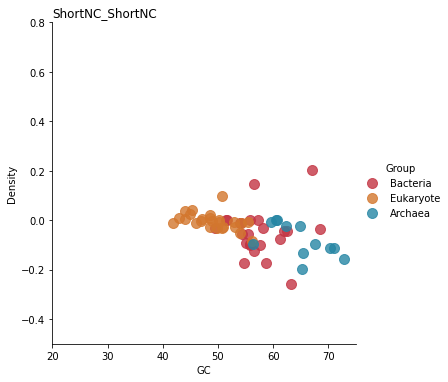

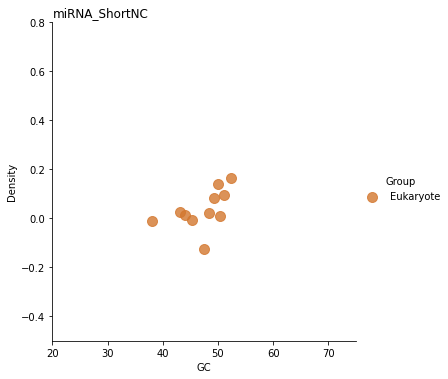

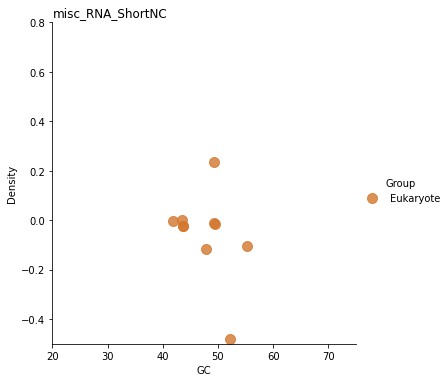

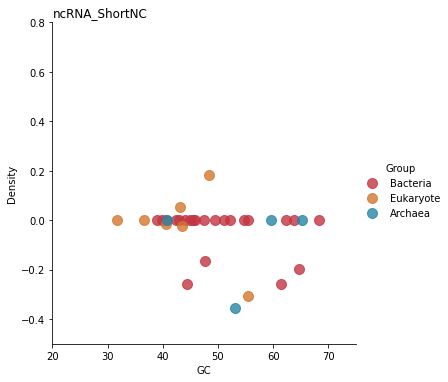

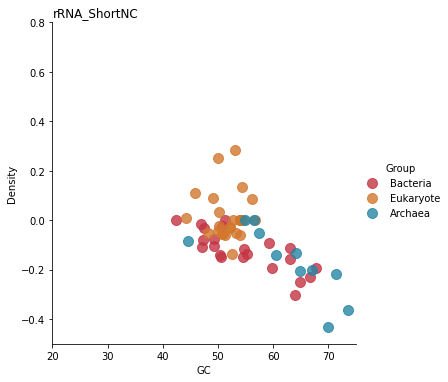

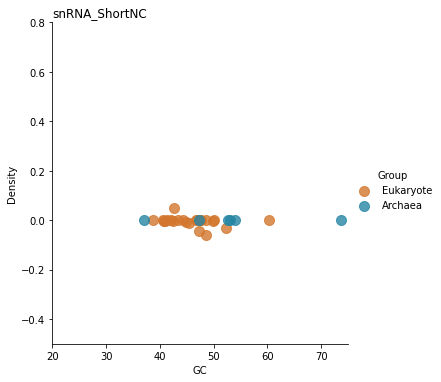

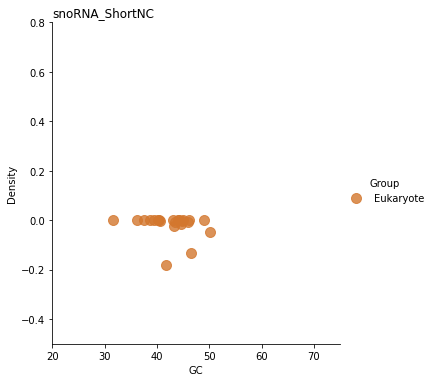

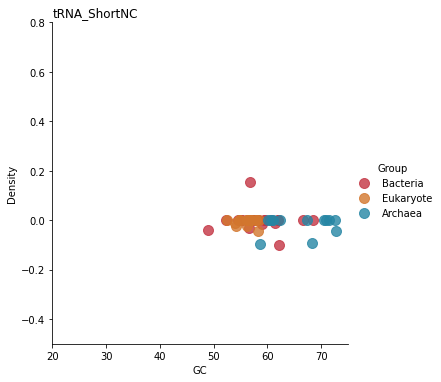

In [50]:
dfNonCoding.Biotype
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfNonCoding)
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)
dfTmp['Density'] = dfTmp['DensityWt'] - dfTmp['meanShuffle']

groupsCl = dfTmp.groupby('Class')
for cl, group1 in groupsCl:
    groupsBt = group1.groupby('Biotype')
    for bt, group2 in groupsBt:
        group2 = group2.drop_duplicates(subset=None, keep='first', inplace=False)
        my_pl = {'Eukaryote':"#D3772E", 'Archaea':"#2686a4", 'Bacteria':"#c33543"} #test1
        sns.lmplot( x="GC", y="Density", data=group2, fit_reg=False, hue='Group', legend=True, palette=my_pl, scatter_kws={"s": 100})
        plt.title(bt+"_"+cl, loc='left')
        plt.ylim([-0.5, +0.8])
        plt.xlim([20, +75])
        plt.savefig("FiguresArticle/dotPlotTranscriptMeanShuff_"+bt+"_"+cl+".svg")
        plt.show()

### boxplot

	mannwhitneyu test
Means are not differents
Archaea LongNC LongNC
MannwhitneyuResult(statistic=50.0, pvalue=0.10549333558263291)


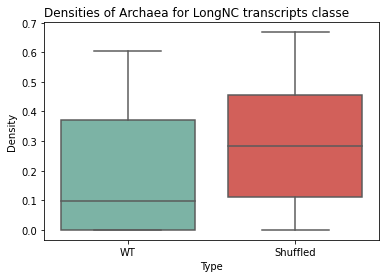

	mannwhitneyu test
Means are not differents

/home/anais/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "



Archaea LongNC ncRNA
MannwhitneyuResult(statistic=28.0, pvalue=0.19078695285251068)


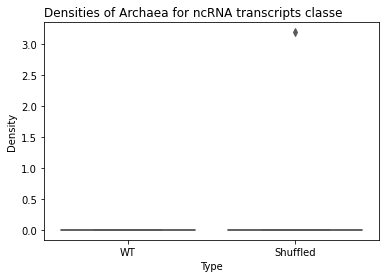

	mannwhitneyu test
Means are not differents
Archaea LongNC rRNA
MannwhitneyuResult(statistic=65.0, pvalue=0.3526536198864294)


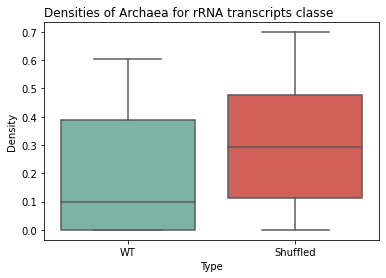

	Fisher test
	t test
Means are significatly different
Archaea ShortNC ShortNC
Ttest_indResult(statistic=-4.132727776312481, pvalue=0.00043630376745808534)


/home/anais/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


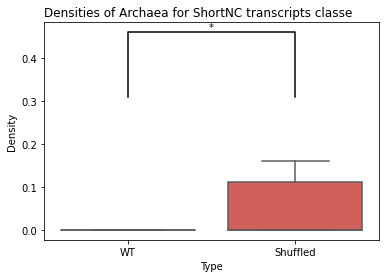

/home/anais/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


	mannwhitneyu test
Means are not differents
Archaea ShortNC ncRNA
MannwhitneyuResult(statistic=6.0, pvalue=0.2266273523768682)


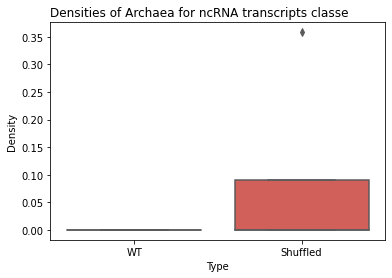

	mannwhitneyu test
Means are significatly different
Archaea ShortNC rRNA
MannwhitneyuResult(statistic=12.0, pvalue=6.265436394196532e-05)


/home/anais/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


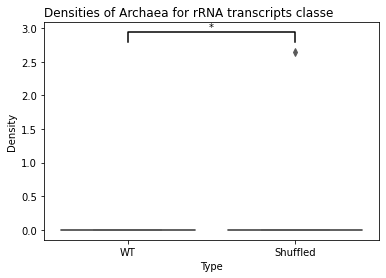

/home/anais/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


	Fisher test
	welch test
Means are not differents
Archaea ShortNC snRNA
Ttest_indResult(statistic=nan, pvalue=nan)


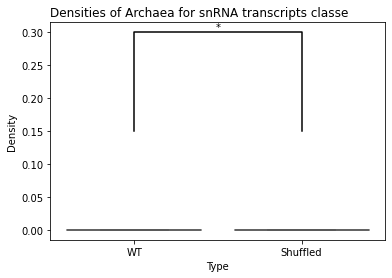

	mannwhitneyu test
Means are significatly different
Archaea ShortNC tRNA
MannwhitneyuResult(statistic=54.0, pvalue=0.03940280122347906)


/home/anais/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


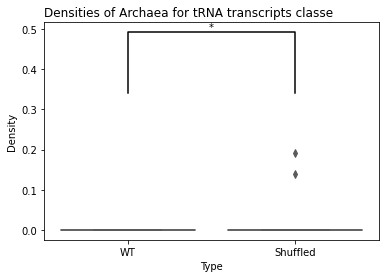

	mannwhitneyu test
Means are significatly different
Bacteria LongNC LongNC
MannwhitneyuResult(statistic=178.0, pvalue=0.010924912411885068)


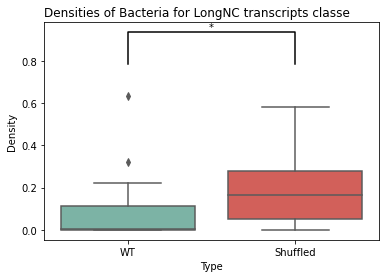

	mannwhitneyu test
Means are not differents
Bacteria LongNC ncRNA
MannwhitneyuResult(statistic=270.5, pvalue=0.29460464635610495)


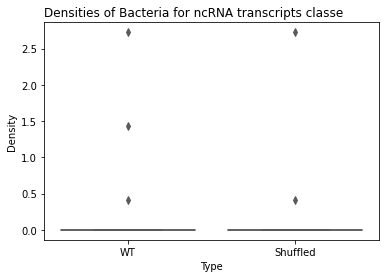

	mannwhitneyu test
Means are significatly different
Bacteria LongNC rRNA
MannwhitneyuResult(statistic=183.5, pvalue=0.014438994408366549)


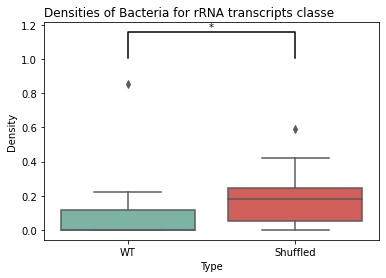

	mannwhitneyu test
Means are significatly different
Bacteria ShortNC ShortNC
MannwhitneyuResult(statistic=107.0, pvalue=2.959867287747376e-05)


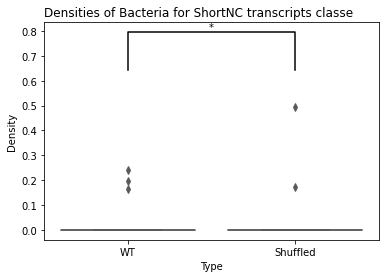

	mannwhitneyu test
Means are significatly different
Bacteria ShortNC ncRNA
MannwhitneyuResult(statistic=241.5, pvalue=0.04939834145574676)


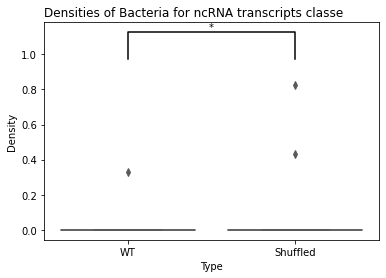

	mannwhitneyu test
Means are significatly different
Bacteria ShortNC rRNA
MannwhitneyuResult(statistic=58.5, pvalue=1.3148622962275924e-07)


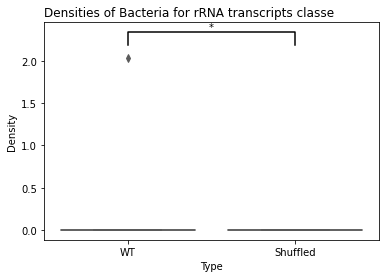

	mannwhitneyu test
Means are significatly different
Bacteria ShortNC tRNA
MannwhitneyuResult(statistic=231.0, pvalue=0.028870876756646496)


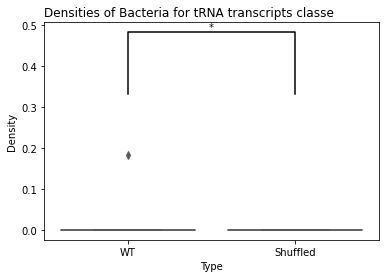

	mannwhitneyu test
Means are not differents
Eukaryote LongNC LongNC
MannwhitneyuResult(statistic=258.5, pvalue=0.14795261364491713)


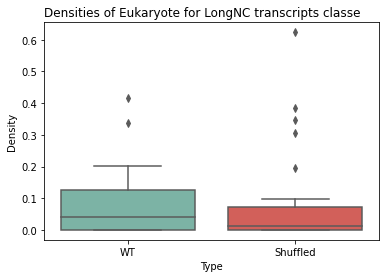

	mannwhitneyu test
Means are not differents
Eukaryote LongNC miRNA
MannwhitneyuResult(statistic=3.0, pvalue=0.091575101578311)


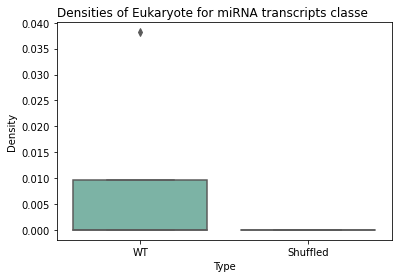

	mannwhitneyu test
Means are not differents
Eukaryote LongNC misc_RNA
MannwhitneyuResult(statistic=22.0, pvalue=0.055610432607647704)


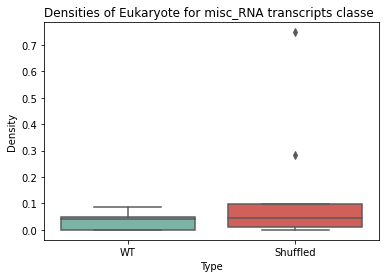

	mannwhitneyu test
Means are not differents
Eukaryote LongNC ncRNA
MannwhitneyuResult(statistic=39.5, pvalue=0.22181551224694857)


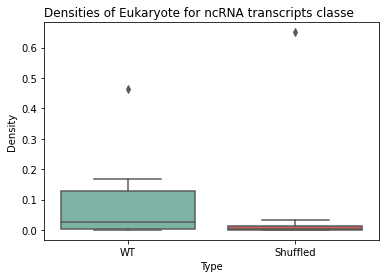

	mannwhitneyu test
Means are not differents
Eukaryote LongNC rRNA
MannwhitneyuResult(statistic=102.5, pvalue=0.34403368401239715)


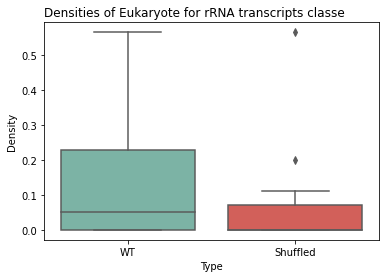

	mannwhitneyu test
Means are significatly different
Eukaryote LongNC snRNA
MannwhitneyuResult(statistic=27.5, pvalue=0.0032736657045868743)


/home/anais/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


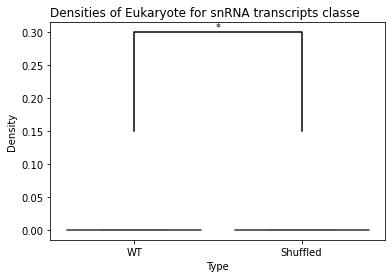

	mannwhitneyu test
Means are significatly different
Eukaryote LongNC snoRNA
MannwhitneyuResult(statistic=156.5, pvalue=0.003281804653716889)


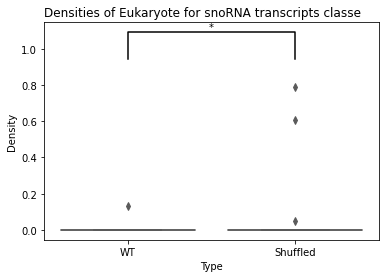

	mannwhitneyu test
Means are significatly different
Eukaryote ShortNC ShortNC
MannwhitneyuResult(statistic=209.5, pvalue=0.02261060600512547)


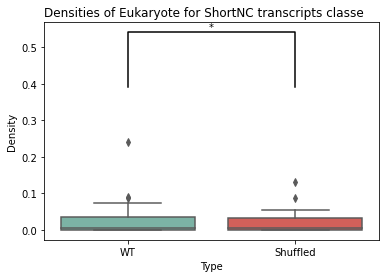

	mannwhitneyu test
Means are not differents
Eukaryote ShortNC miRNA
MannwhitneyuResult(statistic=63.0, pvalue=0.31165133136256107)


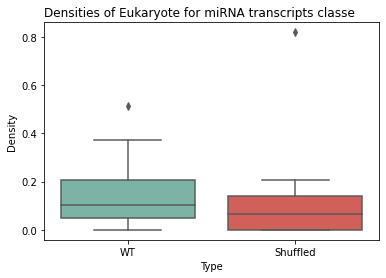

	mannwhitneyu test
Means are significatly different
Eukaryote ShortNC misc_RNA
MannwhitneyuResult(statistic=20.5, pvalue=0.01175992999022787)


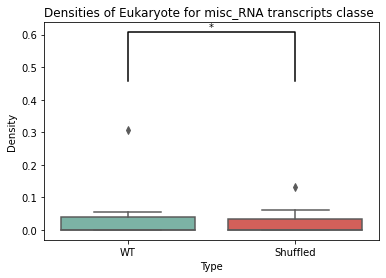

	mannwhitneyu test
Means are not differents
Eukaryote ShortNC ncRNA
MannwhitneyuResult(statistic=14.5, pvalue=0.10321712114410125)


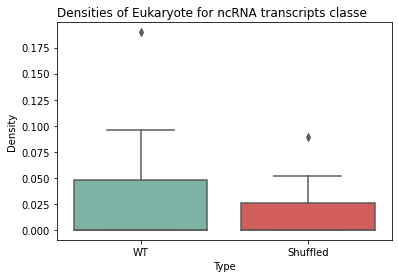

	mannwhitneyu test
Means are not differents
Eukaryote ShortNC rRNA
MannwhitneyuResult(statistic=239.5, pvalue=0.14892800074660995)


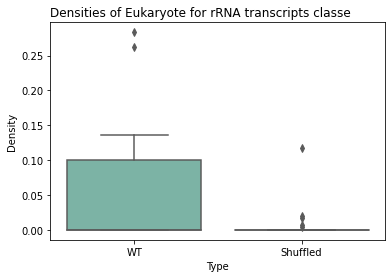

	mannwhitneyu test
Means are significatly different
Eukaryote ShortNC snRNA
MannwhitneyuResult(statistic=173.5, pvalue=0.0009968731035990357)


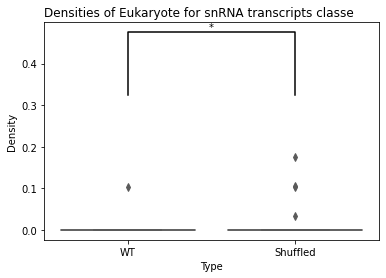

	mannwhitneyu test
Means are significatly different
Eukaryote ShortNC snoRNA
MannwhitneyuResult(statistic=165.0, pvalue=0.009105843794322922)


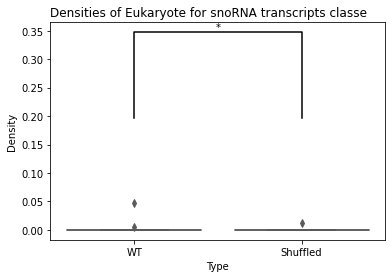

	mannwhitneyu test
Means are significatly different
Eukaryote ShortNC tRNA
MannwhitneyuResult(statistic=82.5, pvalue=0.019207161907080186)


/home/anais/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


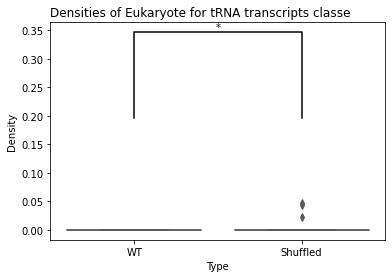

In [51]:
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfNonCoding)
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)
dfTmp['ShortName'] = dfTmp.Sp.apply(applyShortName)

groupsSp = dfTmp.groupby('Group')
for realm, group3 in groupsSp:
    groupsCl = group3.groupby('Class')
    for cl, group1 in groupsCl:
        groupsBt = group1.groupby('Biotype')
        for bt, group2 in groupsBt:
            if name2 != 'None':
                group2 = group2.drop_duplicates(subset=None, keep='first', inplace=False)

                a = group2['DensityWt']
                b = group2['meanShuffle']

                res = AllTest(a,b,0.05, realm, bt)

                if res != []:
                    print(realm, cl, bt)
                    print(res)
                    makeBoxPlotWTvsShuf(res[1], group2, 0.05, a, b, realm, bt, cl)

	mannwhitneyu test
Means are significatly different
LongNC LongNC
MannwhitneyuResult(statistic=95.5, pvalue=0.03841520027913375)


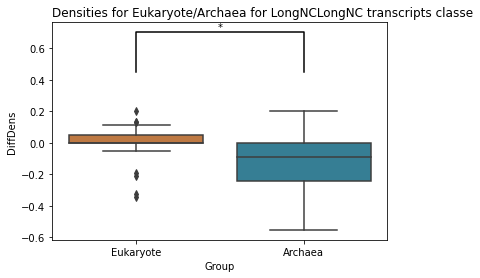

There are only 3 data for miRNA of Eukaryote/Archaea transcripts.
There are only 3 data for misc_RNA of Eukaryote/Archaea transcripts.
	mannwhitneyu test
Means are significatly different
ncRNA LongNC
MannwhitneyuResult(statistic=17.5, pvalue=0.015937345561163243)


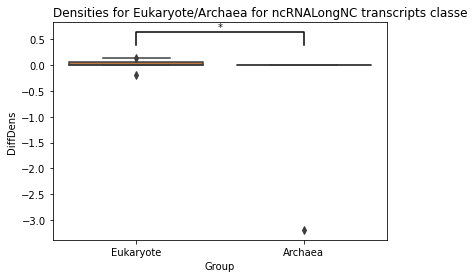

	Fisher test
	t test
Means are significatly different
rRNA LongNC
Ttest_indResult(statistic=2.588079307707636, pvalue=0.01585009486099451)


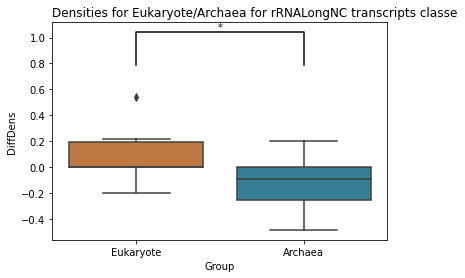

There are only 3 data for snRNA of Eukaryote/Archaea transcripts.
There are only 3 data for snoRNA of Eukaryote/Archaea transcripts.
	mannwhitneyu test
Means are significatly different
ShortNC ShortNC
MannwhitneyuResult(statistic=66.5, pvalue=0.0024890816521585435)


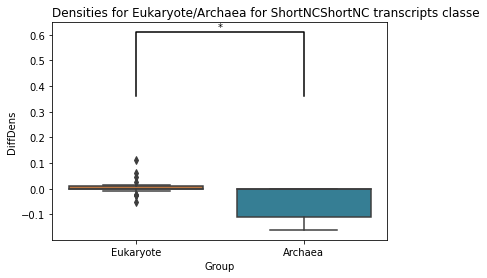

There are only 3 data for miRNA of Eukaryote/Archaea transcripts.
There are only 3 data for misc_RNA of Eukaryote/Archaea transcripts.
	mannwhitneyu test
Means are not differents
ncRNA ShortNC
MannwhitneyuResult(statistic=9.0, pvalue=0.16231945292273647)


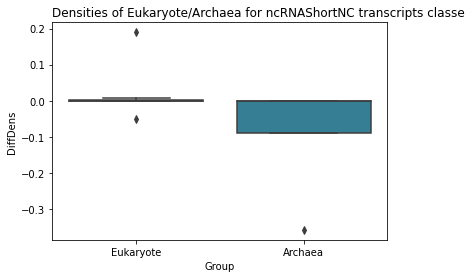

	mannwhitneyu test
Means are significatly different
rRNA ShortNC
MannwhitneyuResult(statistic=93.5, pvalue=0.022762473445471477)


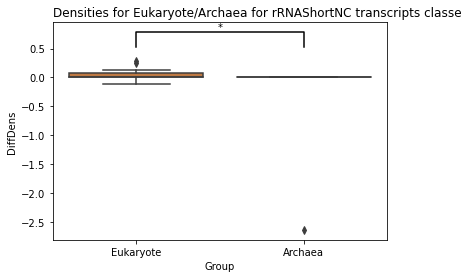

/home/anais/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


	mannwhitneyu test
Means are not differents
snRNA ShortNC
MannwhitneyuResult(statistic=63.0, pvalue=0.1987002517335701)


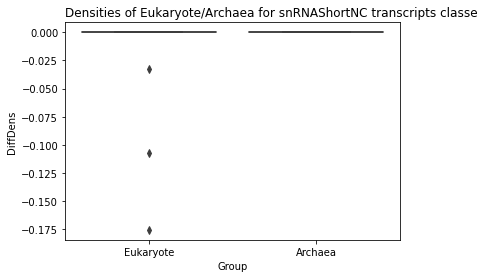

There are only 3 data for snoRNA of Eukaryote/Archaea transcripts.
	mannwhitneyu test
Means are not differents
tRNA ShortNC
MannwhitneyuResult(statistic=90.0, pvalue=0.4856429456279734)


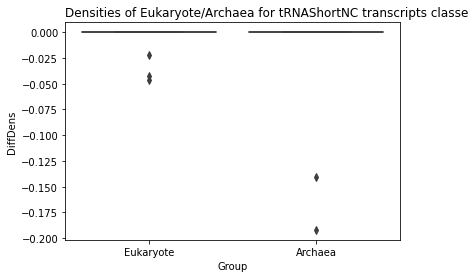

	mannwhitneyu test
Means are significatly different
LongNC LongNC
MannwhitneyuResult(statistic=163.0, pvalue=0.0028040529714266483)


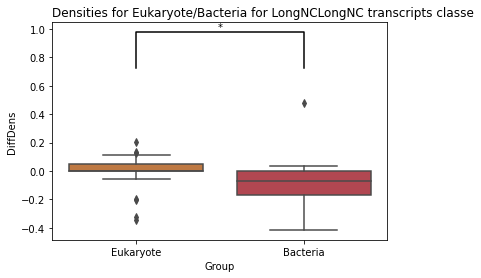

There are only 3 data for miRNA of Eukaryote/Bacteria transcripts.
There are only 3 data for misc_RNA of Eukaryote/Bacteria transcripts.
	mannwhitneyu test
Means are significatly different
ncRNA LongNC
MannwhitneyuResult(statistic=67.5, pvalue=0.0041118764907024565)


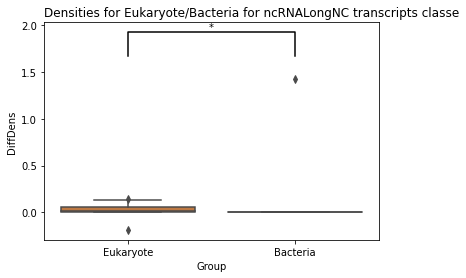

	mannwhitneyu test
Means are significatly different
rRNA LongNC
MannwhitneyuResult(statistic=77.0, pvalue=0.0012247923015590097)


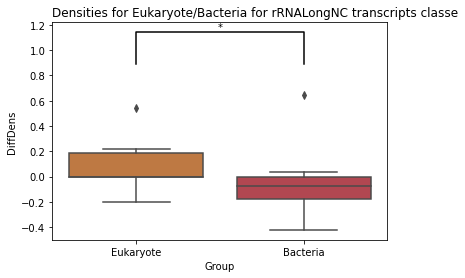

There are only 3 data for snRNA of Eukaryote/Bacteria transcripts.
There are only 3 data for snoRNA of Eukaryote/Bacteria transcripts.
	mannwhitneyu test
Means are not differents
ShortNC ShortNC
MannwhitneyuResult(statistic=240.0, pvalue=0.09070273760949127)


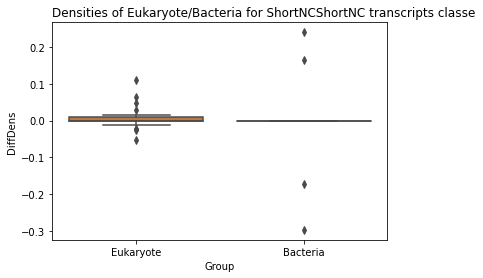

There are only 3 data for miRNA of Eukaryote/Bacteria transcripts.
There are only 3 data for misc_RNA of Eukaryote/Bacteria transcripts.
	mannwhitneyu test
Means are not differents
ncRNA ShortNC
MannwhitneyuResult(statistic=66.0, pvalue=0.09838718051990258)


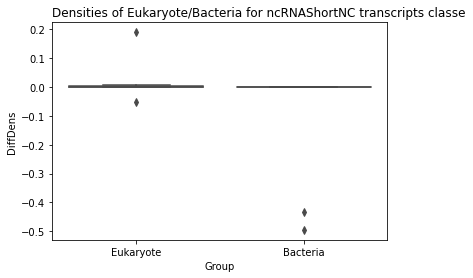

	mannwhitneyu test
Means are significatly different
rRNA ShortNC
MannwhitneyuResult(statistic=219.5, pvalue=0.03260241433430269)


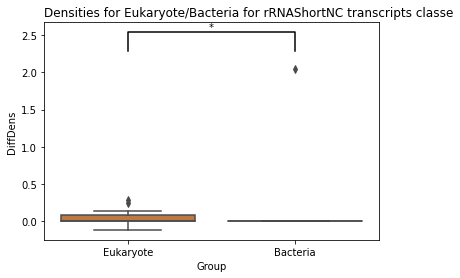

There are only 3 data for snRNA of Eukaryote/Bacteria transcripts.
There are only 3 data for snoRNA of Eukaryote/Bacteria transcripts.
	mannwhitneyu test
Means are significatly different
tRNA ShortNC
MannwhitneyuResult(statistic=138.0, pvalue=0.011456223369899913)


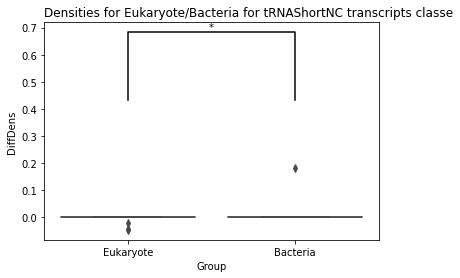

	mannwhitneyu test
Means are not differents
LongNC LongNC
MannwhitneyuResult(statistic=139.0, pvalue=0.439122462585622)


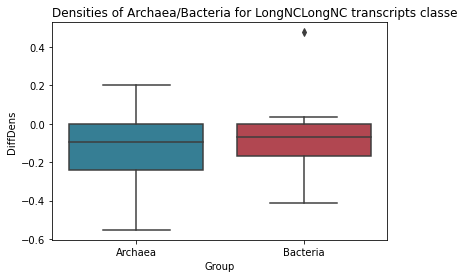

There are only 3 data for miRNA of Archaea/Bacteria transcripts.
There are only 3 data for misc_RNA of Archaea/Bacteria transcripts.
	mannwhitneyu test
Means are not differents
ncRNA LongNC
MannwhitneyuResult(statistic=80.5, pvalue=0.059922139429113036)


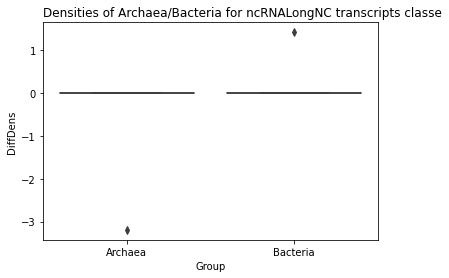

	mannwhitneyu test
Means are not differents
rRNA LongNC
MannwhitneyuResult(statistic=138.0, pvalue=0.42573714329999013)


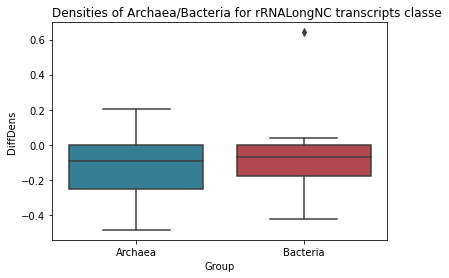

There are only 3 data for snRNA of Archaea/Bacteria transcripts.
There are only 3 data for snoRNA of Archaea/Bacteria transcripts.
	mannwhitneyu test
Means are significatly different
ShortNC ShortNC
MannwhitneyuResult(statistic=94.0, pvalue=0.014473724157534966)


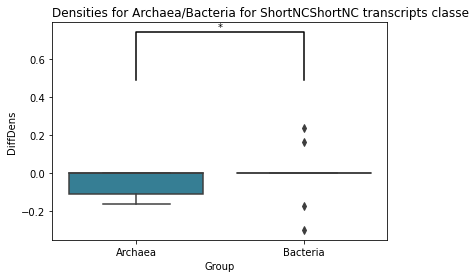

There are only 3 data for miRNA of Archaea/Bacteria transcripts.
There are only 3 data for misc_RNA of Archaea/Bacteria transcripts.
	mannwhitneyu test
Means are not differents
ncRNA ShortNC
MannwhitneyuResult(statistic=41.0, pvalue=0.21343121654220454)


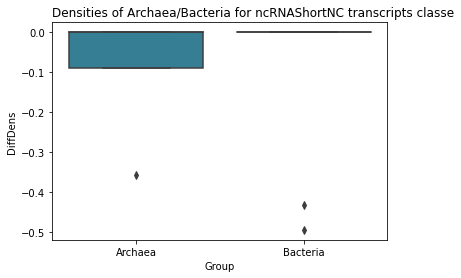

	mannwhitneyu test
Means are not differents
rRNA ShortNC
MannwhitneyuResult(statistic=126.5, pvalue=0.07539278251398568)


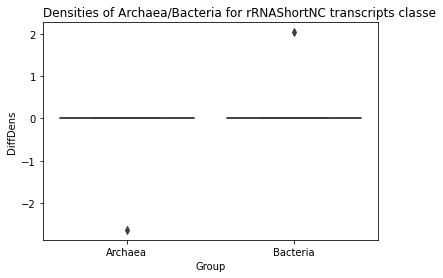

There are only 3 data for snRNA of Archaea/Bacteria transcripts.
There are only 3 data for snoRNA of Archaea/Bacteria transcripts.
	mannwhitneyu test
Means are significatly different
tRNA ShortNC
MannwhitneyuResult(statistic=115.0, pvalue=0.023030143724581082)


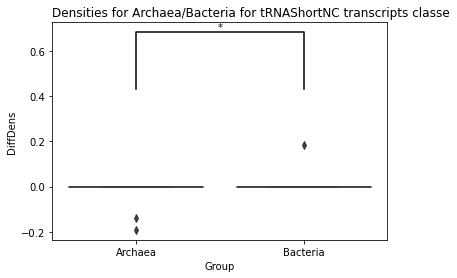

In [52]:
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfNonCoding)
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)
dfTmp['ShortName'] = dfTmp.Sp.apply(applyShortName)
dfTmp['DiffDens'] = dfTmp['DensityWt'] - dfTmp['DensityShuf']
spList = [ ['Eukaryote', 'Archaea'], ['Eukaryote', 'Bacteria'], ['Archaea', 'Bacteria'] ]

for duoSp in spList:
    groupsCl = dfTmp.groupby('Class')
    for cl, group1 in groupsCl:
        groupsBt = group1.groupby('Biotype')
        for bt, group2 in groupsBt:
            if name2 != 'None':
                group2 = group2.drop_duplicates(subset=None, keep='first', inplace=False)
    
                a = group2[group2.Group == duoSp[0] ]['DiffDens']
                b = group2[group2.Group == duoSp[1] ]['DiffDens']

                res = AllTest(a,b,0.05, bt, '/'.join(duoSp))

                dfTmp2 = pd.DataFrame()
                dfTmp2 = dfTmp2.append(group2[group2.Group == duoSp[0] ])
                dfTmp2 = dfTmp2.append(group2[group2.Group == duoSp[1] ])

                if res != []:
                    print(bt, cl)
                    print(res)
                    makeBoxPlotSpvsSp(res[1], dfTmp2, 0.05, None, duoSp, bt, cl)

### Correlation

Correlation between pG4 Densities and GC content for Archaea in LongNC


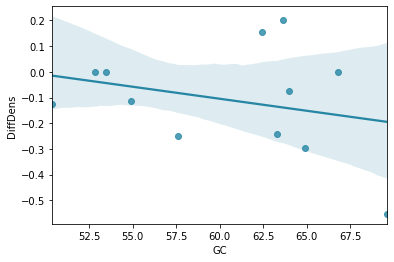

LinregressResult(slope=-0.009343525511568496, intercept=0.45590477749326236, rvalue=-0.28032803472151874, pvalue=0.37748978887234685, stderr=0.010117475549215505)
Correlation between pG4 Densities and GC content for Archaea in ShortNC


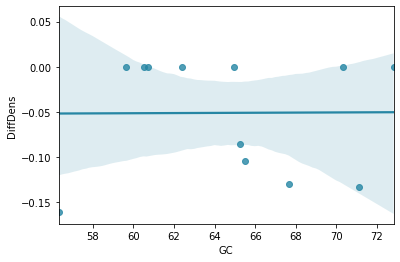

LinregressResult(slope=8.685718807575004e-05, intercept=-0.05663712250948204, rvalue=0.006740518026613256, pvalue=0.9834130112692253, stderr=0.004074765539409114)
Correlation between pG4 Densities and GC content for Bacteria in LongNC


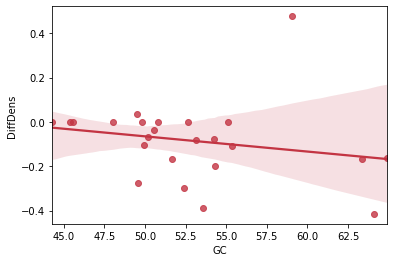

LinregressResult(slope=-0.006863685688566626, intercept=0.27781368113565347, rvalue=-0.2157212474995595, pvalue=0.31135572521310784, stderr=0.006623771651984018)
Correlation between pG4 Densities and GC content for Bacteria in ShortNC


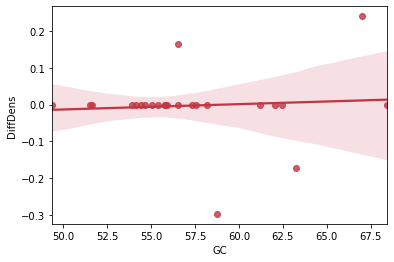

LinregressResult(slope=0.0014440500638299076, intercept=-0.08556136699323338, rvalue=0.07190150754394177, pvalue=0.7384758204822506, stderr=0.004270781845144216)
Correlation between pG4 Densities and GC content for Eukaryote in LongNC


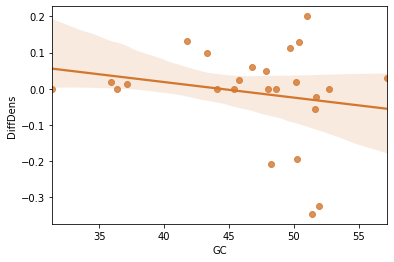

LinregressResult(slope=-0.004293428667965388, intercept=0.19013042803358135, rvalue=-0.20266631137773738, pvalue=0.3312568412402388, stderr=0.004325650239126831)
Correlation between pG4 Densities and GC content for Eukaryote in ShortNC


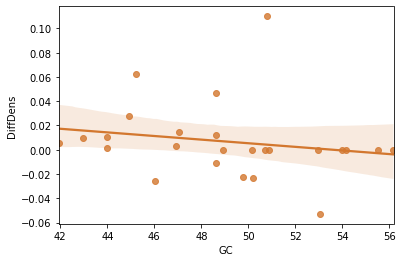

LinregressResult(slope=-0.0014909022545905222, intercept=0.07991143276949456, rvalue=-0.1899312234013291, pvalue=0.36316351783102097, stderr=0.0016069810835413342)


In [53]:
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfNonCoding)
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)
dfTmp['ShortName'] = dfTmp.Sp.apply(applyShortName)
dfTmp['DiffDens'] = dfTmp['DensityWt'] - dfTmp['DensityShuf']

my_pl = {'Eukaryote':"#D3772E", 'Eukaryotes':"#D3772E", 'Archaea':"#2686a4", 'Bacteria':"#c33543"} #test1

groupsSp = dfTmp.groupby('Group')
for name1, group1 in groupsSp:
    groupsCl = group1.groupby('Class')
    for cl, group2 in groupsCl:
        group2 = group2[group2.Biotype == cl]
        group2 = group2.drop_duplicates(subset=None, keep='first', inplace=False)
        print("Correlation between pG4 Densities and GC content for "+name1+" in "+cl)
        sns.regplot(x="GC", y="DiffDens", data=group2, scatter_kws={"color": my_pl[name1]}, line_kws={"color": my_pl[name1]})
        plt.savefig("FiguresArticle/"+name1+"Correlation"+cl+".svg")
        plt.show()
        GC = np.array(group2["GC"])
        DensityGenes = np.array(group2["DiffDens"])
        corr1 = scipy.stats.linregress(GC, DensityGenes)
        print (corr1)

## Pseudogene
### Check nb tr and nb species with pseudogene transcript

unprocessed_pseudogene
transcribed_unprocessed_pseudogene
transcribed_processed_pseudogene
pseudogene
{'homo_sapiens', 'aspergillus_nidulans', 'monodelphis_domestica', 'halobacterium_salinarum_r1', 'drosophila_melanogaster', 'schizosaccharomyces_pombe', 'pan_troglodytes', 'gallus_gallus', 'leishmania_major', 'legionella_pneumophila_str_paris', 'mus_musculus', 'bacillus_subtilis_subsp_subtilis_str_168', 'mycobacterium_tuberculosis_h37rv', 'vibrio_cholerae_o1_biovar_el_tor_str_n16961', 'pongo_abelii', 'escherichia_coli_str_k_12_substr_mg1655', 'saccharomyces_cerevisiae', 'anolis_carolinensis', 'gasterosteus_aculeatus', 'campylobacter_jejuni_subsp_jejuni_nctc_11168_atcc_700819', 'francisella_tularensis_subsp_tularensis_schu_s4', 'danio_rerio', 'neisseria_meningitidis_z2491', 'caenorhabditis_elegans', 'ornithorhynchus_anatinus'}


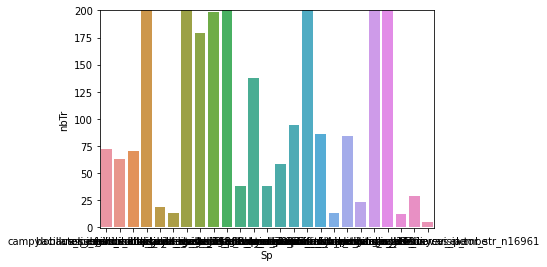

---------------
transcribed_unitary_pseudogene
IG_V_pseudogene
translated_processed_pseudogene
translated_unprocessed_pseudogene
unitary_pseudogene
tRNA_pseudogene
polymorphic_pseudogene
Pseudogene
{'homo_sapiens', 'aspergillus_nidulans', 'monodelphis_domestica', 'halobacterium_salinarum_r1', 'drosophila_melanogaster', 'schizosaccharomyces_pombe', 'pan_troglodytes', 'gallus_gallus', 'leishmania_major', 'legionella_pneumophila_str_paris', 'enterococcus_faecalis_v583', 'mus_musculus', 'bacillus_subtilis_subsp_subtilis_str_168', 'neurospora_crassa', 'mycobacterium_tuberculosis_h37rv', 'vibrio_cholerae_o1_biovar_el_tor_str_n16961', 'pongo_abelii', 'escherichia_coli_str_k_12_substr_mg1655', 'saccharomyces_cerevisiae', 'staphylococcus_aureus_subsp_aureus_n315', 'anolis_carolinensis', 'gasterosteus_aculeatus', 'campylobacter_jejuni_subsp_jejuni_nctc_11168_atcc_700819', 'francisella_tularensis_subsp_tularensis_schu_s4', 'danio_rerio', 'neisseria_meningitidis_z2491', 'caenorhabditis_elegans', '

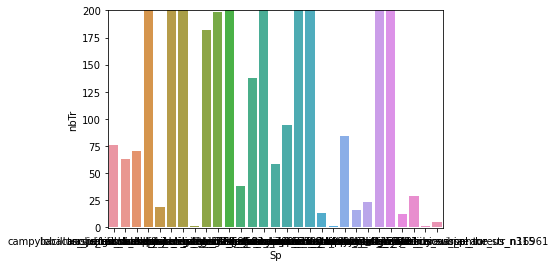

---------------
processed_pseudogene


In [54]:
for bt in set(dfPseudogene['Biotype']):
    print(bt)
    if len(set(dfPseudogene[dfPseudogene.Biotype == bt].Sp)) >= 10:
        print(set(dfPseudogene[dfPseudogene.Biotype == bt].Sp))
        sns.barplot(x="Sp", y="nbTr", data=dfPseudogene[dfPseudogene.Biotype == bt])
        plt.ylim([-0.5, +200])
        plt.show()
        print('---------------')

### doublelolipop plot

Archaea


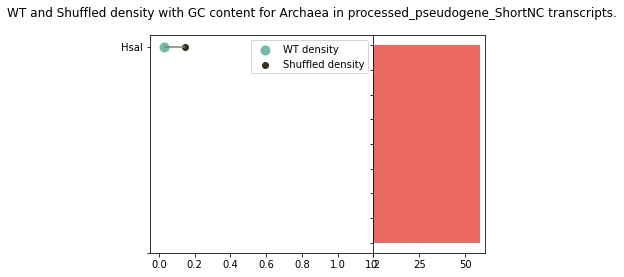

Bacteria


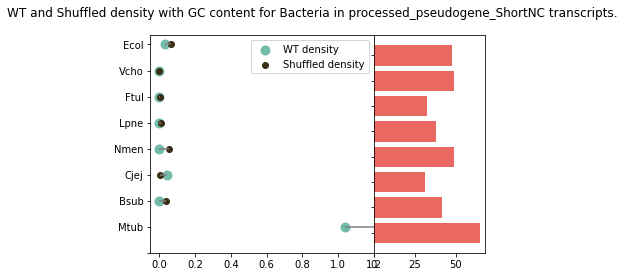

Eukaryote


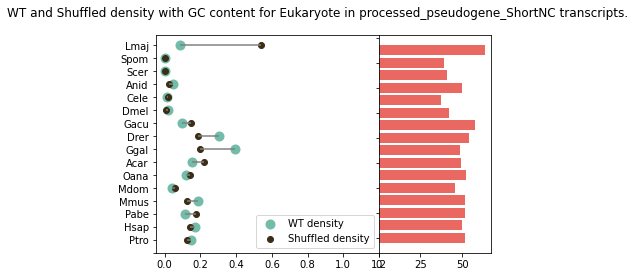

In [55]:
dicoOrder = {'Archaea' : ['Mace', 'Hsal', 'Hbut', 'Aful', 'Msmi', 'Phor', 'Taci', 'Ssol', 'Paer', 'Nequ', 'Ckor', 'Csym'],
            'Bacteria' : ['Aaeo', 'Mtub', 'Tthe', 'Caur', 'Mpne', 'Saur', 'Bsub', 'Efae', 'Spne', 'Ctra', 'Bbur', 'Cjej', 'Mxan', 'Gsul', 'Babo', 'Wend', 'Apha', 'Nmen', 'Lpne', 'Ftul', 'Vcho', 'Hinf', 'Ypes', 'Ecol'],
            'Eukaryote' : ['Ptro', 'Hsap', 'Pabe', 'Mmus', 'Mdom', 'Oana', 'Acar', 'Ggal', 'Drer', 'Gacu', 'Dmel', 'Amel', 'Cele', 'Ncra', 'Anid', 'Scer', 'Spom', 'Ddis', 'Atha', 'Vvin', 'Slyc', 'Osat', 'Ppat', 'Crei', 'Lmaj']}
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfPseudogene[dfPseudogene.Biotype == 'pseudogene'])
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)

groupsSp = dfTmp.groupby('Group')
for name1, group1 in groupsSp:
    print(name1)
    group1 = group1.drop_duplicates(subset=None, keep='first', inplace=False)
    group1['ShortName'] = pd.Categorical(
            group1['ShortName'], categories=dicoOrder[name1], ordered=True)
    group1 = group1.sort_values('ShortName')

    fig, axs = plt.subplots(1, 2, sharex='col',
                gridspec_kw={'hspace': 0, 'wspace': 0, 'width_ratios' : [2,1]})
    (ax1, ax2)= axs
    fig.suptitle('WT and Shuffled density with GC content for '+name1+' in '+bt+'_'+cl+' transcripts.')    

    my_range=range(1,len(group1.index)+1)
    ax1.hlines(y=my_range, xmin=group1['DensityWt'], xmax=group1['meanShuffle'], color='grey')
    ax1.scatter(group1['DensityWt'], my_range, color='#73BCAA', label='WT density', linewidth=4)
    ax1.scatter(group1['meanShuffle'], my_range, color='#3C2D16', label='Shuffled density')
    ax1.set_xlim([-0.05, +1.20])
    y = np.arange(len(group1['ShortName'])+1)
    yLabels = ['']
    yLabels.extend( list(group1['ShortName']) )
    ax1.set_yticks(y)
    ax1.set_yticklabels(yLabels, fontdict=None, minor=False)
    ax1.legend()
    y_pos = np.arange(len(group1['ShortName']))
    ax2.barh(y_pos, group1['GC'], color='#E64E46', alpha=0.85)
    for ax in axs.flat:
        ax.label_outer()

    plt.savefig("FiguresArticle/"+name1+"_Pseudogene_transcript.svg")
    plt.show()

### dotplot

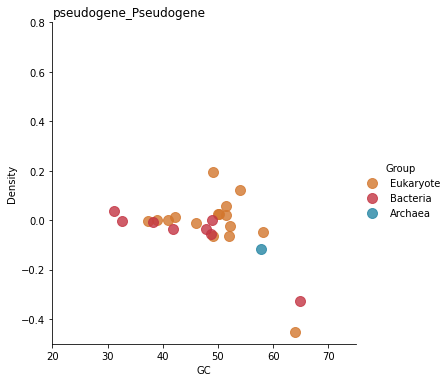

In [56]:
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfPseudogene[dfPseudogene.Biotype == 'pseudogene'])
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)
dfTmp['Density'] = dfTmp['DensityWt'] - dfTmp['meanShuffle']

groupsCl = dfTmp.groupby('Class')
for cl, group1 in groupsCl:
    groupsBt = group1.groupby('Biotype')
    for bt, group2 in groupsBt:
        group2 = group2.drop_duplicates(subset=None, keep='first', inplace=False)
        my_pl = {'Eukaryote':"#D3772E", 'Archaea':"#2686a4", 'Bacteria':"#c33543"} #test1
        sns.lmplot( x="GC", y="Density", data=group2, fit_reg=False, hue='Group', legend=True, palette=my_pl, scatter_kws={"s": 100})
        plt.title(bt+"_"+cl, loc='left')
        plt.ylim([-0.5, +0.8])
        plt.xlim([20, +75])
        plt.savefig("FiguresArticle/dotPlotTranscriptMeanShuff_"+bt+"_"+cl+".svg")
        plt.show()

### boxplot

There are only 3 data for Archaea of pseudogene transcripts.
	mannwhitneyu test
Means are not differents
Bacteria Pseudogene pseudogene
MannwhitneyuResult(statistic=18.5, pvalue=0.08048359848557585)


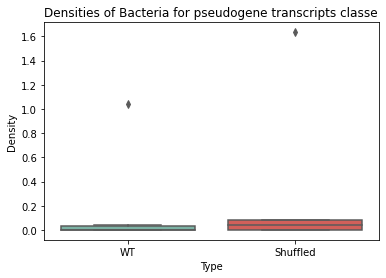

	mannwhitneyu test
Means are not differents
Eukaryote Pseudogene pseudogene
MannwhitneyuResult(statistic=119.0, pvalue=0.3742379010329792)


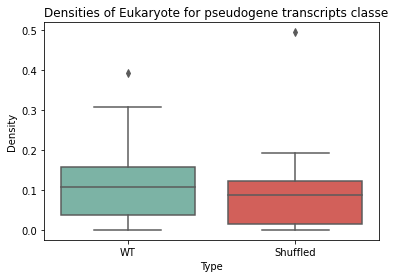

In [57]:
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfPseudogene[dfPseudogene.Biotype == 'pseudogene'])
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)
dfTmp['ShortName'] = dfTmp.Sp.apply(applyShortName)

groupsSp = dfTmp.groupby('Group')
for realm, group3 in groupsSp:
    groupsCl = group3.groupby('Class')
    for cl, group1 in groupsCl:
        groupsBt = group1.groupby('Biotype')
        for bt, group2 in groupsBt:
            if name2 != 'None':
                group2 = group2.drop_duplicates(subset=None, keep='first', inplace=False)

                a = group2['DensityWt']
                b = group2['meanShuffle']

                res = AllTest(a,b,0.05, realm, bt)

                if res != []:
                    print(realm, cl, bt)
                    print(res)
                    makeBoxPlotWTvsShuf(res[1], group2, 0.05, a, b, realm, bt, cl)

There are only 3 data for pseudogene of Eukaryote/Archaea transcripts.
	mannwhitneyu test
Means are significatly different
pseudogene Pseudogene
MannwhitneyuResult(statistic=22.0, pvalue=0.005348144042438364)


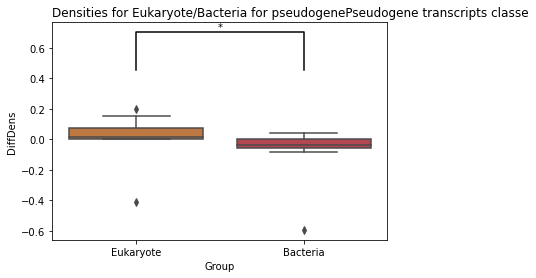

There are only 3 data for pseudogene of Archaea/Bacteria transcripts.


In [58]:
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfPseudogene[dfPseudogene.Biotype == 'pseudogene'])
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)
dfTmp['ShortName'] = dfTmp.Sp.apply(applyShortName)
dfTmp['DiffDens'] = dfTmp['DensityWt'] - dfTmp['DensityShuf']
spList = [ ['Eukaryote', 'Archaea'], ['Eukaryote', 'Bacteria'], ['Archaea', 'Bacteria'] ]

for duoSp in spList:
    groupsCl = dfTmp.groupby('Class')
    for cl, group1 in groupsCl:
        groupsBt = group1.groupby('Biotype')
        for bt, group2 in groupsBt:
            if name2 != 'None':
                group2 = group2.drop_duplicates(subset=None, keep='first', inplace=False)
    
                a = group2[group2.Group == duoSp[0] ]['DiffDens']
                b = group2[group2.Group == duoSp[1] ]['DiffDens']

                res = AllTest(a,b,0.05, bt, '/'.join(duoSp))

                dfTmp2 = pd.DataFrame()
                dfTmp2 = dfTmp2.append(group2[group2.Group == duoSp[0] ])
                dfTmp2 = dfTmp2.append(group2[group2.Group == duoSp[1] ])

                if res != []:
                    print(bt, cl)
                    print(res)
                    makeBoxPlotSpvsSp(res[1], dfTmp2, 0.05, None, duoSp, bt, cl)

Correlation between pG4 Densities and GC content for Archaea in Pseudogene


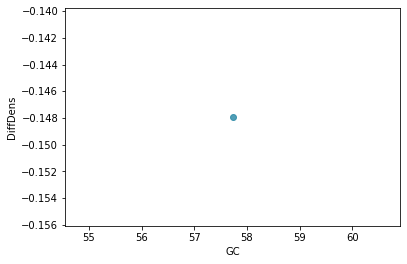

/home/anais/.local/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/anais/.local/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/anais/.local/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


LinregressResult(slope=nan, intercept=nan, rvalue=0.0, pvalue=nan, stderr=nan)
Correlation between pG4 Densities and GC content for Bacteria in Pseudogene


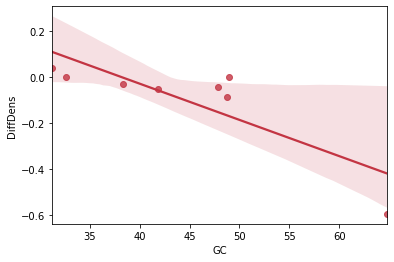

LinregressResult(slope=-0.01574143450438271, intercept=0.6020219715819333, rvalue=-0.8323968094412134, pvalue=0.010340324599397129, stderr=0.004278476776463588)
Correlation between pG4 Densities and GC content for Eukaryote in Pseudogene


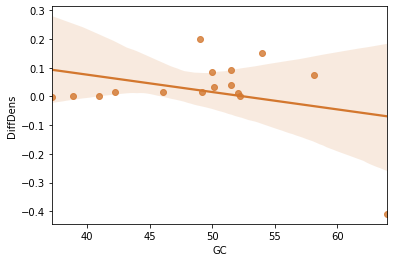

LinregressResult(slope=-0.006062054299879059, intercept=0.3187107215620711, rvalue=-0.32674103003569466, pvalue=0.21675640546588282, stderr=0.004686366876481607)


In [59]:
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfPseudogene[dfPseudogene.Biotype == 'pseudogene'])
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)
dfTmp['ShortName'] = dfTmp.Sp.apply(applyShortName)
dfTmp['DiffDens'] = dfTmp['DensityWt'] - dfTmp['DensityShuf']

my_pl = {'Eukaryote':"#D3772E", 'Eukaryotes':"#D3772E", 'Archaea':"#2686a4", 'Bacteria':"#c33543"} #test1

groupsSp = dfTmp.groupby('Group')
for name1, group1 in groupsSp:
    group1 = group1.drop_duplicates(subset=None, keep='first', inplace=False)
    print("Correlation between pG4 Densities and GC content for "+name1+" in Pseudogene")
    sns.regplot(x="GC", y="DiffDens", data=group1, scatter_kws={"color": my_pl[name1]}, line_kws={"color": my_pl[name1]})
    plt.savefig("FiguresArticle/"+name1+"CorrelationPseudogene.svg")
    plt.show()
    GC = np.array(group1["GC"])
    DensityGenes = np.array(group1["DiffDens"])
    corr1 = scipy.stats.linregress(GC, DensityGenes)
    print (corr1)

## Location LongNC

In [60]:
dfLongNCLoc = pd.read_csv(path+'/Results/NonCodingLocation.csv', sep='\t')
dfLongNCLoc.head()

Biotype  DensityShuf  DensityWt         GC            LocID  Location  \
0  LongNC     0.004866   0.000000  36.216249  acceptor-LongNC  acceptor   
1  LongNC     0.000000   0.000000  35.588792  acceptor-LongNC  acceptor   
2  LongNC     0.000000   0.000000  40.000000  acceptor-LongNC  acceptor   
3  LongNC     0.000550   0.000000  38.339079  acceptor-LongNC  acceptor   
4  LongNC     0.000000   0.006211  48.952737  acceptor-LongNC  acceptor   

   NbLocation  NbRepro  NbTrpG4Shuf  NbTrpG4Wt  ...  index  nbTr     nuclA  \
0       411.0        3            2          0  ...    NaN   187    9138.0   
1      4086.0        3            0          0  ...    NaN   756  105408.0   
2         1.0        3            0          0  ...    NaN     1      23.0   
3      1819.0        3            1          0  ...    NaN  1206   43207.0   
4       161.0        3            0          1  ...    NaN   121    3426.0   

   nuclC  nuclG  nuclN     nuclT  meanShuffle stdShuffle  ShortName  
0   5402   6549    NaN   11910.0     0.002396   0.001871       Atha  
1  63357  53523    NaN  106130.0     0.000000   0.000000       Cele  
2     22     10    NaN      25.0     0.001432   0.000999       Drer  
3  31152  26454    NaN   49441.0     0.000550   0.000000       Dmel  
4   3368   2919    NaN    3130.0     0.000000   0.000000       Ncra  

[5 rows x 29 columns]

### dotplot

acceptor


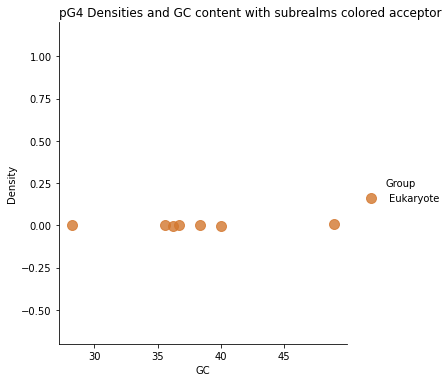

donor


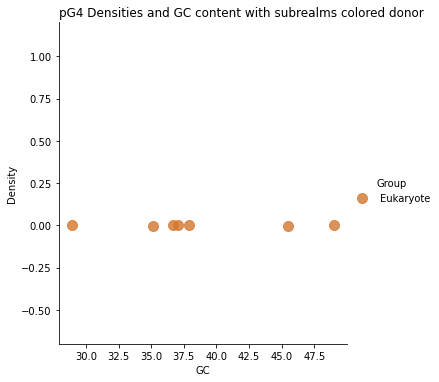

exon


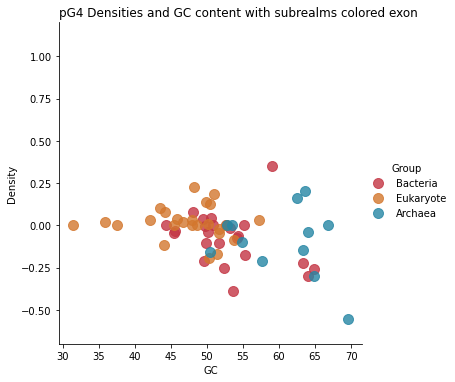

intron


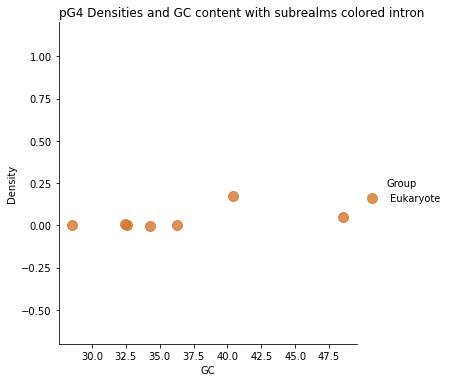

junction


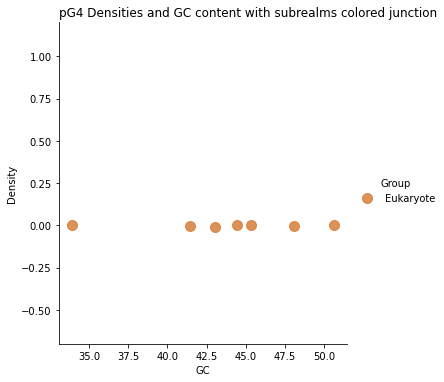

In [61]:
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfLongNCLoc[dfLongNCLoc.Biotype == 'LongNC'])
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)
dfTmp['Density'] = dfTmp['DensityWt'] - dfTmp['meanShuffle']

groupsLoc = dfTmp.groupby('Location')
for loc, group in groupsLoc:
    x = -0.7
    y = +1.2
    group = group.drop_duplicates(subset=None, keep='first', inplace=False)

    print(loc)
    my_pl = {'Eukaryote':"#D3772E", 'Archaea':"#2686a4", 'Bacteria':"#c33543"} #test1
    sns.lmplot( x="GC", y="Density", data=group, fit_reg=False, hue='Group', legend=True, palette=my_pl, scatter_kws={"s": 100})
    plt.ylim([x, y])
    plt.title("pG4 Densities and GC content with subrealms colored "+loc, loc='left')
    plt.savefig("FiguresArticle/dotPlot"+loc+"_LongNCMeanShuff.svg")
    plt.show()

### heatmap densities

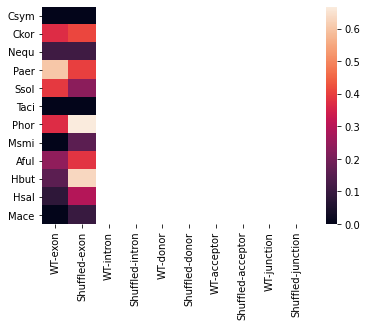

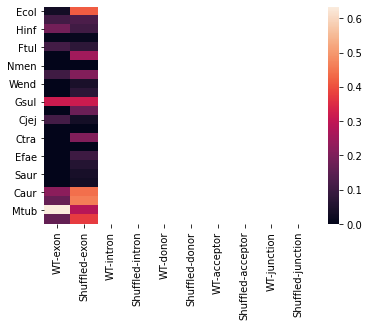

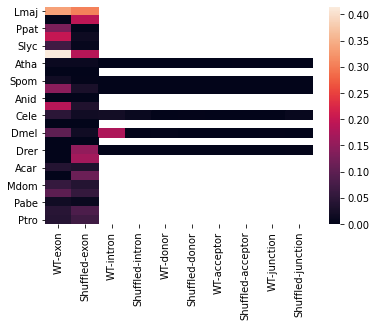

In [62]:
d = {"Group": ['Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Eukaryote', 'Archaea', 'Archaea', 'Archaea', 'Archaea', 'Archaea', 'Archaea', 'Archaea', 'Archaea', 'Archaea', 'Archaea', 'Archaea', 'Archaea', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria'],
    "WT-exon" : [0.33600394244625803, 0.0, 0.12906556530717606, 0.19992802591067216, 0.06888791935520908, 0.4146796599626789, 0.01156541785854723, 0.0, 0.01867128884795036, 0.1448624531007808, 0.0, 0.1873536299765808, 0.047887688361218976, 0.0, 0.10074814828634863, 0.0, 0.0, 0.0, 0.0392026187349315, 0.0, 0.05857887645714956, 0.1003881675813144, 0.01925001925001925, 0.04388310637539255, 0.04126458260874692, 0.0, 0.3707823507601038, 0.112145340361108, 0.6032980292264378, 0.3916960438699569, 0.0, 0.3707273670942389, 0.0, 0.2412933322609185, 0.15786565632646615, 0.08313934153641503, 0.0, 0.02979826574093388, 0.11140642655929207, 0.18646975460580287, 0.009326792143110298, 0.1118651651875606, 0.0, 0.0, 0.10621348911311736, 0.0, 0.0, 0.31928480204342274, 0.0, 0.11172768239544152, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2216189262563023, 0.16602332627734195, 0.6344171292624902, 0.16120581953008506],
    "Shuffled-exon": [0.3063413323866084, 0.19436351838676239, 0.0, 0.015332720024532356, 0.0068971381445985264, 0.18696801262509427, 0.012100638692131013, 0.0, 0.002594585072717268, 0.02899153589914316, 0.0, 0.03517593062506894, 0.01924483389765036, 0.0, 0.01879037212907962, 0.0, 0.15238777899454256, 0.1670338124856232, 0.03277014960202658, 0.114549576819439, 0.03896257211749166, 0.058384935741832136, 0.009647445111479469, 0.0841054381841183, 0.06861958134431126, 0.0, 0.4123860942082932, 0.11222590273379977, 0.40013510079929937, 0.2329531423319724, 0.0, 0.6675732998470174, 0.15691587818040645, 0.3844705041794307, 0.6317286233050984, 0.2964641810912611, 0.10056989816644961, 0.4173664614984039, 0.12480549665391907, 0.10742701597870323, 0.013824375922835901, 0.07460088916124737, 0.25422056308007823, 0.0, 0.20961279047182818, 0.04375888852423148, 0.073421864650824, 0.31939813211194346, 0.17474389962824163, 0.03352912862407355, 0.0, 0.2076709101674757, 0.0, 0.10403642200426946, 0.05992343406343319, 0.04079979520917128, 0.03183952877497413, 0.4413650628575437, 0.46329857934462293, 0.28581010531178264, 0.37611759541856615],
    "WT-intron": [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0.0, np.nan, 0.0, 0.0, np.nan, np.nan, 0.02116934630268294, np.nan, 0.17840895273315807, np.nan, 0.0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    "Shuffled-intron": [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0.00021652473470306878, np.nan, 0.0, 0.0, np.nan, np.nan, 0.011374504487295743, np.nan, 0.001537816229830594, np.nan, 0.0013834833962707773, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    "WT-donor": [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0.0, np.nan, 0.0, 0.0, np.nan, np.nan, 0.0007342143906020558, np.nan, 0.004398020890599231, np.nan, 0.0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    "Shuffled-donor": [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0.00046822742474916383, np.nan, 0.0, 0.0, np.nan, np.nan, 0.002345086263316229, np.nan, 0.0010995052226498076, np.nan, 0.000866089273817455, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    "WT-acceptor": [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0.0, np.nan, 0.0, 0.0, np.nan, np.nan, 0.0, np.nan, 0.0, np.nan, 0.0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    "Shuffled-acceptor": [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0.002396308864096868, np.nan, 0.0, 0.0, np.nan, np.nan, 0.0, np.nan, 0.0005497526113249038, np.nan, 0.0014323784143904065, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    "WT-junction": [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0.0, np.nan, 0.0, 0.0, np.nan, np.nan, 0.0002447381302006853, np.nan, 0.0016492578339747114, np.nan, 0.0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    "Shuffled-junction": [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0.0008026755852842809, np.nan, 0.0, 0.0, np.nan, np.nan, 0.009209028362124437, np.nan, 0.0, np.nan, 0.003445850914205345, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]}
df = pd.DataFrame(data=d)
df.index = ['Lmaj', 'Crei', 'Ppat', 'Osat', 'Slyc', 'Vvin', 'Atha', 'Ddis', 'Spom', 'Scer', 'Anid', 'Ncra', 'Cele', 'Amel', 'Dmel', 'Gacu', 'Drer', 'Ggal', 'Acar', 'Oana', 'Mdom', 'Mmus', 'Pabe', 'Hsap', 'Ptro', 'Csym', 'Ckor', 'Nequ', 'Paer', 'Ssol', 'Taci', 'Phor', 'Msmi', 'Aful', 'Hbut', 'Hsal', 'Mace', 'Ecol', 'Ypes', 'Hinf', 'Vcho', 'Ftul', 'Lpne', 'Nmen', 'Apha', 'Wend', 'Babo', 'Gsul', 'Mxan', 'Cjej', 'Bbur', 'Ctra', 'Spne', 'Efae', 'Bsub', 'Saur', 'Mpne', 'Caur', 'Tthe', 'Mtub', 'Aaeo']

groupsSp = df.groupby('Group')
for realm, group in groupsSp:
    del group['Group']
    mask = group.isnull()
    sns.heatmap(group.round(3), mask=mask)#annot=True
    plt.show()

### boxplot / pvalue

	mannwhitneyu test
Means are not differents
Archaea Pseudogene exon
MannwhitneyuResult(statistic=50.0, pvalue=0.10549333558263291)


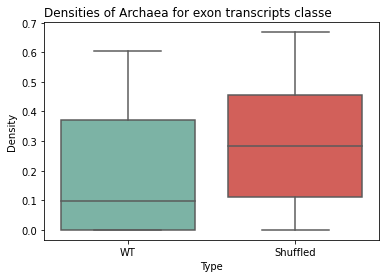

	mannwhitneyu test
Means are significatly different
Bacteria Pseudogene exon
MannwhitneyuResult(statistic=178.0, pvalue=0.010924912411885068)


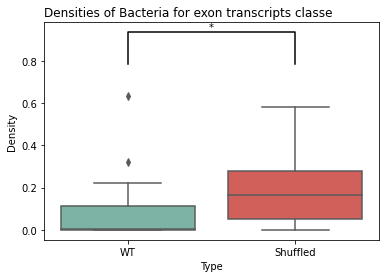

	mannwhitneyu test
Means are not differents
Eukaryote Pseudogene acceptor
MannwhitneyuResult(statistic=19.0, pvalue=0.21178406399280497)


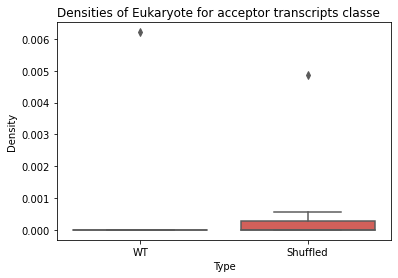

	mannwhitneyu test
Means are not differents
Eukaryote Pseudogene donor
MannwhitneyuResult(statistic=18.5, pvalue=0.21820593398232702)


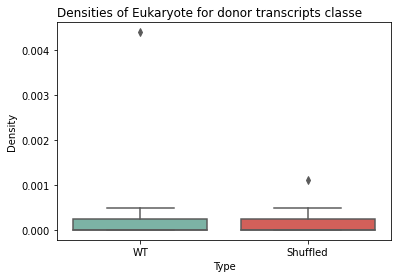

	mannwhitneyu test
Means are not differents
Eukaryote Pseudogene exon
MannwhitneyuResult(statistic=291.5, pvalue=0.3443874442409097)


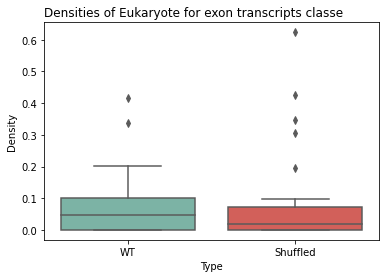

	mannwhitneyu test
Means are not differents
Eukaryote Pseudogene intron
MannwhitneyuResult(statistic=22.0, pvalue=0.39246681506339776)


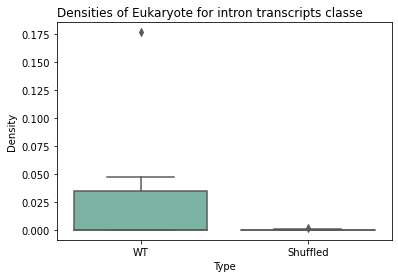

	mannwhitneyu test
Means are not differents
Eukaryote Pseudogene junction
MannwhitneyuResult(statistic=19.0, pvalue=0.22826859235491243)


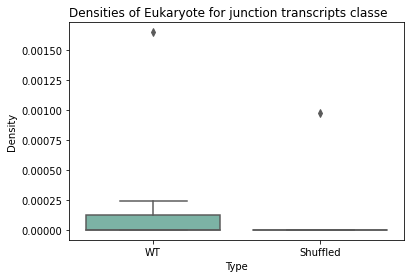

[['Archaea', 'Pseudogene', 'exon', 0.10549333558263291], ['Bacteria', 'Pseudogene', 'exon', 0.010924912411885068], ['Eukaryote', 'Pseudogene', 'acceptor', 0.21178406399280497], ['Eukaryote', 'Pseudogene', 'donor', 0.21820593398232702], ['Eukaryote', 'Pseudogene', 'exon', 0.3443874442409097], ['Eukaryote', 'Pseudogene', 'intron', 0.39246681506339776], ['Eukaryote', 'Pseudogene', 'junction', 0.22826859235491243]]


In [63]:
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfLongNCLoc[dfLongNCLoc.Biotype == 'LongNC'])
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)
dfTmp['ShortName'] = dfTmp.Sp.apply(applyShortName)

resultat = []
groupsSp = dfTmp.groupby('Group')
for realm, group3 in groupsSp:
    groupsBt = group3.groupby('Location')
    for bt, group2 in groupsBt:
        if name2 != 'None':
            group2 = group2.drop_duplicates(subset=None, keep='first', inplace=False)

            a = group2['DensityWt']
            b = group2['meanShuffle']

            res = AllTest(a,b,0.05, realm, bt)

            if res != []:
                print(realm, cl, bt)
                print(res)
                resultat.append([realm, cl, bt, res[1]])
                makeBoxPlotWTvsShuf(res[1], group2, 0.05, a, b, realm, bt, "LongNC")
print(resultat)

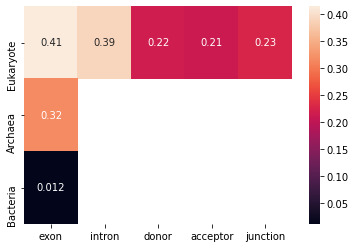

In [64]:
d = {"exon" : [0.41475835491231355, 0.31769711594607886, 0.011542408389990872],
    "intron": [0.39246681506339776, np.nan, np.nan],
    "donor": [0.21820593398232702, np.nan, np.nan],
    "acceptor": [0.21178406399280497, np.nan, np.nan],
    "junction": [0.22826859235491243, np.nan, np.nan]}
df = pd.DataFrame(data=d)
df.index = ['Eukaryote', 'Archaea', 'Bacteria']
mask = df.isnull()
sns.heatmap(df.round(3), mask=mask, annot=True)
plt.savefig("FiguresArticle/pvalueHeatmap_LongNC.svg")
plt.show()

## Location Pseudogene
### Dotplot

In [65]:
dfPseudoLoc = pd.read_csv(path+'/Results/Pseudogene.csv', sep='\t')
dfPseudoLoc.head()

FileNotFoundError: [Errno 2] No such file or directory: '/home/anais/Documents/Projet/G4Conservation//Results/Pseudogene.csv'

In [ ]:
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfPseudoLoc[dfPseudoLoc.Biotype == 'Pseudogene'])
dfTmp['Group'] = dfTmp.Sp.apply(getGrp)
dfTmp['Density'] = dfTmp['DensityWt'] - dfTmp['meanShuffle']

groupsBt = dfTmp.groupby('Location')
for loc, group in groupsBt:
    x = -0.7
    y = +1.2
    group = group.drop_duplicates(subset=None, keep='first', inplace=False)

    print(loc)
    my_pl = {'Eukaryote':"#D3772E", 'Archaea':"#2686a4", 'Bacteria':"#c33543"} #test1
    sns.lmplot( x="GC", y="Density", data=group, fit_reg=False, hue='Group', legend=True, palette=my_pl, scatter_kws={"s": 100})
    plt.ylim([x, y])
    plt.title("pG4 Densities and GC content with subrealms colored "+loc, loc='left')
    plt.savefig("FiguresArticle/dotPlot"+loc+"_"+cl+"MeanShuff.svg")
    plt.show()

### heatmap density

In [ ]:
d = {"Group": ['Eukaryotes', 'Eukaryotes', 'Eukaryotes', 'Eukaryotes', 'Eukaryotes', 'Eukaryotes', 'Eukaryotes', 'Eukaryotes', 'Eukaryotes', 'Eukaryotes', 'Eukaryotes', 'Eukaryotes', 'Eukaryotes', 'Eukaryotes', 'Eukaryotes', 'Eukaryotes', 'Archaea', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria', 'Bacteria'],
    "WT-exon" : [0.08009196442032263, 0.0, 0.0, 0.05284574327537917, 0.010772367403496595, 0.007407325103795144, 0.0981980654981097, 0.3104144032283098, 0.2942254783859807, 0.15709822129902773, 0.15982738642266353, 0.04300868940944107, 0.19743596493537266, 0.1588310038119441, 0.16848726517087415, 0.12893711495146726, 0.019697253218038745, 0.042574025586989375, 0.0, 0.0, 0.028246193825382036, 0.0, 0.04060089321965083, 0.0, 1.1860637509266123],
    "Shuffled-exon": [0.539371104416842, 0.0, 0.0, 0.022930026045956047, 0.016448989236642373, 0.005939763374676561, 0.04674520040101663, 0.1869403866722461, 0.303452773103177, 0.12075076749047872, 0.07611945011302192, 0.02886309673201361, 0.1253586649127018, 0.15422585204758094, 0.10696872229787698, 0.11867530996424139, 0.1469175753316645, 0.08385742849232056, 0.0, 0.0014858914605817759, 0.008483128365421214, 0.05439874733245066, 0.0, 0.03456795168952384, 1.3664710781874114],
    "WT-intron": [0.0, 0.0, np.nan, 0.0, 0.016186868019945632, 0.033715441672285906, 0.0, 0.0, 0.4115194456882647, 0.0, 0.0, 0.1029336078229542, 0.0, 0.1263902932254803, 0.0, 0.2103639295982049, np.nan, 0.0, np.nan, 0.0, np.nan, 0.0, 0.0, np.nan, np.nan],
    "Shuffled-intron": [0.0, 0.0, np.nan, 0.008823010411152285, 0.016004017591795976, 0.004509887929284957, 35.65217391304348, 0.0, 0.17505887987285126, 5.634538813160907, 2.7842507030936123, 0.9435116151786704, 0.12905604719764013, 0.48188377484306216, 12.264150943396226, 0.19411399530519863, np.nan, 0.014164974739128386, np.nan, 0.08629616845012081, np.nan, 0.0, 0.37593984962406013, np.nan, np.nan],
    "WT-donor": [0.023809523809523808, 0.0, np.nan, 0.0, 0.00035106196243637, 0.0, 0.022222222222222227, 0.0, 0.123419626730885, 0.0, 0.0, 0.006726457399103139, 0.020408163265306117, 0.011976047904191616, 0.0, 0.018957345971563986, np.nan, 0.0, np.nan, 0.0, np.nan, 0.0, 0.0, np.nan, np.nan],
    "Shuffled-donor": [0.03333333333333334, 0.0, np.nan, 0.00196078431372549, 0.000315955766192733, 0.0, 0.0022222222222222227, 0.0, 0.07049969897652017, 0.0, 0.006382978723404255, 0.003139013452914798, 0.016326530612244892, 0.008297690333618477, 0.0, 0.02559241706161137, np.nan, 0.0037735849056603774, np.nan, 0.0023255813953488367, np.nan, 0.0, 0.0, np.nan, np.nan],
    "WT-acceptor": [0.023809523809523808, 0.0, np.nan, 0.0, 0.0, 0.0, 0.04444444444444445, 0.0, 0.013847080072245636, 0.0, 0.0, 0.004484304932735426, 0.010204081632653059, 0.009409751924721984, 0.0, 0.018957345971563986, np.nan, 0.0, np.nan, 0.0, np.nan, 0.0, 0.0, np.nan, np.nan],
    "Shuffled-acceptor": [0.04285714285714286, 0.0, np.nan, 0.0, 0.0, 0.0, 0.004444444444444445, 0.0, 0.015442504515352198, 0.004285714285714285, 0.0, 0.003139013452914798, 0.019387755102040816, 0.009751924721984603, 0.0, 0.024644549763033173, np.nan, 0.0, np.nan, 0.0, np.nan, 0.0, 0.0, np.nan, np.nan],
    "WT-junction": [0.023809523809523808, 0.0, np.nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013847080072245636, 0.0, 0.0, 0.004484304932735426, 0.0, 0.0059880239520958105, 0.0, 0.009478672985781993, np.nan, 0.0, np.nan, 0.0, np.nan, 0.0, 0.0, np.nan, np.nan],
    "Shuffled-junction": [0.023809523809523808, 0.0, np.nan, 0.0, 0.00040372125680182547, 0.00034965034965034965, 0.0, 0.0, 0.022697170379289585, 0.0028571428571428567, 0.0, 0.001569506726457399, 0.01836734693877551, 0.008383233532934131, 0.0, 0.01753554502369668, np.nan, 0.0, np.nan, 0.0, np.nan, 0.0, 0.0, np.nan, np.nan]}
df = pd.DataFrame(data=d)
df.index = ['Lmaj', 'Spom', 'Scer', 'Anid', 'Cele', 'Dmel', 'Gacu', 'Drer', 'Ggal', 'Acar', 'Oana', 'Mdom', 'Mmus', 'Pabe', 'Hsap', 'Ptro', 'Hsal', 'Ecol', 'Vcho', 'Ftul', 'Lpne', 'Nmen', 'Cjej', 'Bsub', 'Mtub']

groupsSp = df.groupby('Group')
for realm, group in groupsSp:
    del group['Group']
    mask = group.isnull()
    sns.heatmap(group.round(3), mask=mask)#annot=True
    plt.show()